In [1]:
import os
import wrds
import pandas as pd
import numpy as np
from timeit import default_timer as timer
import datetime
from utils import summary_stats, stats_with_description
import requests
from bs4 import BeautifulSoup
from soup2dict import convert
from urllib.parse import urljoin, urlparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import time
import zipfile
import pyreadstat
import itertools
from thefuzz import fuzz
import re

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# set folders
CHECKPOINT_FOLDER = '.\\Checkpoints'
CODING_TABLES_FOLDER = '.\\Coding_tables'
STATS_FOLDER = '.\\Stats'


if not os.path.exists(CHECKPOINT_FOLDER):
        os.makedirs(CHECKPOINT_FOLDER)
if not os.path.exists(STATS_FOLDER):
        os.makedirs(STATS_FOLDER)

In [3]:
# connect
db = wrds.Connection(wrds_username = 'kglim')

Loading library list...
Done


In [118]:
sorted(db.list_libraries())

['aha_sample',
 'ahasamp',
 'audit',
 'audit_audit_comp',
 'audit_common',
 'auditsmp',
 'auditsmp_all',
 'block',
 'block_all',
 'boardex_trial',
 'boardsmp',
 'bvd',
 'bvd_orbis_large',
 'bvd_orbis_medium',
 'bvd_orbis_small',
 'calcbench_trial',
 'calcbnch',
 'cboe',
 'cboe_all',
 'ciq',
 'ciq_common',
 'ciq_ratings',
 'ciq_transcripts',
 'ciqsamp',
 'ciqsamp_common',
 'ciqsamp_keydev',
 'ciqsamp_transcripts',
 'columnar',
 'comp',
 'comp_bank',
 'comp_bank_daily',
 'comp_execucomp',
 'comp_global',
 'comp_global_daily',
 'comp_na_annual_all',
 'comp_na_daily_all',
 'comp_na_monthly_all',
 'comp_ratings',
 'comp_segments_hist',
 'comp_segments_hist_daily',
 'compa',
 'compb',
 'compg',
 'compm',
 'compsamp_snapshot',
 'compseg',
 'contrib',
 'contrib_ceo_turnover',
 'contrib_char_returns',
 'contrib_general',
 'contrib_intangible_value',
 'contrib_kpss',
 'contrib_liva',
 'crsp',
 'crsp_a_ccm',
 'crsp_a_indexes',
 'crsp_a_stock',
 'crsp_q_indexes',
 'crsp_q_indexhist',
 'crsp_q_mutu

In [151]:
sorted(db.list_tables(library='comp_na_annual_all'))

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_filedate',
 'co_fortune',
 'co_hgic',
 'co_iacctchg',
 'co_iaudit',
 'co_idesind',
 'co_ifndq',
 'co_ifndsa',
 'co_ifndytd',
 'co_ifntq',
 'co_ifntsa',
 'co_ifntytd',
 'co_imkt',
 'co_industry',
 'co_ipcd',
 'co_mthly',
 'co_offtitl',
 'company',
 'currency',
 'dd_group',
 'dd_group_xref',
 'dd_item',
 'dd_package',
 'ecind_desc',

In [160]:
bb=db.raw_sql("""
           select * from comp_na_annual_all.funda LIMIT 1000""")


In [162]:
bb.to_csv('ff.csv', sep=";", index=False)

In [163]:
bb1=db.raw_sql("""
           select * from comp_na_annual_all.funda_fncd LIMIT 1000""")
bb1.to_csv('ff1.csv', sep=";", index=False)

In [175]:
set(bb.columns.values) & set(bb1.columns.values)

{'consol',
 'cusip',
 'datadate',
 'datafmt',
 'fyear',
 'gvkey',
 'indfmt',
 'popsrc',
 'tic'}

In [169]:
len(set(bb.columns.values)-set(bb1.columns.values))

939

In [173]:
bb.shape

(1000, 948)

In [174]:
bb1.shape

(1000, 886)

In [172]:
bb1.columns.values

array(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'cusip', 'acchg_fn', 'afudcc_fn', 'amc_fn',
       'am_fn', 'aocidergl_fn', 'aocipen_fn', 'aocisecgl_fn', 'ap_fn',
       'aqa_fn', 'aqd_fn', 'aqeps_fn', 'aqp_fn', 'aqs_fn', 'arced_fn',
       'arceeps_fn', 'arce_fn', 'artfs_fn', 'at_fn', 'capr1_fn',
       'capr3_fn', 'caps_fn', 'capx_fn', 'cdvc_fn', 'ceiexbill_fn',
       'clg_fn', 'cogs_fn', 'cshfd_fn', 'csho_fn', 'cshpri_fn', 'cstk_fn',
       'dclo_fn', 'dcs_fn', 'dcvsr_fn', 'dcvsub_fn', 'dcvt_fn', 'dd1_fn',
       'dd2_fn', 'dd3_fn', 'dd4_fn', 'dd5_fn', 'dd_fn', 'depc_fn',
       'dfs_fn', 'dlto_fn', 'dltp_fn', 'dltt_fn', 'dn_fn', 'dpact_fn',
       'dpc_fn', 'dptc_fn', 'dptic_fn', 'dp_fn', 'ds_fn', 'dtea_fn',
       'dted_fn', 'dteeps_fn', 'dtep_fn', 'dvc_fn', 'dvp_fn', 'dvrre_fn',
       'emp_fn', 'epspi_fn', 'epspx_fn', 'esopt_fn', 'esub_fn', 'fca_fn',
       'findlt_fn', 'gdwlam_fn', 'gdwlia_fn', 'gdwlid_fn', 'gdwlieps_fn',
       'gdw

In [170]:
bb.columns.values

array(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'cusip', 'conm', 'acctchg', 'acctstd', 'acqmeth',
       'adrr', 'ajex', 'ajp', 'bspr', 'compst', 'curcd', 'curncd',
       'currtr', 'curuscn', 'final', 'fyr', 'ismod', 'ltcm', 'ogm',
       'pddur', 'scf', 'src', 'stalt', 'udpl', 'upd', 'apdedate', 'fdate',
       'pdate', 'acchg', 'acco', 'accrt', 'acdo', 'aco', 'acodo',
       'acominc', 'acox', 'acoxar', 'acqao', 'acqcshi', 'acqgdwl',
       'acqic', 'acqintan', 'acqinvt', 'acqlntal', 'acqniintc', 'acqppe',
       'acqsc', 'act', 'adpac', 'aedi', 'afudcc', 'afudci', 'aldo', 'am',
       'amc', 'amdc', 'amgw', 'ano', 'ao', 'aocidergl', 'aociother',
       'aocipen', 'aocisecgl', 'aodo', 'aol2', 'aoloch', 'aox', 'ap',
       'apalch', 'apb', 'apc', 'apofs', 'aqa', 'aqc', 'aqd', 'aqeps',
       'aqi', 'aqp', 'aqpl1', 'aqs', 'arb', 'arc', 'arce', 'arced',
       'arceeps', 'artfs', 'at', 'aul3', 'autxr', 'balr', 'banlr', 'bast',
       'bastr',

In [4]:
# useful commands


# sorted(db.list_libraries())

# sorted(db.list_tables(library='ibes'))

# db.get_row_count(library='wrdsapps', table='firm_ratio_ibes')

# db.describe_table(library='wrdsapps', table='firm_ratio_ibes')

# db.get_table(library='ibes', table='act_epsint', obs = 100)

# https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/querying-wrds-data-python/

### Download linking table CRSP <-> Compustat

For unique identifier look at:
https://libguides.stanford.edu/c.php?g=559845&p=6686228

and
https://wrds-www.wharton.upenn.edu/pages/support/applications/linking-databases/linking-crsp-and-compustat/

Reference table is: https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/crspcompustat-merged/compustat-crsp-link/
Better run the query and download the data from the website, otherwise merge of multiple tables is required. Library is `'crsp_a_ccm'`

In [131]:
DATE_COLS = ['LINKDT', 'LINKENDDT', 'dldte', 'ipodate']    # columns to be converted into date
# MIN_DATE = '01/01/2000'                                    # minimum date for connection validity, applied to LINKDT
STRING_COLS = ['LPERMCO', 'LPERMNO']                       # columns to be converted to string

In [197]:
# read data and metadata

df_link, meta = pyreadstat.read_dta(os.path.join(CODING_TABLES_FOLDER, 'link_table.dta'))

# extract metadata and save variable description
col_descr = pd.DataFrame(meta.column_names_to_labels.items(), columns=['Variable Name', 'Description'])
col_descr.insert(1, 'Type', '')
col_descr.to_csv(os.path.join(CODING_TABLES_FOLDER, 'link_table.csv'), sep=';', index = False)

# convert dates
for col in DATE_COLS:
    df_link[col] = pd.to_datetime(df_link[col])
df_link.replace('NaT', np.nan)

# convert to string
for col in STRING_COLS:
    df_link[col] = df_link[col].fillna(-99)
    df_link[col] = df_link[col].astype(int).astype(str)
    df_link[col] = df_link[col].replace('-99', np.nan)

# filter by date
# df_link = df_link[df_link['LINKDT'] >= MIN_DATE]
    
print('\n- Database size:', df_link.shape)

df_link.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_link_raw.pkl'), protocol=-1)
print('\n- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_link_raw.pkl'))

# stats
df_link_stats = stats_with_description(df_link, os.path.join(CODING_TABLES_FOLDER, 'link_table.csv'), col_to_lowercase=False)
df_link_stats.to_csv(os.path.join(STATS_FOLDER, '00_df_link_raw_stats.csv'), index=False, sep=';')
print('\n- Stats saved to', os.path.join(STATS_FOLDER, '00_df_link_raw_stats.csv'))


- Database size: (99708, 47)

- Pickle saved to .\Checkpoints\df_link_raw.pkl

- Stats saved to .\Stats\00_df_link_raw_stats.csv


In [4]:
df_link = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_link_raw.pkl'))

Link Type can be:

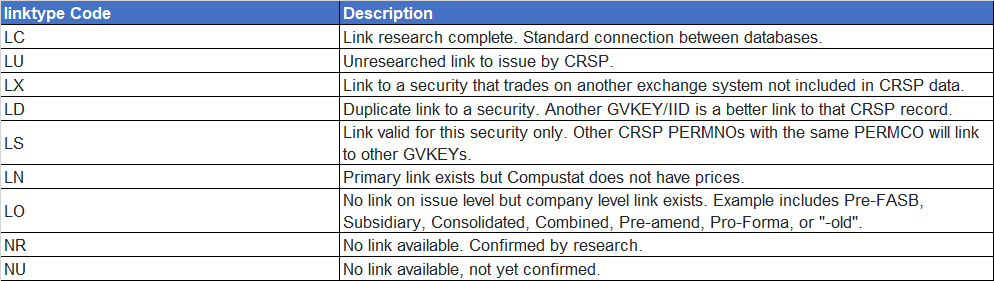


In [136]:
linktype = df_link.LINKTYPE.value_counts().to_frame()

print('-- Linktype count\n')
print(linktype)

print('\n-- Total missing for "LPERMCO" and "LPERMNO":\n', df_link_stats[df_link_stats['VARIABLE'].isin(['LPERMCO', 'LPERMNO'])][['VARIABLE','NANs']])

print('\n-- Sum of "NR" and "NU":', linktype[linktype.index.isin(['NU', 'NR'])].values.sum())

-- Linktype count

    LINKTYPE
NU     31548
NR     31425
LU     16003
LC     15339
LS      3988
LX      1108
LN       185
LD       112

-- Total missing for "LPERMCO" and "LPERMNO":
    VARIABLE           NANs
10  LPERMNO  62973 (63.2%)
11  LPERMCO  62973 (63.2%)

-- Sum of "NR" and "NU": 62973


`cusip` in `df_link_dict` are 9-digits. Must be converted to 8-digits for other tables. Export txt file and upload in https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/tools/cusip-converter/

save file as .dta

In [5]:
# save cusip-9 list

cusip_9_list = df_link.cusip.unique()
cusip_9_list = np.sort(cusip_9_list[cusip_9_list != ''])
np.savetxt(os.path.join(CODING_TABLES_FOLDER,'cusip_9digits.txt'), cusip_9_list, delimiter='\n', fmt='%s')
print('-- cusip list to upload saved to', os.path.join(CODING_TABLES_FOLDER,'cusip_9digits.txt'))

-- cusip list to upload saved to .\Coding_tables\cusip_9digits.txt


In [6]:
# read cusip-8 list and convert

cusip_conv, meta = pyreadstat.read_dta(os.path.join(CODING_TABLES_FOLDER, 'cusip_8digits.dta'))
if cusip_conv.shape[0] != len(cusip_9_list):
    print('\n##### mismatch between cusip_9_list and cusip_8_list')

cusip_conv.rename(columns={'cusip': 'cusip8'}, inplace=True)
cusip_conv['cusip'] = cusip_9_list

matching_score = cusip_conv.apply(lambda x: fuzz.ratio(x['cusip8'], x['cusip']), axis = 1)
print('\n-- Fuzzy matching between cusip and cusip8 in range:', matching_score.min(), '-', matching_score.max())

if cusip_conv['cusip8'].nunique() != len(cusip_9_list):
    print('\n##### multiple cusip8 created')
    
df_link_final = df_link.copy().merge(cusip_conv, on='cusip', how='left')
missing_cusip_pre = df_link_final['cusip'].isna().sum() + (df_link_final['cusip'] == '').sum()
missing_cusip_post = df_link_final['cusip8'].isna().sum() + (df_link_final['cusip8'] == '').sum()
if missing_cusip_pre != missing_cusip_post:
    print('\n##### missing mismatch in cusip and cusip8')
df_link_final.rename(columns={'cusip': 'cusip9'}, inplace=True)
df_link_final.rename(columns={'cusip8': 'cusip'}, inplace=True)
move_col = df_link_final.pop('cusip')
df_link_final.insert(int(np.where(df_link_final.columns=='cusip9')[0][0]), 'cusip', move_col)

df_link_final.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_link_final.pkl'), protocol=-1)
print('\n- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_link_final.pkl'))

# stats
df_link_final_stats = stats_with_description(df_link_final, os.path.join(CODING_TABLES_FOLDER, 'link_table.csv'), col_to_lowercase=False)
df_link_final_stats.to_csv(os.path.join(STATS_FOLDER, '00_df_link_final_stats.csv'), index=False, sep=';')
print('\n- Stats saved to', os.path.join(STATS_FOLDER, '00_df_link_final_stats.csv'))


-- Fuzzy matching between cusip and cusip8 in range: 94 - 94

- Pickle saved to .\Checkpoints\df_link_final.pkl

- Stats saved to .\Stats\00_df_link_final_stats.csv


In [7]:
df_link_final = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_link_final.pkl'))

In [8]:
# create a mapping with "gvkey" as key and other information as possible matching values

df_link_dict = df_link_final.copy().fillna('').groupby('gvkey').apply(lambda x: {'ticker': np.unique(x['tic'][x['tic'] != '']),
                                          'cusip': np.unique(x['cusip'][x['cusip'] != '']),
                                         'permno': np.unique(x['LPERMNO'][x['LPERMNO'] != '']),
                                         'permco': np.unique(x['LPERMCO'][x['LPERMCO'] != '']),
                                         'name': np.unique(x['conm'])}).reset_index(name = 'link_info')


df_link_dict.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_link_dict.pkl'), protocol=-1)
print('\n- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_link_dict.pkl'))


- Pickle saved to .\Checkpoints\df_link_dict.pkl


## Download Earnings Per Share

Reference page:
https://wrds-www.wharton.upenn.edu/pages/get-data/ibes-thomson-reuters/ibes-academic/detail-history/actuals/

For unique identifier look at:
https://libguides.stanford.edu/c.php?g=559845&p=6686228

In [4]:
LIB = 'ibes'
TAB = ['act_epsint', 'act_epsus']
MIN_DATE = '01/01/2005'
FREQ = 'ANN'                                   # frequency of data 'ANN', 'QRT', 'SAN'
DATE_FILTER = 'pends'                          # date to be used for filtering
DATE_COLS = ['pends', 'anndats', 'actdats']    # columns to be converted into date
HOURS_COLS = ['anntims', 'acttims']            # columns to be converted into hours, minutes, seconds

In [6]:
# get column list

pd.set_option('display.max_rows', 100)
db.describe_table(library=LIB, table=TAB[0])

Approximately 3024818 rows in ibes.act_epsint.


name  nullable              type comment
0     ticker      True        VARCHAR(6)    None
1      cusip      True        VARCHAR(8)    None
2      oftic      True        VARCHAR(6)    None
3      cname      True       VARCHAR(16)    None
4      pends      True              DATE    None
5    measure      True        VARCHAR(6)    None
6    pdicity      True        VARCHAR(3)    None
7    anndats      True              DATE    None
8    anntims      True  DOUBLE_PRECISION    None
9    actdats      True              DATE    None
10   acttims      True  DOUBLE_PRECISION    None
11     value      True  DOUBLE_PRECISION    None
12  curr_act      True        VARCHAR(3)    None
13    usfirm      True  DOUBLE_PRECISION    None

In [5]:
# download data

df_EPS = pd.DataFrame()
for tb in TAB:
    
    print('-- Downloading ', tb, '\n')
    query = [
        " select * from " + LIB + "." + tb,
        "where " + DATE_FILTER + ">='" + MIN_DATE +"' and pdicity='" + FREQ + "'"
    ]

    print('- Query:\n', '\n'.join(query))

    start = timer()
    print('\n\nQuerying...', end='')
    df_t = db.raw_sql('\n'.join(query), date_cols=DATE_COLS + HOURS_COLS)
    print(' Elapsed time:', str(datetime.timedelta(seconds=round(timer()-start))))
    print('  Total rows:', df_t.shape[0], '\n\n')
    df_EPS = df_EPS.append(df_t)
    del df_t

# convert times to hours, minutes, seconds
for col in HOURS_COLS:
    df_EPS[col] = df_EPS[col].dt.strftime('%H:%M:%S')
    
print('\n- Database size:', df_EPS.shape)

df_EPS.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_raw.pkl'), protocol=-1)
print('\n- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_EPS_raw.pkl'))

# stats
df_EPS_stats = stats_with_description(df_EPS, os.path.join(CODING_TABLES_FOLDER, LIB + '.' + TAB[0] + '.csv'))
df_EPS_stats.to_csv(os.path.join(STATS_FOLDER, '00_ibes_EPS_raw_stats.csv'), index=False, sep=';')
print('\n- Stats saved to', os.path.join(STATS_FOLDER, '00_ibes_EPS_raw_stats.csv'))

-- Downloading  act_epsint 

- Query:
  select * from ibes.act_epsint
where pends>='01/01/2005' and pdicity='ANN'


Querying... Elapsed time: 0:01:31
  Total rows: 513120 


-- Downloading  act_epsus 

- Query:
  select * from ibes.act_epsus
where pends>='01/01/2005' and pdicity='ANN'


Querying... Elapsed time: 0:00:12
  Total rows: 106848 



- Database size: (619968, 14)

- Pickle saved to .\Checkpoints\df_EPS_raw.pkl

- Stats saved to .\Stats\00_ibes_EPS_raw_stats.csv


In [182]:
df_EPS = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_raw.pkl'))

In [6]:
# check usfirm
# USFIRM=0 if from .INT, and USFIRM=1 if from .US file

display(df_EPS.usfirm.value_counts().to_frame())

check_usfirm = df_EPS.groupby('cusip')['usfirm'].nunique().to_frame()
check_usfirm_multi = check_usfirm[check_usfirm['usfirm'] > 1]
print('-', check_usfirm_multi.shape[0], 'firms with multiple "usfirm". Check "check_usfirm_multi"')
# df_EPS[df_EPS.cusip == "9891391X"].sort_values(by=['pends'])

usfirm
0.0  513120
1.0  106848

- 108 firms with multiple "usfirm". Check "check_usfirm_multi"


Tot_NA  Tot_obs   perc  valid_obs
measure                                   
EPS      144449   507581  28.46     363132
EPSPAR    38175   112387  33.97      74212

C:\Users\Alessandro Bitetto\.conda\envs\wrds\lib\site-packages\ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Alessandro Bitetto\.conda\envs\wrds\lib\site-packages\ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


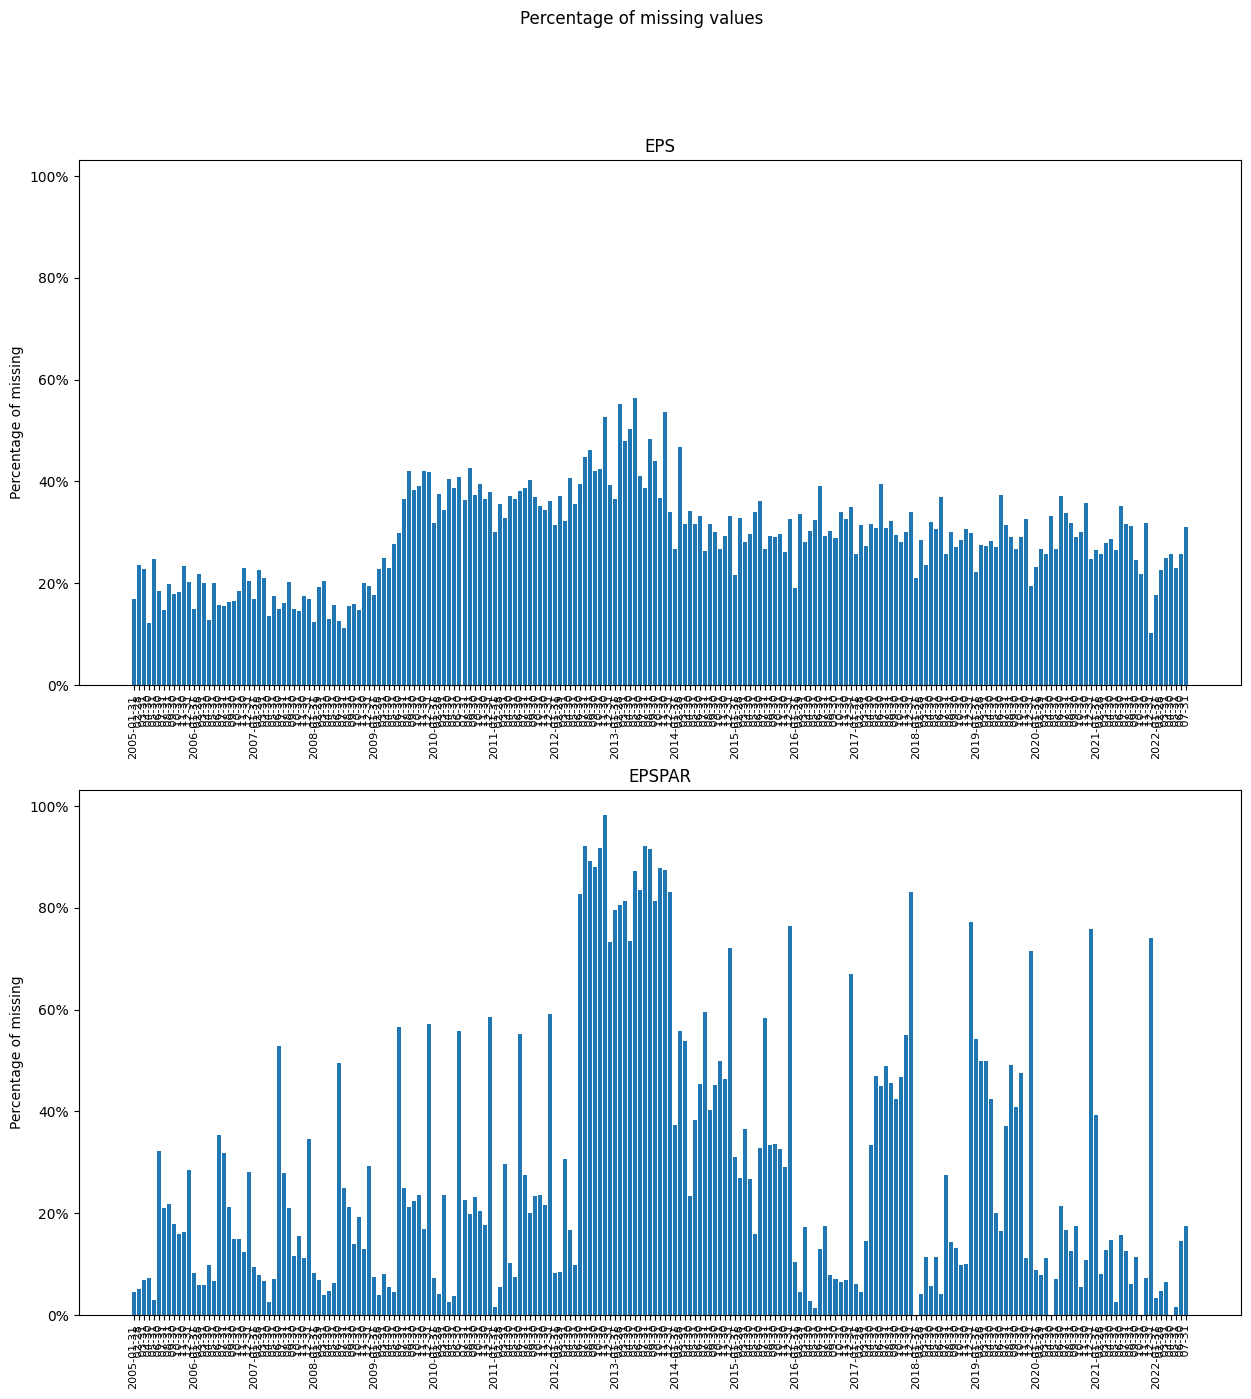

In [7]:
# check ESP and EPSPAR

display(
        df_EPS.groupby('measure').agg(
        Tot_NA=('value', lambda x: np.isnan(x).sum()),
        Tot_obs=('value', lambda x: len(x))
    ).assign(
        perc = lambda x: np.round(x.Tot_NA / x.Tot_obs * 100, 2),
        valid_obs = lambda x: x.Tot_obs - x.Tot_NA
    )
)

# plot missing percentage

plot_data = df_EPS.groupby(['pends', 'measure']).agg(
    Tot_NA=('value', lambda x: np.isnan(x).sum()),
    Tot_obs=('value', lambda x: len(x))
).reset_index().assign(
    perc = lambda x: np.round(x.Tot_NA / x.Tot_obs * 100, 2)
)#.set_index('pends')
plot_data['pends'] = pd.to_datetime(plot_data['pends']).dt.strftime('%Y-%m-%d')

fig, ax = plt.subplots(2, 1, figsize=(15, 15), sharey=True, sharex=False)
ax = ax.flatten()
ax_c = 0

for meas in plot_data['measure'].unique():

    dd = plot_data[plot_data['measure'] == meas].sort_values(by=['pends'])[['pends', 'perc']]
    labels = [time.strptime(x, '%Y-%m-%d') for x in dd.pends.values]
    labels = [time.strftime('%Y-%m-%d', x) if x.tm_mon == 1 else time.strftime('     %m-%d', x) for x in labels]
    ax[ax_c].bar(dd['pends'], dd['perc'])
    ax[ax_c].tick_params(axis='x', labelrotation=90, labelsize = 8)
    ax[ax_c].set_xticklabels(labels)
    ax[ax_c].set_title(meas)
    ax[ax_c].set_ylabel('Percentage of missing')
    ax[ax_c].yaxis.set_major_formatter(mtick.PercentFormatter())
    ax_c += 1
fig.suptitle('Percentage of missing values')
plt.show()

### Filter for non missing EPS and multiple ticker and activation date

In [8]:
df_EPS_final = df_EPS.copy()
df_EPS_final = df_EPS_final.assign(
    year = lambda x: x.pends.astype('datetime64[D]').dt.strftime('%Y').astype(int),
    announce = lambda x: pd.to_datetime(x.anndats.astype('datetime64[D]').dt.strftime('%Y-%m-%d') + ' ' + x.anntims),
    activation = lambda x: pd.to_datetime(x.actdats.astype('datetime64[D]').dt.strftime('%Y-%m-%d') + ' ' + x.acttims)
)
df_EPS_final = df_EPS_final[df_EPS_final['measure'] == 'EPS']
df_EPS_final = df_EPS_final[~df_EPS_final['value'].isnull()]
df_EPS_final = df_EPS_final[~df_EPS_final['cname'].isnull()]
df_EPS_final = df_EPS_final[df_EPS_final['cusip'] != '00000000']
df_EPS_final.drop(columns=['measure', 'pdicity', 'anndats', 'anntims', 'actdats', 'acttims'], inplace=True)
df_EPS_final.head(8)

ticker     cusip oftic            cname      pends  value curr_act  usfirm  \
2    0003  66515910   FFF   NORTH FRONTIER 2014-12-31  -0.16      CAD     0.0   
3    0003  66515910   FFF   NORTH FRONTIER 2015-12-31  -0.22      CAD     0.0   
8    001V  03702510   ATE           ANTIBE 2018-03-31  -0.50      CAD     0.0   
9    001V  03702510   ATE           ANTIBE 2019-03-31  -0.60      CAD     0.0   
10   001V  03702510   ATE           ANTIBE 2020-03-31  -0.70      CAD     0.0   
11   001V  03702550   ATE           ANTIBE 2021-03-31  -0.69      CAD     0.0   
12   001V  03702550   ATE           ANTIBE 2022-03-31  -0.50      CAD     0.0   
15   001W  46111Q10    IT  INTERTAIN GROUP 2014-12-31   0.82      CAD     0.0   

    year            announce          activation  
2   2014 2015-03-19 17:01:00 2015-03-19 18:01:49  
3   2015 2016-03-14 09:00:00 2016-03-14 09:11:05  
8   2018 2018-06-29 16:00:00 2018-06-29 17:38:20  
9   2019 2019-07-16 19:35:00 2019-07-16 19:43:16  
10  2020 2020-07-24 18:17:00 2020-07-24 18:39:49  
11  2021 2021-06-28 11:50:00 2021-06-29 06:06:26  
12  2022 2022-06-28 20:00:00 2022-07-02 13:27:54  
15  2014 2015-03-09 16:27:00 2015-03-09 18:07:13

In [9]:
# check ticker

check_ticker = df_EPS_final.groupby('cusip')['ticker'].nunique().to_frame().reset_index()
print('Group by "cusip", count of "ticker" (IBES ticker):\n', check_ticker['ticker'].value_counts().to_frame())

print('\n\n--- Removing multiple ticker')
cusip_mult = check_ticker[check_ticker['ticker'] > 1]['cusip'].values
df_EPS_final = df_EPS_final[~df_EPS_final['cusip'].isin(cusip_mult)]
check_ticker = df_EPS_final.groupby('cusip')['ticker'].nunique().to_frame().reset_index()
print('\nGroup by "cusip", count of "ticker" (IBES ticker):\n', check_ticker['ticker'].value_counts().to_frame())

print('\n--- Removing multiple announce date (take last)')
df_EPS_final = df_EPS_final.sort_values(by=['activation']).groupby(['ticker', 'year']).last().reset_index()
check_year = df_EPS_final.groupby('ticker').agg(
    duplicates=('year', lambda x: len(x) - len(np.unique(x)))
).reset_index()
print('\nGroup by "ticker", count of duplicated "year":\n', check_year['duplicates'].value_counts().to_frame())

check_ticker = df_EPS_final.groupby('cusip')['ticker'].nunique().to_frame().reset_index()
print('\n\nGroup by "cusip", count of "ticker":\n', check_ticker['ticker'].value_counts().to_frame())
check_cusip = df_EPS_final.groupby('ticker')['cusip'].nunique().to_frame().reset_index()
print('\nGroup by "ticker", count of "cusip" (cusip may change over years):\n', check_cusip['cusip'].value_counts().to_frame())
check_oftic = df_EPS_final.groupby('cusip')['oftic'].nunique().to_frame().reset_index()
print('\nGroup by "cusip", count of "oftic" (cusip may change over years):\n', check_oftic['oftic'].value_counts().to_frame())

print('\n\n--- "ticker" is the unique identifier for each company.', df_EPS_final['ticker'].nunique(), 'found.')
print('\n--- "cusip" is the matching key.', df_EPS_final['cusip'].nunique(), 'found.')

df_EPS_final.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_final.pkl'), protocol=-1)
print('\n--- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_EPS_final.pkl'))

df_EPS_final_stats = stats_with_description(df_EPS_final, os.path.join(CODING_TABLES_FOLDER, LIB + '.' + TAB[0] + '.csv'))
df_EPS_final_stats.to_csv(os.path.join(STATS_FOLDER, '00_ibes_EPS_final_stats.csv'), index=False, sep=';')
print('\n--- Stats saved to', os.path.join(STATS_FOLDER, '00_ibes_EPS_final_stats.csv'))

Group by "cusip", count of "ticker" (IBES ticker):
    ticker
1   58218
2     135


--- Removing multiple ticker

Group by "cusip", count of "ticker" (IBES ticker):
    ticker
1   58218

--- Removing multiple announce date (take last)

Group by "ticker", count of duplicated "year":
    duplicates
0       51443


Group by "cusip", count of "ticker":
    ticker
1   58215

Group by "ticker", count of "cusip" (cusip may change over years):
     cusip
1   45879
2    4638
3     728
4     153
5      28
8       5
7       5
6       5
9       1
10      1

Group by "cusip", count of "oftic" (cusip may change over years):
    oftic
1  53501
2   4003
0    368
3    321
4     21
5      1


--- "ticker" is the unique identifier for each company. 51443 found.

--- "cusip" is the matching key. 58215 found.

--- Pickle saved to .\Checkpoints\df_EPS_final.pkl

--- Stats saved to .\Stats\00_ibes_EPS_final_stats.csv


In [9]:
df_EPS_final = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_final.pkl'))

In [10]:
df_link_dict = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_link_dict.pkl'))

In [11]:
import itertools
ll = list(itertools.chain(*[x['cusip'] for x in df_link_dict.link_info]))
np.unique([len(x) for x in ll])

array([8])

In [226]:
np.unique([len(x) for x in df_EPS_final.cusip])

array([8])

In [111]:
df_link_dict

gvkey                                          link_info
0      001038  {'ticker': ['AEN.2'], 'cusip': ['001669100'], ...
1      001045  {'ticker': ['AAL'], 'cusip': ['02376R102'], 'p...
2      001076  {'ticker': ['PRG'], 'cusip': ['74319R101'], 'p...
3      001081  {'ticker': ['ABY.2'], 'cusip': ['003924107'], ...
4      001096  {'ticker': ['MRCBF'], 'cusip': ['617577101'], ...
...       ...                                                ...
20830  348892  {'ticker': ['STKH'], 'cusip': ['583435102'], '...
20831  349530  {'ticker': ['NXTP'], 'cusip': ['65344G102'], '...
20832  349972  {'ticker': ['INDP'], 'cusip': ['45339J105'], '...
20833  351038  {'ticker': ['QNRX'], 'cusip': ['74907L201'], '...
20834  351590  {'ticker': ['DTRUY'], 'cusip': ['23384L101'], ...

[20835 rows x 2 columns]

In [21]:
df_link_dict.iloc[0].link_info

{'ticker': array(['AE.2'], dtype=object),
 'cusip': array(['00003210'], dtype=object),
 'permno': array(['25881'], dtype=object),
 'permco': array(['23369'], dtype=object),
 'name': array(['A & E PLASTIK PAK INC'], dtype=object)}

In [27]:
ll = [1]
ll.extend([2])
ll

[1, 2]

In [80]:
def match_gvkey(x, df_link_dict, col_to_check = ['cusip', 'ticker']):
    
#     cusip = x['cusip']
#     ticker = x['ticker']
    
    final_gvkey = []
    final_match_type = []
    
    for col in col_to_check:

#         match = df_link_dict['gvkey'][[x[col] in x[col] for x in df_link_dict['link_info']]].values.tolist()
        match = df_link_dict['gvkey'][[np.any([bool(re.fullmatch(x[col], y)) for y in dic[col]]) for dic in df_link_dict['link_info']]].values.tolist()
        print(match)
        if len(match) > 0:
            final_gvkey.extend(match)
            final_match_type.append(col)
            
    return pd.DataFrame({'gvkey_match': [final_gvkey], 'gvkey_match_type': [final_match_type]})

In [ ]:
df_link_dict['gvkey'][['00036110' in x['cusip'] for x in df_link_dict['link_info']]].values.tolist()

In [61]:
import re

In [78]:
df_link_dict['gvkey'][[np.any([bool(re.fullmatch('00036110', x)) for x in x['cusip']]) for x in df_link_dict['link_info']]]

41078    192458
Name: gvkey, dtype: object

In [70]:
df_link_dict['gvkey'][[np.any([bool(re.fullmatch('0000', x)) for x in x['ticker']]) for x in df_link_dict['link_info']]]

Series([], Name: gvkey, dtype: object)

In [77]:
x = df_EPS_final.iloc[0]
x

ticker                       0000
year                         2014
cusip                    87482X10
oftic                        TLMR
cname              TALMER BANCORP
pends         2014-12-31 00:00:00
value                        1.21
curr_act                      USD
usfirm                        1.0
announce      2015-01-30 16:30:00
activation    2015-01-30 16:54:47
Name: 0, dtype: object

In [ ]:
col = 'cusip'

In [82]:
match_gvkey(x, df_link_dict, col_to_check = ['cusip', 'ticker'])

['192458']
[]


gvkey_match gvkey_match_type
0    [192458]          [cusip]

In [46]:
df_EPS_final.iloc[:100].apply(match_gvkey, df_link_dict, col_to_check = ['cusip', 'ticker'])

TypeError: unhashable type: 'DataFrame'

In [125]:
df_t

gvkey   permno ticker     cusip public_date      adate       capei  \
22263   001004  54594.0    AIR  00036110  2005-05-31 2004-05-31 -109.764472   
76287   001004  54594.0    AIR  00036110  2006-05-31 2005-05-31 -173.627243   
128857  001004  54594.0    AIR  00036110  2007-05-31 2006-05-31  172.640193   
185013  001004  54594.0    AIR  00036110  2008-05-31 2007-05-31   27.604243   
236700  001004  54594.0    AIR  00036110  2009-05-31 2008-05-31   13.164301   
...        ...      ...    ...       ...         ...        ...         ...   
662311  296866  16179.0   MYSZ  62844N10  2018-12-31 2017-12-31   -4.947314   
703179  296866  16179.0   MYSZ  62844N10  2019-12-31 2018-12-31   -1.516379   
748754  296866  16179.0   MYSZ  62844N20  2020-12-31 2019-12-31   -1.985482   
704041  312066  18844.0   HYAC  42087L10  2019-12-31        NaT         NaN   
748229  312066  18844.0   HYAC  42087L10  2020-12-31 2019-12-31         NaN   

             be        bm        evm  pe_op_basic  pe_op_dil     pe_exi  \
22263   333.722  0.927753  11.555778    32.080000  33.416667  35.644444   
76287   413.917  0.449925  11.544424    26.461538  29.012048  30.100000   
128857  507.338  0.468633  11.249081    21.523179  24.809160  24.621212   
185013  583.922  0.582218   9.940571     9.887179  11.476190  11.544910   
236700  680.357  1.329756   7.586282     7.696335   8.166667   8.855422   
...         ...       ...        ...          ...        ...        ...   
662311    5.708  0.164208  -4.743592   -38.519998 -38.519998 -38.519998   
703179    1.910  0.133209  -3.570121   -20.724375 -20.724375 -20.724375   
748754    3.477  0.466712  -1.235952    -0.933775  -0.933775  -0.933775   
704041      NaN       NaN        NaN          NaN        NaN        NaN   
748229   66.814  0.059806   7.524610          NaN        NaN        NaN   

           pe_inc          ps        pcf  dpr         npm       opmbd  \
22263   43.351351    0.727947  12.627550  0.0    0.021554    0.073459   
76287   30.481013    1.038059 -22.416915  0.0    0.033462    0.095868   
128857  25.193798    1.205851  53.885876  0.0    0.054797    0.111406   
185013  11.544910    0.574996 -15.277449  0.0    0.054773    0.120496   
236700   9.130435    0.393950  15.913554  0.0    0.046305    0.121684   
...           ...         ...        ...  ...         ...         ...   
662311 -38.519998         NaN  -5.551045  NaN         NaN         NaN   
703179 -20.724375  213.073322  -1.353262  NaN -155.451613 -183.322581   
748754  -0.933775   59.640525  -1.989181  NaN  -33.280702  -34.923977   
704041        NaN         NaN        NaN  NaN         NaN         NaN   
748229        NaN    0.164222  14.500649  NaN   -0.003294    0.026995   

             opmad        gpm        ptpm         cfm       roa       roe  \
22263     0.043921   0.189753    0.022192    0.060562  0.073931  0.047847   
76287     0.062297   0.212266    0.043273    0.066785  0.108245  0.083213   
128857    0.079813   0.214926    0.078497    0.085942  0.114944  0.121546   
185013    0.091308   0.216108    0.083181    0.083960  0.145839  0.131540   
236700    0.092836   0.219525    0.068595    0.085703  0.138722  0.107547   
...            ...        ...         ...         ...       ...       ...   
662311         NaN        NaN         NaN         NaN -1.104782 -1.223193   
703179 -183.548387        NaN -155.451613 -154.548387 -0.865124 -1.065561   
748754  -35.087719 -25.701754  -33.280702  -32.883041 -1.523761 -2.412207   
704041         NaN        NaN         NaN         NaN       NaN       NaN   
748229    0.012375   0.046712    0.000145    0.011325  0.099408  0.612297   

            roce    efftax  aftret_eq  aftret_invcapx  aftret_equity  \
22263   0.056600 -1.052724   0.050826        0.058132       0.050826   
76287   0.095118  0.141735   0.088555        0.081804       0.088555   
128857  0.107238  0.227119   0.129466        0.096555       0.129466   
185013  0.141651  0.319992   0.142031        0.113294       0.142031 

In [41]:
df_link_dict['gvkey'][['00036110' in x['cusip'] for x in df_link_dict['link_info']]].values.tolist()

['001004']

In [110]:
df_EPS_final

ticker  year     cusip oftic             cname      pends  value  \
0        0000  2014  87482X10  TLMR    TALMER BANCORP 2014-12-31   1.21   
1        0000  2015  87482X10  TLMR    TALMER BANCORP 2015-12-31   1.02   
2        0001  2014  26878510   EPE      EP ENGR CORP 2014-12-31   0.86   
3        0001  2015  26878510   EPE      EP ENGR CORP 2015-12-31   0.78   
4        0001  2016  26878510   EPE      EP ENGR CORP 2016-12-31   0.62   
...       ...   ...       ...   ...               ...        ...    ...   
353958    ZZZ  2017  83125J10   ZZZ  SLEEP COUNTRY CA 2017-12-31   1.65   
353959    ZZZ  2018  83125J10   ZZZ  SLEEP COUNTRY CA 2018-12-31   1.71   
353960    ZZZ  2019  83125J10   ZZZ  SLEEP COUNTRY CA 2019-12-31   1.59   
353961    ZZZ  2020  83125J10   ZZZ  SLEEP COUNTRY CA 2020-12-31   1.95   
353962    ZZZ  2021  83125J10   ZZZ  SLEEP COUNTRY CA 2021-12-31   2.64   

       curr_act  usfirm            announce          activation  
0           USD     1.0 2015-01-30 16:30:00 2015-01-30 16:54:47  
1           USD     1.0 2016-01-26 07:40:00 2016-01-26 07:51:08  
2           USD     1.0 2015-02-18 16:22:00 2015-02-18 17:32:27  
3           USD     1.0 2016-02-18 16:15:00 2016-02-18 17:39:00  
4           USD     1.0 2017-03-01 16:10:00 2017-03-01 17:27:25  
...         ...     ...                 ...                 ...  
353958      CAD     0.0 2018-03-01 17:00:00 2018-03-01 18:48:05  
353959      CAD     0.0 2019-02-26 17:32:00 2019-02-27 02:00:00  
353960      CAD     0.0 2020-03-04 18:46:00 2020-03-04 18:51:14  
353961      CAD     0.0 2021-03-02 18:29:00 2021-03-02 18:36:55  
353962      CAD     0.0 2022-03-02 19:00:00 2022-03-03 22:53:26  

[353963 rows x 11 columns]

## Download financial ratios (with IBES subscription)

Reference page:
https://wrds-www.wharton.upenn.edu/pages/get-data/financial-ratios-suite-wrds/financial-ratios-with-ibes-subscription/financial-ratios-firm-level-ibes/

For variable definition look at bottom of: https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/wrds-financial-ratios/financial-ratios-sas-code/
and relative macros at https://github.com/jcizel/WRDS-SAS-UTILITIES/tree/master/wrdsmacros 

For unique identifier look at:
https://libguides.stanford.edu/c.php?g=559845&p=6686228

In [4]:
LIB = 'wrdsapps'
TAB = 'firm_ratio_ibes'
MIN_DATE = '01/01/2005'
DATE_FILTER = 'public_date'                      # date to be used for filtering
DATE_COLS = ['public_date', 'adate', 'qdate']    # columns to be converted into date
SECTOR_COLS = ['gsector', 'gicdesc', 'ffi5_desc', 'ffi5', 'ffi10_desc', 'ffi10', 'ffi12_desc', 'ffi12', 'ffi17_desc',
              'ffi17', 'ffi30_desc', 'ffi30', 'ffi38_desc', 'ffi38', 'ffi48_desc', 'ffi48', 'ffi49_desc', 'ffi49'] # columns to be converted to string

In [89]:
# get column list
pd.set_option('display.max_rows', 100)
db.describe_table(library=LIB, table=TAB)

Approximately 2703490 rows in wrdsapps.firm_ratio_ibes.


name  nullable              type comment
0             gvkey      True        VARCHAR(6)    None
1            permno      True  DOUBLE_PRECISION    None
2             adate      True              DATE    None
3             qdate      True              DATE    None
4       public_date      True              DATE    None
5             capei      True  DOUBLE_PRECISION    None
6                be      True  DOUBLE_PRECISION    None
7                bm      True  DOUBLE_PRECISION    None
8               evm      True  DOUBLE_PRECISION    None
9       pe_op_basic      True  DOUBLE_PRECISION    None
10        pe_op_dil      True  DOUBLE_PRECISION    None
11           pe_exi      True  DOUBLE_PRECISION    None
12           pe_inc      True  DOUBLE_PRECISION    None
13               ps      True  DOUBLE_PRECISION    None
14              pcf      True  DOUBLE_PRECISION    None
15              dpr      True  DOUBLE_PRECISION    None
16              npm      True  DOUBLE_PRECISION    None
17            opmbd      True  DOUBLE_PRECISION    None
18            opmad      True  DOUBLE_PRECISION    None
19              gpm      True  DOUBLE_PRECISION    None
20             ptpm      True  DOUBLE_PRECISION    None
21              cfm      True  DOUBLE_PRECISION    None
22              roa      True  DOUBLE_PRECISION    None
23              roe      True  DOUBLE_PRECISION    None
24             roce      True  DOUBLE_PRECISION    None
25           efftax      True  DOUBLE_PRECISION    None
26        aftret_eq      True  DOUBLE_PRECISION    None
27   aftret_invcapx      True  DOUBLE_PRECISION    None
28    aftret_equity      True  DOUBLE_PRECISION    None
29      pretret_noa      True  DOUBLE_PRECISION    None
30   pretret_earnat      True  DOUBLE_PRECISION    None
31            gprof      True  DOUBLE_PRECISION    None
32    equity_invcap      True  DOUBLE_PRECISION    None
33      debt_invcap      True  DOUBLE_PRECISION    None
34   totdebt_invcap      True  DOUBLE_PRECISION    None
35    capital_ratio      True  DOUBLE_PRECISION    None
36         int_debt      True  DOUBLE_PRECISION    None
37      int_totdebt      True  DOUBLE_PRECISION    None
38          cash_lt      True  DOUBLE_PRECISION    None
39         invt_act      True  DOUBLE_PRECISION    None
40         rect_act      True  DOUBLE_PRECISION    None
41          debt_at      True  DOUBLE_PRECISION    None
42      debt_ebitda      True  DOUBLE_PRECISION    None
43       short_debt      True  DOUBLE_PRECISION    None
44        curr_debt      True  DOUBLE_PRECISION    None
45          lt_debt      True  DOUBLE_PRECISION    None
46       profit_lct      True  DOUBLE_PRECISION    None
47          ocf_lct      True  DOUBLE_PRECISION    None
48        cash_debt      True  DOUBLE_PRECISION    None
49          fcf_ocf      True  DOUBLE_PRECISION    None
50         lt_ppent      True  DOUBLE_PRECISION    None
51          dltt_be      True  DOUBLE_PRECISION    None
52      debt_assets      True  DOUBLE_PRECISION    None
53     debt_capital      True  DOUBLE_PRECISION    None
54         de_ratio      True  DOUBLE_PRECISION    None
55           intcov      True  DOUBLE_PRECISION    None
56     intcov_ratio      True  DOUBLE_PRECISION    None
57       cash_ratio      True  DOUBLE_PRECISION    None
58      quick_ratio      True  DOUBLE_PRECISION    None
59       curr_ratio      True  DOUBLE_PRECISION    None
60  cash_conversion      True  DOUBLE_PRECISION    None
61         inv_turn      True  DOUBLE_PRECISION    None
62          at_turn      True  DOUBLE_PRECISION    None
63        rect_turn      True  DOUBLE_PRECISION    None
64         pay_turn      True  DOUBLE_PRECISION    None
65      sale_invcap      True  DOUBLE_PRECISION    None
66      sale_equity      True  DOUBLE_PRECISION    None
67         sale_nwc      True  DOUBLE_PRECISION    None
68          rd_sale      True  DOUBLE_PRECISION    None
69         adv_sale      True  DOUBLE_PRECISION    None
70       staff_sale      True  DOUBLE_P

In [7]:
# download data
query = [
    " select * from " + LIB + "." + TAB,
    "where " + DATE_FILTER + ">='" + MIN_DATE +"'"    
]

print('- Query:\n', '\n'.join(query))

start = timer()
print('\n\nQuerying...', end='')
df_ratios = db.raw_sql('\n'.join(query), date_cols=DATE_COLS)
first_cols = ['gvkey', 'permno', 'ticker', 'cusip'] + DATE_COLS
df_ratios = df_ratios[first_cols + [x for x in df_ratios.columns if x not in first_cols]]
print(' Total elapsed time:', str(datetime.timedelta(seconds=round(timer()-start))))
print('\n- Database size:', df_ratios.shape)

# convert to string and replace None with Blank
for col in SECTOR_COLS:
    if df_ratios[col].dtype == object:
        df_ratios[col] = df_ratios[col].fillna('')
    else:
        df_ratios[col] = df_ratios[col].fillna(-99).astype(int).astype(str).replace('-99', '')


df_ratios.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_ratios_raw.pkl'), protocol=-1)
print('\n- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_ratios_raw.pkl'))

# stats
df_ratios_stats = stats_with_description(df_ratios, os.path.join(CODING_TABLES_FOLDER, LIB + '.' + TAB + '.csv'))
df_ratios_stats.to_csv(os.path.join(STATS_FOLDER, '00_ibes_firmratio_raw_stats.csv'), index=False, sep=';')
print('\n- Stats saved to', os.path.join(STATS_FOLDER, '00_ibes_firmratio_raw_stats.csv'))

- Query:
  select * from wrdsapps.firm_ratio_ibes
where public_date>='01/01/2005'


Querying... Total elapsed time: 0:03:12

- Database size: (794882, 100)

- Pickle saved to .\Checkpoints\df_ratios_raw.pkl

- Stats saved to .\Stats\00_ibes_firmratio_raw_stats.csv


In [141]:
df_ratios = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_ratios_raw.pkl'))

### Clean the dataset

In [9]:
# check data e recover missing cusip and ticker (used as link with EPS)

start = timer()
missing_cusip = df_ratios[df_ratios['cusip'].isna()]['gvkey'].unique()
df_missing_cusip=df_ratios.copy()[df_ratios['gvkey'].isin(missing_cusip)]
print('--- "gvkey" with missing cusip:', len(missing_cusip))

df_ratios_final = df_ratios.copy().sort_values(by='public_date')
# df_ratios_final.insert(3, 'cusip_orig', df_ratios_final['cusip'])
# df_ratios_final.insert(2, 'ticker_orig', df_ratios_final['ticker'])

for val in ['cusip', 'ticker']:

    print('\n---', val, 'missing rows:', df_ratios_final[val].isna().sum())

    for way in ['forward', 'backward']:
        for date in ['qdate', 'adate']:

            if way == 'forward':
                ref = df_ratios_final.groupby(['gvkey', date])[val].last()
            else:
                ref = df_ratios_final.groupby(['gvkey', date])[val].first()
            ref = ref.reset_index().rename(columns={val: 'val_new'})

            df_ratios_final = df_ratios_final.merge(ref, on =['gvkey', date], how='left')
            df_ratios_final[val].fillna(df_ratios_final['val_new'], inplace=True)
            df_ratios_final.drop(columns=['val_new'], inplace=True)

            print(way, date, df_ratios_final[val].isna().sum())
            
# check duplicated rows
if df_ratios_final.groupby(['gvkey', 'public_date'])['gvkey'].count().to_frame().max()[0] > 1:
    print('\n#### warning: duplicated "gvkey", "public_date" found!')
    
# check industrial sector
print('\n--- Recovering industrial sector (take last available)')
sector_col = ['gsector', 'gicdesc', 'ffi5_desc', 'ffi5', 'ffi10_desc', 'ffi10', 'ffi12_desc', 'ffi12', 'ffi17_desc',
              'ffi17', 'ffi30_desc', 'ffi30', 'ffi38_desc', 'ffi38', 'ffi48_desc', 'ffi48', 'ffi49_desc', 'ffi49']
def safe_last(x, missing_char = ''):
    
    x = x[x != missing_char]
    if len(x) > 0:
        return x.values[-1]
    else:
        return missing_char
    
sector_duplicates_pre = df_ratios_final[['gvkey'] + sector_col].groupby('gvkey').nunique()
sector_missing_pre = df_ratios_final[['gvkey'] + sector_col].groupby('gvkey').agg(lambda x: (x == '').sum())
df_ratios_final.sort_values(by='public_date', inplace=True)
for col in sector_col:
    df_ratios_final[col] = df_ratios_final.groupby('gvkey')[col].transform(safe_last)
sector_duplicates_post = df_ratios_final[['gvkey'] + sector_col].groupby('gvkey').nunique()
sector_missing_post = df_ratios_final[['gvkey'] + sector_col].groupby('gvkey').agg(lambda x: (x == '').sum())

for col in sector_col:
    print('   ', (col + ':').ljust(15), 'duplicates', (sector_duplicates_pre[col] > 1).sum(), '->', (sector_duplicates_post[col] > 1).sum(),
         '     missing', (sector_missing_pre[col] > 1).sum(), '->', (sector_missing_post[col] > 1).sum())
    

# fill missing ratios with last available value (by public_date)
notfill_cols = ['gvkey', 'permno', 'ticker', 'cusip', 'public_date', 'adate', 'qdate'] + sector_col
fill_cols = [x for x in df_ratios_final.columns if x not in notfill_cols]
print('\n--- Filling missing ratios by taking last available information (by "public_date")')
print('   Before:', df_ratios_final[fill_cols].isna().sum().sum())
df_ratios_final[fill_cols] = df_ratios_final.sort_values(by='public_date').groupby('gvkey')[fill_cols].ffill()
print('   After:', df_ratios_final[fill_cols].isna().sum().sum())   
print('\n\nTotal elapsed time:', str(datetime.timedelta(seconds=round(timer()-start))))

df_ratios_final.to_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_ratios_final.pkl'), protocol=-1)
print('\n--- Pickle saved to', os.path.join(CHECKPOINT_FOLDER, 'df_ratios_final.pkl'))

# stats
df_ratios_final_stats = stats_with_description(df_ratios_final, os.path.join(CODING_TABLES_FOLDER, LIB + '.' + TAB + '.csv'))
df_ratios_final_stats.to_csv(os.path.join(STATS_FOLDER, '00_ibes_firmratio_final_stats.csv'), index=False, sep=';')
print('\n--- Stats saved to', os.path.join(STATS_FOLDER, '00_ibes_firmratio_final_stats.csv'))

--- "gvkey" with missing cusip: 2447

--- cusip missing rows: 3752
forward qdate 3734
forward adate 1209
backward qdate 1209
backward adate 1209

--- ticker missing rows: 15627
forward qdate 15609
forward adate 11189
backward qdate 11183
backward adate 11168

--- Recovering industrial sector (take last available)
    gsector:        duplicates 1523 -> 0      missing 705 -> 291
    gicdesc:        duplicates 1523 -> 0      missing 705 -> 291
    ffi5_desc:      duplicates 641 -> 0      missing 5 -> 0
    ffi5:           duplicates 641 -> 0      missing 5 -> 0
    ffi10_desc:     duplicates 696 -> 0      missing 5 -> 0
    ffi10:          duplicates 696 -> 0      missing 5 -> 0
    ffi12_desc:     duplicates 813 -> 0      missing 5 -> 0
    ffi12:          duplicates 813 -> 0      missing 5 -> 0
    ffi17_desc:     duplicates 850 -> 0      missing 622 -> 343
    ffi17:          duplicates 850 -> 0      missing 622 -> 343
    ffi30_desc:     duplicates 920 -> 0      missing 625 -> 331
   

In [5]:
df_ratios_final = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_ratios_final.pkl'))

### Select rows corresponding to Fiscal Year/Quarter End and link EPS

In [35]:
df_EPS_final = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_final.pkl'))

In [6]:
df_EPS_final_match = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_final.pkl')).assign(year = lambda x: x.year - 1)

In [7]:
# load EPS and scale year for matching
df_EPS_final_match = pd.read_pickle(os.path.join(CHECKPOINT_FOLDER, 'df_EPS_final.pkl')).assign(year = lambda x: x.year - 1)

print('--- ANNUAL DATA ---')
df_ratios_annual = df_ratios_final.copy().groupby('gvkey', as_index=False).apply(
    lambda g: g[g['public_date'].isin(g['adate'])]).drop(columns=['qdate']).droplevel(0)

df_ratios_annual = df_ratios_annual.assign(
    year = lambda x: x.public_date.astype('datetime64[D]').dt.strftime('%Y').astype(int)
)

# try to match by "cusip"
df_ratios_annual['match_by_cusip'] = df_ratios_annual['cusip'].isin(set(df_EPS_final_match['cusip'].unique()))
df_t = df_ratios_annual.copy()[df_ratios_annual['match_by_cusip'] == True]
df_left = df_ratios_annual.copy()[df_ratios_annual['match_by_cusip'] == False]

# try to match by "ticker"
df_left['match_by_ticker'] = df_left['ticker'].isin(set(df_EPS_final_match['ticker'].unique()))
df_t = df_t.append(df_left.copy()[df_left['match_by_ticker'] == True])
df_left = df_left.copy()[df_left['match_by_ticker'] == False]
df_t['match_by_ticker'] = df_t['match_by_ticker'].fillna(False)


--- ANNUAL DATA ---


In [13]:
df_t.match_by_cusip.sum()

59299

In [14]:
df_t.match_by_ticker.sum()

563

In [18]:
df_EPS_final_match.head(5)

ticker  year     cusip oftic           cname      pends  value curr_act  \
0   0000  2013  87482X10  TLMR  TALMER BANCORP 2014-12-31   1.21      USD   
1   0000  2014  87482X10  TLMR  TALMER BANCORP 2015-12-31   1.02      USD   
2   0001  2013  26878510   EPE    EP ENGR CORP 2014-12-31   0.86      USD   
3   0001  2014  26878510   EPE    EP ENGR CORP 2015-12-31   0.78      USD   
4   0001  2015  26878510   EPE    EP ENGR CORP 2016-12-31   0.62      USD   

   usfirm            announce          activation  
0     1.0 2015-01-30 16:30:00 2015-01-30 16:54:47  
1     1.0 2016-01-26 07:40:00 2016-01-26 07:51:08  
2     1.0 2015-02-18 16:22:00 2015-02-18 17:32:27  
3     1.0 2016-02-18 16:15:00 2016-02-18 17:39:00  
4     1.0 2017-03-01 16:10:00 2017-03-01 17:27:25

In [25]:
aa = df_t[df_t['match_by_cusip'] == True].merge(df_EPS_final_match[['cusip', 'year', 'value', 'cname']], on =['cusip', 'year'], how='left')
aa

gvkey   permno ticker     cusip public_date      adate       capei  \
0      001004  54594.0    AIR  00036110  2005-05-31 2004-05-31 -109.764472   
1      001004  54594.0    AIR  00036110  2006-05-31 2005-05-31 -173.627243   
2      001004  54594.0    AIR  00036110  2007-05-31 2006-05-31  172.640193   
3      001004  54594.0    AIR  00036110  2008-05-31 2007-05-31   27.604243   
4      001004  54594.0    AIR  00036110  2009-05-31 2008-05-31   13.164301   
...       ...      ...    ...       ...         ...        ...         ...   
59294  331856  14615.0   IMUX  4525EP10  2019-12-31        NaT         NaN   
59295  331856  14615.0   IMUX  4525EP10  2020-12-31 2019-12-31         NaN   
59296  332115  80577.0   ARMP  04216R10  2019-12-31        NaT         NaN   
59297  332115  80577.0   ARMP  04216R10  2020-12-31 2019-12-31         NaN   
59298  339965  19654.0   SNOW  83344510  2021-01-31 2020-01-31         NaN   

             be        bm        evm  pe_op_basic   pe_op_dil      pe_exi  \
0       333.722  0.927753  11.555778    32.080000   33.416667   35.644444   
1       413.917  0.449925  11.544424    26.461538   29.012048   30.100000   
2       507.338  0.468633  11.249081    21.523179   24.809160   24.621212   
3       583.922  0.582218   9.940571     9.887179   11.476190   11.544910   
4       680.357  1.329756   7.586282     7.696335    8.166667    8.855422   
...         ...       ...        ...          ...         ...         ...   
59294    60.527  0.601003        NaN          NaN         NaN         NaN   
59295   162.875  0.423345  -3.985484    -5.079734   -5.079734   -4.932258   
59296    21.209  0.577025        NaN          NaN         NaN         NaN   
59297    27.696  0.465056  -3.583620    -2.132071   -2.132071   -2.030544   
59298  4967.815  0.070181 -58.428325  -178.071895 -178.071895 -178.071895   

           pe_inc          ps        pcf  dpr        npm      opmbd  \
0       43.351351    0.727947  12.627550  0.0   0.021554   0.073459   
1       30.481013    1.038059 -22.416915  0.0   0.033462   0.095868   
2       25.193798    1.205851  53.885876  0.0   0.054797   0.111406   
3       11.544910    0.574996 -15.277449  0.0   0.054773   0.120496   
4        9.130435    0.393950  15.913554  0.0   0.046305   0.121684   
...           ...         ...        ...  ...        ...        ...   
59294         NaN         NaN        NaN  NaN        NaN        NaN   
59295   -4.932258         NaN  -8.422909  NaN        NaN        NaN   
59296         NaN         NaN        NaN  NaN        NaN        NaN   
59297   -2.030544  174.995611  -3.798299  NaN -63.144201 -55.501567   
59298 -178.071895   28.231950 -33.241203  NaN  -0.865403  -0.859997   

           opmad       gpm       ptpm        cfm       roa       roe  \
0       0.043921  0.189753   0.022192   0.060562  0.073931  0.047847   
1       0.062297  0.212266   0.043273   0.066785  0.108245  0.083213   
2       0.079813  0.214926   0.078497   0.085942  0.114944  0.121546   
3       0.091308  0.216108   0.083181   0.083960  0.145839  0.131540   
4       0.092836  0.219525   0.068595   0.085703  0.138722  0.107547   
...          ...       ...        ...        ...       ...       ...   
59294        NaN       NaN        NaN        NaN       NaN       NaN   
59295        NaN       NaN        NaN        NaN       NaN -0.653850   
59296        NaN       NaN        NaN        NaN       NaN       NaN   
59297 -59.081505       NaN -63.144201 -59.564263 -0.477488 -0.744982   
59298  -0.876094  0.619172  -0.863410  -0.849306 -0.343496       NaN   

           roce    efftax  aftret_eq  aftret_invcapx  aftret_equity  \
0      0.056600 -1.052724   0.050826        0.058132       0.050826   
1      0.095118  0.141735   0.088555        0.081804       0.088555   
2      0.107238  0.227119   0.129466        0.096555       0.129466   
3      0.141651  0.319992   0.142031        0.113294       0.142031   
4      0.132665  0.347521   0.112681        0.086751       0.112681   
..

In [28]:
aa[aa.value.isna()]

gvkey   permno ticker     cusip public_date      adate      capei  \
22     001013  50906.0   ADCT  00088630  2010-09-30 2009-09-30 -59.727325   
25     001034  65832.0    ALO  02081310  2007-12-31 2006-12-31 -18.334908   
33     001045  21020.0    AMR  00176510  2012-12-31 2011-12-31  -0.184603   
34     001045  21020.0   None  00176510  2013-12-31 2012-12-31  -4.684267   
59     001056  62500.0   ARXX  00776810  2006-06-30 2005-06-30  59.292735   
...       ...      ...    ...       ...         ...        ...        ...   
59272  289735  14060.0   XGTI  98372A70  2018-12-31 2017-12-31  -0.314001   
59274  293754  12667.0   MDGN  58436Q20  2011-12-31 2010-12-31  -4.256179   
59279  293754  12667.0   MDGN  58436Q20  2016-12-31 2015-12-31  -8.633954   
59283  311524  13861.0    TAM  87509U10  2013-12-31 2012-12-31 -31.213169   
59288  315318  14406.0    PAH  72766Q10  2018-12-31 2017-12-31 -16.159925   

             be        bm        evm  pe_op_basic  pe_op_dil     pe_exi  \
22      424.600  0.590731  17.204770   -25.857143 -25.857143  -2.650628   
25      802.203  0.859826  15.370144    41.979167  41.979167  29.632353   
33      934.000  0.341200   5.765273    -0.270408  -0.270408  -0.082383   
34      934.000  0.341200   4.277480     6.898907   7.769231  21.398305   
59      482.626  0.467691  10.842296    32.416667  33.342857  40.241379   
...         ...       ...        ...          ...        ...        ...   
59272     9.836  1.359076  -1.216253   -16.226084 -16.226084 -12.038707   
59274     4.679  0.107304  -2.849267    -3.289342  -3.289342  -3.289342   
59279    42.834  0.207292  -4.781586    -4.427350  -4.427350  -4.427350   
59283   751.000  0.557163   7.665667   -96.238095 -96.238095 -25.262500   
59288  2191.500  0.609628  20.460630   -51.650000 -51.650000 -35.620690   

          pe_inc        ps        pcf       dpr       npm     opmbd     opmad  \
22     -2.601643  1.235601   5.322020  0.000000 -0.467242  0.084980  0.018361   
25     16.652893  1.584966   8.468933  0.076228  0.058606  0.148286  0.058610   
33     -0.082383  0.046989   0.140219  0.000000 -0.129791  0.058755  0.016736   
34     21.398305  0.259363   4.333333  0.000000  0.016988  0.095765  0.057127   
59     40.241379  1.625563  24.718621  0.000000  0.042105  0.138588  0.082664   
...          ...       ...        ...       ...       ...       ...       ...   
59272 -12.038707  0.140393  -0.814910       NaN -0.581224 -0.359971 -0.444452   
59274  -3.289342       NaN  -3.776471       NaN       NaN       NaN       NaN   
59279  -4.427350       NaN  -5.870456       NaN       NaN       NaN       NaN   
59283 -25.262500  1.015254  20.335852       NaN -0.039334  0.168684  0.079425   
59288  -5.936782  1.510983  41.252755       NaN -0.042512  0.214438  0.134081   

            gpm      ptpm       cfm       roa       roe      roce    efftax  \
22     0.397512 -0.470352 -0.397813  0.060025 -0.717788  0.017291  0.028302   
25     0.686116  0.109015  0.195873  0.070753  0.039261  0.034051  0.351501   
33     0.174820 -0.129791 -0.087771  0.059875 -1.574946  0.232896  0.000000   
34     0.259521 -0.006361  0.055626  0.099441 -1.574946  2.222905  0.000000   
59     0.505110  0.074359  0.098028  0.125279  0.048068  0.096244  0.435390   
...         ...       ...       ...       ...       ...       ...       ...   
59272  0.444308 -0.581224 -0.497175 -0.406279 -1.348693 -0.886911       NaN   
59274       NaN       NaN       NaN -1.195684       NaN -5.365175       NaN   
59279       NaN       NaN       NaN -0.907471 -1.046042 -1.044757       NaN   
59283  0.277610 -0.042360  0.049924  0.121902  0.003702  0.073892       NaN   
59288  0.511161 -0.075741 -0.000609  0.041022 -0.025077  0.031962       NaN   

       aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  pretret_earnat  \
22     -0.732457       -0.347107      -0.732457     0.024399        0.019421   
25      0.040427        0.018586       0.040427     0.049249        0.039551   
33      0.437057    

In [42]:
df_EPS_final[df_EPS_final['cusip'] == '72766Q10']

ticker  year     cusip oftic             cname      pends  value  \
324223   PLAH  2014  72766Q10   PAH  PLATFORM SPECIAL 2014-12-31   0.59   
324224   PLAH  2015  72766Q10   PAH  PLATFORM SPECIAL 2015-12-31   0.69   
324225   PLAH  2016  72766Q10   PAH  PLATFORM SPECIAL 2016-12-31   0.63   
324226   PLAH  2017  72766Q10   PAH  PLATFORM SPECIAL 2017-12-31   0.76   
324227   PLAH  2018  72766Q10   PAH   PLATFORM SPCLTY 2018-12-31   0.14   

       curr_act  usfirm            announce          activation  
324223      USD     1.0 2015-03-18 07:00:00 2015-03-18 07:10:45  
324224      USD     1.0 2016-03-11 17:05:00 2016-03-29 13:25:30  
324225      USD     1.0 2017-02-28 07:00:00 2017-02-28 07:52:41  
324226      USD     1.0 2018-02-27 07:00:00 2018-02-27 10:08:42  
324227      USD     1.0 2019-02-28 17:18:00 2019-02-28 21:37:48

In [48]:
df_EPS_final[df_EPS_final['cusip'] == '28618M10']

ticker  year     cusip oftic             cname      pends  value  \
324228   PLAH  2019  28618M10   ESI  ELEMENT SOLUTION 2019-12-31   0.88   
324229   PLAH  2020  28618M10   ESI  ELEMENT SOLUTION 2020-12-31   0.96   
324230   PLAH  2021  28618M10   ESI  ELEMENT SOLUTION 2021-12-31   1.38   

       curr_act  usfirm            announce          activation  
324228      USD     1.0 2020-02-26 07:00:00 2020-02-26 08:43:02  
324229      USD     1.0 2021-02-24 16:30:00 2021-02-25 03:52:13  
324230      USD     1.0 2022-02-22 16:15:00 2022-02-23 10:33:53

In [41]:
aa[aa['gvkey'] == '315318']

gvkey   permno ticker     cusip public_date      adate      capei  \
59284  315318  14406.0    PAH  72766Q10  2014-12-31 2013-12-31        NaN   
59285  315318  14406.0    PAH  72766Q10  2015-12-31 2014-12-31 -47.248155   
59286  315318  14406.0    PAH  72766Q10  2016-12-31 2015-12-31 -22.816491   
59287  315318  14406.0    PAH  72766Q10  2017-12-31 2016-12-31 -20.225236   
59288  315318  14406.0    PAH  72766Q10  2018-12-31 2017-12-31 -16.159925   
59289  315318  14406.0    ESI  28618M10  2019-12-31 2018-12-31 -20.069312   
59290  315318  14406.0    ESI  28618M10  2020-12-31 2019-12-31 -43.431834   

            be        bm        evm  pe_op_basic   pe_op_dil      pe_exi  \
59284  1633.02  0.475358  16.716496   -96.750000  -82.928571  -10.850467   
59285  2729.90  1.023342  16.499576    -7.049451   -7.049451   -5.173387   
59286  3584.90  1.587648  12.256142   -12.740260   -7.488550   -7.488550   
59287  3561.60  1.112618  11.093433   -24.800000  -24.800000  -16.262295   
59288  2191.50  0.609628  20.460630   -51.650000  -51.650000  -35.620690   
59289  2248.60  0.879666  13.464204  -321.000000 -321.000000 -344.636364   
59290  2321.70  0.888234  10.966078    29.065574   29.065574   36.937500   

          pe_inc        ps        pcf  dpr       npm     opmbd     opmad  \
59284 -10.850467  5.594876 -33.845205  NaN -0.259625  0.249010  0.154692   
59285  -5.173387  1.414811  19.647254  NaN -0.102302  0.226252  0.127357   
59286  -7.488550  0.810404  16.476422  NaN -0.059806  0.196149  0.098549   
59287 -18.716981  1.217095   9.743422  NaN -0.020553  0.201790  0.106333   
59288  -5.936782  1.510983  41.252755  NaN -0.042512  0.214438  0.134081   
59289  61.473684  1.577133 -66.203982  NaN -0.004517  0.210744  0.128038   
59290  36.937500  2.473804  17.476421  0.0  0.068405  0.215826  0.125917   

            gpm      ptpm       cfm       roa       roe      roce   efftax  \
59284  0.610404 -0.277345 -0.165308  0.076192  0.002041  0.058230      NaN   
59285  0.539151 -0.073006 -0.003408  0.078790 -0.082874  0.059489      NaN   
59286  0.518259 -0.037112  0.037794  0.066905 -0.069425  0.046898      NaN   
59287  0.519423 -0.013414  0.086667  0.071487 -0.023843  0.049819      NaN   
59288  0.511161 -0.075741 -0.000609  0.041022 -0.025077  0.031962      NaN   
59289  0.512530  0.018122  0.077974  0.056377 -0.003663  0.041826      NaN   
59290  0.517553  0.059375  0.158426  0.088011  0.053145  0.058827  0.43506   

       aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  pretret_earnat  \
59284  -0.156416       -0.068009      -0.156133     0.184498        0.156353   
59285  -0.207299       -0.008874      -0.086101     0.193160        0.137165   
59286  -0.090485        0.018790      -0.070149     0.203062        0.122100   
59287  -0.030455        0.034087      -0.026869     0.242195        0.144055   
59288  -0.030412        0.026211      -0.030412     0.154485        0.092119   
59289  -0.003887        0.024556      -0.003887     0.190392        0.118083   
59290   0.056093        0.049535       0.056093     0.263400        0.185130   

          gprof  equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  \
59284  0.181941       0.609908     0.344675        0.348362       0.361071   
59285  0.153434       0.398908     0.499880        0.512110       0.508997   
59286  0.164883       0.291465     0.628334        0.643047       0.642205   
59287  0.185258       0.346446     0.636635        0.655018       0.647591   
59288  0.100335       0.315382     0.673301        0.682712       0.681008   
59289  0.168043       0.462993     0.533439        0.547429       0.535349   
59290  0.210401       0.590204     0.410233        0.434945       0.410054   

       int_debt  int_totdebt   cash_lt  invt_act  rect_act   debt_at  \
59284  0.053414     0.052849  0.373627  0.120030  0.207390  0.295814   
59285  0.055761     0.054429  0.150398  0.194147  0.408598  0.407304   
59286  0.070273     0.068665  0.060501  0.240263  0.492131  0.5016

In [27]:
aa.value.isna().sum()

11875

In [20]:
aa

gvkey   permno ticker     cusip public_date      adate     capei  \
0    001228  11456.0   ALAN  01161270  2011-06-30 2010-06-30 -2.254690   
1    001526  13507.0   ANAT  02772A10  2020-12-31 2019-12-31  8.207314   
2    001634  14219.0   ANLY  03268120  2010-12-31 2009-12-31 -1.066955   
3    001634  14219.0   ANLY  03268120  2011-12-31 2010-12-31 -3.257605   
4    001634  14219.0   ANLY  03268120  2012-12-31 2011-12-31 -2.168029   
..      ...      ...    ...       ...         ...        ...       ...   
558  296866  16179.0   MYSZ  62844N10  2018-12-31 2017-12-31 -4.947314   
559  296866  16179.0   MYSZ  62844N10  2019-12-31 2018-12-31 -1.516379   
560  296866  16179.0   MYSZ  62844N20  2020-12-31 2019-12-31 -1.985482   
561  312066  18844.0   HYAC  42087L10  2019-12-31        NaT       NaN   
562  312066  18844.0   HYAC  42087L10  2020-12-31 2019-12-31       NaN   

           be        bm        evm  pe_op_basic  pe_op_dil     pe_exi  \
0       3.778  0.598742 -13.217102    -5.000000  -5.000000  -5.000000   
1    6560.713  3.613366   5.990959     7.770412   7.776699   7.776699   
2      13.503  1.203583  -5.292432    -3.270405  -3.270405  -2.602258   
3      16.921  1.053979   3.775628     7.440000   7.440000   9.300000   
4      18.814  0.949066  11.127014    10.937931  10.937931  11.748148   
..        ...       ...        ...          ...        ...        ...   
558     5.708  0.164208  -4.743592   -38.519998 -38.519998 -38.519998   
559     1.910  0.133209  -3.570121   -20.724375 -20.724375 -20.724375   
560     3.477  0.466712  -1.235952    -0.933775  -0.933775  -0.933775   
561       NaN       NaN        NaN          NaN        NaN        NaN   
562    66.814  0.059806   7.524610          NaN        NaN        NaN   

        pe_inc          ps         pcf       dpr         npm       opmbd  \
0    -1.095506    0.742045   -3.660688       NaN   -0.174891   -0.079142   
1     7.776699    0.706452    7.134063  0.265407    0.090829    0.122717   
2    -2.602258    0.111779   -4.474089  0.000000   -0.042427   -0.024289   
3     9.300000    0.261579   12.582500  0.000000    0.027691    0.041140   
4    11.748148    0.150131 -100.164271  0.000000    0.012540    0.020369   
..         ...         ...         ...       ...         ...         ...   
558 -38.519998         NaN   -5.551045       NaN         NaN         NaN   
559 -20.724375  213.073322   -1.353262       NaN -155.451613 -183.322581   
560  -0.933775   59.640525   -1.989181       NaN  -33.280702  -34.923977   
561        NaN         NaN         NaN       NaN         NaN         NaN   
562        NaN    0.164222   14.500649       NaN   -0.003294    0.026995   

          opmad        gpm        ptpm         cfm       roa       roe  \
0     -0.115705   0.407873   -0.174891   -0.132449 -0.064774 -0.340987   
1      0.108560   0.122717    0.115089    0.105175  0.015759  0.053543   
2     -0.032987   0.222805   -0.042390   -0.033728 -0.085760 -0.307429   
3      0.035114   0.247820    0.027933    0.033717  0.180867  0.205350   
4      0.014346   0.238009    0.013266    0.018563  0.082664  0.073486   
..          ...        ...         ...         ...       ...       ...   
558         NaN        NaN         NaN         NaN -1.104782 -1.223193   
559 -183.548387        NaN -155.451613 -154.548387 -0.865124 -1.065561   
560  -35.087719 -25.701754  -33.280702  -32.883041 -1.523761 -2.412207   
561         NaN        NaN         NaN         NaN       NaN       NaN   
562    0.012375   0.046712    0.000145    0.011325  0.099408  0.612297   

         roce    efftax  aftret_eq  aftret_invcapx  aftret_equity  \
0   -0.119996       NaN  -0.397818       -0.116637      -0.184361   
1    0.059968  0.207499   0.056838        0.000108       0.056838   
2   -0.234076  0.000000  -0.307429       -0.305072      -0.307429   
3    0.259749  0.000000   0.205350        0.205488       0.205350   
4    0.081970  0.012590   0.073486        0.073650       0.073486   
..        ...       ... 

In [104]:
len(df_ratios_annual.cusip[~df_ratios_annual.cusip.isna()].unique())

9422

In [98]:
for x in df_ratios_annual.cusip.unique():
    if type(x) == float:
        print(x)

nan


In [101]:
df_ratios_annual.cusip.unique()

array(['00036110', '00088630', '02081310', ..., '4525EP10', '04216R10',
       '83344510'], dtype=object)

In [106]:
ll = [len(x) for x in df_ratios_annual.cusip[~df_ratios_annual.cusip.isna()].unique()]
np.unique(ll)

array([8])

In [107]:
ll = [len(x) for x in df_EPS_final_match.cusip[~df_EPS_final_match.cusip.isna()].unique()]
np.unique(ll)

array([8])

In [78]:
df_left

gvkey   permno ticker     cusip public_date      adate       capei  \
660725  001117  10779.0   BKTI  09180A10  2018-12-31 2017-12-31   94.825383   
705007  001117  10779.0   BKTI  05587G10  2019-12-31 2018-12-31 -521.154034   
747685  001117  10779.0   BKTI  05587G10  2020-12-31 2019-12-31  -45.364796   
10477   002163  11510.0  BNHNA  08204720  2005-03-31 2004-03-31   10.485156   
65202   002163  11510.0  BNHNA  08204720  2006-03-31 2005-03-31   25.829650   
...        ...      ...    ...       ...         ...        ...         ...   
747790  271987  13279.0   CHFS  12542Q70  2020-12-31 2019-12-31   -1.092967   
703921  289735  14060.0   VISL  92836Y20  2019-12-31 2018-12-31   -0.338076   
619098  293754  12667.0   GNMX  00835P10  2017-12-31 2016-12-31   -2.568258   
662108  293754  12667.0   GNMX  00835P10  2018-12-31 2017-12-31   -1.441399   
748278  325942  19989.0   None      None  2020-12-31 2019-12-31         NaN   

             be        bm        evm  pe_op_basic  pe_op_dil     pe_exi  \
660725   31.374  0.578541  24.306450    75.000000  75.000000 -17.045455   
705007   25.017  0.587558 -36.673871   -15.500000 -15.500000 -15.500000   
747685   21.645  0.592445 -52.207377   -18.937500 -18.937500 -16.833333   
10477   101.140  0.679179   6.990353    11.229630  11.616858  11.616858   
65202   115.785  0.537303   5.398735    14.314815  14.723810  16.758808   
...         ...       ...        ...          ...        ...        ...   
747790   20.328  0.849588  -0.922010    -4.646667  -4.646667  -4.646667   
703921   11.910  1.573648  -1.200714    -0.508932  -0.508932  -0.409307   
619098   10.092  0.215832  -2.489399    -1.237113  -1.237113  -1.237113   
662108   13.752  0.172626  -2.676846    -1.320755  -1.320755  -1.320755   
748278  549.405  0.700952  -9.704051          NaN        NaN        NaN   

           pe_inc         ps         pcf       dpr       npm     opmbd  \
660725 -17.045455   1.040939   83.216362  3.710243 -0.064892  0.044093   
705007 -15.500000   0.903819   10.769182  3.710243 -0.061609 -0.032682   
747685 -16.833333   0.925955  364.393409  3.710243 -0.053220 -0.017805   
10477   11.616858   0.438651    4.091873  0.051024  0.039415  0.110833   
65202   16.758808   1.007606    8.081057  0.163567  0.053837  0.145950   
...           ...        ...         ...       ...       ...       ...   
747790  -4.646667   2.819326   -1.109168       NaN -2.542578 -2.494973   
703921  -0.409307   0.174801   -0.752157       NaN -0.465755 -0.328999   
619098  -1.237113        NaN   -2.198703       NaN       NaN       NaN   
662108  -1.320755        NaN   -1.650776       NaN       NaN       NaN   
748278        NaN  12.170786   -6.093294       NaN -2.586770 -1.082003   

           opmad       gpm      ptpm       cfm       roa       roe      roce  \
660725  0.025038  0.401114 -0.092154 -0.045838  0.049878 -0.095068  0.036682   
705007 -0.058362  0.418043 -0.083051 -0.035929 -0.035541 -0.097101 -0.087687   
747685 -0.050241  0.417752 -0.065506 -0.019491 -0.019553 -0.095680 -0.079144   
10477   0.066469  0.212706  0.064718  0.084069  0.164550  0.086026  0.124024   
65202   0.100284  0.235925  0.088775  0.099502  0.219289  0.120834  0.208184   
...          ...       ...       ...       ...       ...       ...       ...   
747790 -2.541248  0.579243 -2.541100 -2.496304 -1.855729 -2.910722 -2.707675   
703921 -0.403576  0.466871 -0.465755 -0.372502 -0.360730 -1.738572 -0.806561   
619098       NaN       NaN       NaN       NaN -1.009714 -1.194132 -1.193535   
662108       NaN       NaN       NaN       NaN -1.263069 -1.591298 -1.598262   
748278 -1.671366  0.989953 -2.593929 -1.997407 -0.130780       NaN -0.219013   

          efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
660725  0.370552  -0.095068       -0.095068      -0.095068     0.045285   
705007  0.370552  -0.097101       -0.046873      -0.097101    -0.104491   
747685  0.370552  -0.095680        0.000000      -0.095680    -0.096281   
10477   0

In [66]:
df_no_match = df_ratios_annual[df_ratios_annual['match_by_cusip'] == False]
df_no_match

gvkey   permno ticker     cusip public_date      adate       capei  \
660725  001117  10779.0   BKTI  09180A10  2018-12-31 2017-12-31   94.825383   
705007  001117  10779.0   BKTI  05587G10  2019-12-31 2018-12-31 -521.154034   
747685  001117  10779.0   BKTI  05587G10  2020-12-31 2019-12-31  -45.364796   
333309  001228  11456.0   ALAN  01161270  2011-06-30 2010-06-30   -2.254690   
746980  001526  13507.0   ANAT  02772A10  2020-12-31 2019-12-31    8.207314   
...        ...      ...    ...       ...         ...        ...         ...   
703179  296866  16179.0   MYSZ  62844N10  2019-12-31 2018-12-31   -1.516379   
748754  296866  16179.0   MYSZ  62844N20  2020-12-31 2019-12-31   -1.985482   
704041  312066  18844.0   HYAC  42087L10  2019-12-31        NaT         NaN   
748229  312066  18844.0   HYAC  42087L10  2020-12-31 2019-12-31         NaN   
748278  325942  19989.0   None      None  2020-12-31 2019-12-31         NaN   

              be        bm        evm  pe_op_basic  pe_op_dil     pe_exi  \
660725    31.374  0.578541  24.306450    75.000000  75.000000 -17.045455   
705007    25.017  0.587558 -36.673871   -15.500000 -15.500000 -15.500000   
747685    21.645  0.592445 -52.207377   -18.937500 -18.937500 -16.833333   
333309     3.778  0.598742 -13.217102    -5.000000  -5.000000  -5.000000   
746980  6560.713  3.613366   5.990959     7.770412   7.776699   7.776699   
...          ...       ...        ...          ...        ...        ...   
703179     1.910  0.133209  -3.570121   -20.724375 -20.724375 -20.724375   
748754     3.477  0.466712  -1.235952    -0.933775  -0.933775  -0.933775   
704041       NaN       NaN        NaN          NaN        NaN        NaN   
748229    66.814  0.059806   7.524610          NaN        NaN        NaN   
748278   549.405  0.700952  -9.704051          NaN        NaN        NaN   

           pe_inc          ps         pcf       dpr         npm       opmbd  \
660725 -17.045455    1.040939   83.216362  3.710243   -0.064892    0.044093   
705007 -15.500000    0.903819   10.769182  3.710243   -0.061609   -0.032682   
747685 -16.833333    0.925955  364.393409  3.710243   -0.053220   -0.017805   
333309  -1.095506    0.742045   -3.660688       NaN   -0.174891   -0.079142   
746980   7.776699    0.706452    7.134063  0.265407    0.090829    0.122717   
...           ...         ...         ...       ...         ...         ...   
703179 -20.724375  213.073322   -1.353262       NaN -155.451613 -183.322581   
748754  -0.933775   59.640525   -1.989181       NaN  -33.280702  -34.923977   
704041        NaN         NaN         NaN       NaN         NaN         NaN   
748229        NaN    0.164222   14.500649       NaN   -0.003294    0.026995   
748278        NaN   12.170786   -6.093294       NaN   -2.586770   -1.082003   

             opmad        gpm        ptpm         cfm       roa       roe  \
660725    0.025038   0.401114   -0.092154   -0.045838  0.049878 -0.095068   
705007   -0.058362   0.418043   -0.083051   -0.035929 -0.035541 -0.097101   
747685   -0.050241   0.417752   -0.065506   -0.019491 -0.019553 -0.095680   
333309   -0.115705   0.407873   -0.174891   -0.132449 -0.064774 -0.340987   
746980    0.108560   0.122717    0.115089    0.105175  0.015759  0.053543   
...            ...        ...         ...         ...       ...       ...   
703179 -183.548387        NaN -155.451613 -154.548387 -0.865124 -1.065561   
748754  -35.087719 -25.701754  -33.280702  -32.883041 -1.523761 -2.412207   
704041         NaN        NaN         NaN         NaN       NaN       NaN   
748229    0.012375   0.046712    0.000145    0.011325  0.099408  0.612297   
748278   -1.671366   0.989953   -2.593929   -1.997407 -0.130780       NaN   

            roce    efftax  aftret_eq  aftret_invcapx  aftret_equity  \
660725  0.036682  0.370552  -0.095068       -0.095068      -0.095068   
705007 -0.087687  0.370552  -0.097101       -0.046873      -0.097101   
747685 -0.079144  0.370552  -0.095680        0.000000    

In [86]:
set(df_no_match.ticker) & set(df_EPS_final_match.ticker)

{'ABCB',
 'ADPT',
 'AGE',
 'AGEN',
 'AHPI',
 'AKER',
 'ALAN',
 'AMIE',
 'AMR',
 'ANAT',
 'ANLY',
 'APEX',
 'ASH',
 'ATAC',
 'ATRM',
 'AYTU',
 'BATL',
 'BEBE',
 'BIO',
 'BPMX',
 'BPTH',
 'BSPM',
 'BSQR',
 'CASC',
 'CBSO',
 'CEI',
 'CERE',
 'CFBI',
 'CFBK',
 'CHCI',
 'CHEV',
 'CHRW',
 'CHV',
 'CIIC',
 'CLAC',
 'CNET',
 'CNLG',
 'CRSA',
 'CTAC',
 'CTIB',
 'CYTX',
 'DFNS',
 'DFR',
 'DFS',
 'DINE',
 'DPHC',
 'DRL',
 'DSTI',
 'DVCR',
 'EDA',
 'EGAS',
 'ELON',
 'EMMS',
 'ENMD',
 'EST',
 'ETRM',
 'EVI',
 'FFBH',
 'FFCO',
 'FNCB',
 'FNTE',
 'FSBC',
 'FTAC',
 'FTSI',
 'FXCM',
 'GCFB',
 'GIG',
 'GIK',
 'GIX',
 'GMO',
 'GPRC',
 'GTWN',
 'GXGX',
 'GYRO',
 'HCAC',
 'HDP',
 'HFBL',
 'HMPR',
 'HSWI',
 'HYAC',
 'IMCB',
 'INNT',
 'INSU',
 'IPDN',
 'JAGX',
 'JOB',
 'JXSB',
 'KBIO',
 'KLXE',
 'KOOL',
 'LACO',
 'LEDS',
 'LEE',
 'LGVW',
 'LINK',
 'LPTN',
 'MACC',
 'MACQ',
 'MARA',
 'MBLX',
 'MCDT',
 'MEAD',
 'MICR',
 'MMAC',
 'MNGA',
 'MOG',
 'MOSY',
 'MRIC',
 'MRIN',
 'MTEX',
 'MYOS',
 'MYSZ',
 'NAQ',
 'NE

In [89]:
df_EPS_final_match[df_EPS_final_match.ticker == 'BKTI']

Empty DataFrame
Columns: [ticker, year, cusip, oftic, cname, pends, value, curr_act, usfirm, announce, activation]
Index: []

In [84]:
df_ratios_annual[df_ratios_annual.ticker == 'ABIO']

gvkey   permno ticker     cusip public_date      adate     capei  \
262568  182309  85293.0   ABIO  00211Y10  2009-12-31 2008-12-31       NaN   
311496  182309  85293.0   ABIO  00211Y10  2010-12-31 2009-12-31 -1.956202   
355578  182309  85293.0   ABIO  00211Y10  2011-12-31 2010-12-31 -1.012705   
401157  182309  85293.0   ABIO  00211Y10  2012-12-31 2011-12-31 -0.581136   
441978  182309  85293.0   ABIO  00211Y20  2013-12-31 2012-12-31 -3.136211   
486358  182309  85293.0   ABIO  00211Y20  2014-12-31 2013-12-31 -2.531809   
530285  182309  85293.0   ABIO  00211Y40  2015-12-31 2014-12-31 -5.952121   
575187  182309  85293.0   ABIO  00211Y40  2016-12-31 2015-12-31 -3.107958   
618323  182309  85293.0   ABIO  00211Y40  2017-12-31 2016-12-31 -1.469161   
659306  182309  85293.0   ABIO  00211Y40  2018-12-31 2017-12-31 -0.358966   
702767  182309  85293.0   ABIO  00211Y50  2019-12-31 2018-12-31 -0.726013   
748759  182309  85293.0   ABIO  00211Y50  2020-12-31 2019-12-31 -3.311393   

            be        bm       evm  pe_op_basic    pe_op_dil       pe_exi  \
262568  15.801  0.588587 -0.953994  -248.393095  -248.393095  -332.531646   
311496   8.467  0.251535 -3.820013 -1448.000000 -1500.000000 -1289.257812   
355578   5.812  0.493466 -2.649267  -909.096727  -899.999955  -899.999955   
401157   3.176  0.627489 -1.710309  -683.861094  -683.861094  -683.861094   
441978  18.369  0.870074 -2.489273  -168.013291  -168.013291  -168.013291   
486358  17.198  0.656072 -3.052153  -222.506609  -222.506609  -222.506609   
530285  41.093  0.915456 -3.552212   -35.168071   -35.168071   -35.168071   
575187  26.480  1.030381 -2.027685   -30.176474   -30.176474   -30.176474   
618323  14.352  1.062037 -1.165337   -12.789475   -12.789475   -12.789475   
659306   7.463  0.957109 -0.883077    -7.232531    -7.232531    -7.232531   
702767   8.799  1.031809 -1.296167    -1.049761    -1.049761    -1.049761   
748759  50.455  1.229287 -2.948748    -1.806306    -1.806306    -1.806306   

             pe_inc        ps       pcf  dpr       npm     opmbd     opmad  \
262568  -332.531646  1.628824 -3.237482  NaN -1.962035 -1.532162 -1.681988   
311496 -1289.257812  1.463943 -2.775164  NaN -1.962035 -1.532162 -1.681988   
355578  -855.500000  1.463943 -1.774654  NaN -1.962035 -1.532162 -1.681988   
401157  -683.861094  1.463943 -1.306107  NaN -1.962035 -1.532162 -1.681988   
441978  -168.013291  1.463943 -6.449456  NaN -1.962035 -1.532162 -1.681988   
486358  -222.506609  1.463943 -2.145828  NaN -1.962035 -1.532162 -1.681988   
530285   -35.168071  1.463943 -4.297677  NaN -1.962035 -1.532162 -1.681988   
575187   -30.176474  1.463943 -1.880400  NaN -1.962035 -1.532162 -1.681988   
618323   -12.789475  1.463943 -0.928628  NaN -1.962035 -1.532162 -1.681988   
659306    -7.232531  1.463943 -0.418460  NaN -1.962035 -1.532162 -1.681988   
702767    -1.049761  1.463943 -1.825683  NaN -1.962035 -1.532162 -1.681988   
748759    -1.806306  1.463943 -6.502629  NaN -1.962035 -1.532162 -1.681988   

             gpm      ptpm       cfm       roa       roe      roce  efftax  \
262568 -1.532162 -1.962035 -1.812209 -0.476601 -0.271958 -1.039617     NaN   
311496 -1.532162 -1.962035 -1.812209 -0.671822 -1.138544 -0.853972     NaN   
355578 -1.532162 -1.962035 -1.812209 -0.918137 -0.777219 -1.178298     NaN   
401157 -1.532162 -1.962035 -1.812209 -0.917792 -1.065305 -1.066139     NaN   
441978 -1.532162 -1.962035 -1.812209 -0.607545 -0.656948 -0.656812     NaN   
486358 -1.532162 -1.962035 -1.812209 -0.504577 -0.536007 -0.536221     NaN   
530285 -1.532162 -1.962035 -1.812209 -0.469988 -0.495901 -0.496083     NaN   
575187 -1.532162 -1.962035 -1.812209 -0.408463 -0.425006 -0.428546     NaN   
618323 -1.532162 -1.962035 -1.812209 -0.819317 -0.910272 -0.918620     NaN   
659306 -1.532162 -1.962035 -1.812209 -0.833509 -0.952662 -0.974776     NaN   
702767 -1.532162 -1.962035 -1.812209 -0.705347 -0.765949 -0.805714     NaN   
748759 -1.532162 -1.962035 -1.812209 -0.629075 -0.7073

In [45]:
9422 - 8581

841

In [29]:
df_EPS_final_match.cusip.nunique()

58215

In [30]:
df_ratios_annual.cusip.nunique()

9422

In [31]:
a=set(df_ratios_annual.cusip.unique()) - set(df_EPS_final_match.cusip.unique())

In [32]:
len(a)

843

In [34]:
list(a)[:10]

[nan,
 '82456720',
 '22564L10',
 '70213Q10',
 '45069V20',
 '16890Y10',
 '58446J10',
 '45820M10',
 '04552810',
 '61539430']

In [40]:
df_ratios_annual[df_ratios_annual.gvkey == '007549']

gvkey   permno ticker     cusip public_date      adate  \
gvkey                                                                    
007549 38976   007549  42614.0    MOG  61539430  2005-09-30 2004-09-30   
       92605   007549  42614.0    MOG  61539430  2006-09-30 2005-09-30   
       149200  007549  42614.0    MOG  61539430  2007-09-30 2006-09-30   
       200330  007549  42614.0    MOG  61539430  2008-09-30 2007-09-30   
       252575  007549  42614.0    MOG  61539430  2009-09-30 2008-09-30   
       301046  007549  42614.0    MOG  61539430  2010-09-30 2009-09-30   
       343956  007549  42614.0    MOG  61539430  2011-09-30 2010-09-30   
       389479  007549  42614.0    MOG  61539430  2012-09-30 2011-09-30   
       433543  007549  42614.0    MOG  61539430  2013-09-30 2012-09-30   
       477812  007549  42614.0    MOG  61539430  2014-09-30 2013-09-30   
       522236  007549  42614.0   MOGB  61539430  2015-09-30 2014-09-30   
       563422  007549  42614.0   MOGB  61539430  2016-09-30 2015-09-30   
       607302  007549  42614.0   MOGB  61539430  2017-09-30 2016-09-30   
       651279  007549  42614.0   MOGB  61539430  2018-09-30 2017-09-30   
       693790  007549  42614.0   MOGB  61539430  2019-09-30 2018-09-30   
       735138  007549  42614.0   MOGB  61539430  2020-09-30 2019-09-30   
       782867  007549  42614.0   MOGB  61539430  2021-09-30 2020-09-30   

                  capei        be        bm        evm  pe_op_basic  \
gvkey                                                                 
007549 38976   3.049935   554.066  0.450184  10.165387    18.036293   
       92605   2.954848   736.319  0.515148   8.938687    17.243781   
       149200  3.004115   954.277  0.509120   9.932117    19.356828   
       200330  2.321189  1026.216  0.638451   9.447357    16.000000   
       252575  1.381111  1180.818  1.073777   8.874661    11.660079   
       301046  1.602933  1198.671  0.819513   8.466314    16.364055   
       343956  1.290758  1361.593  0.681625   8.418537    11.365854   
       389479  1.352405  1358.916  0.725966   7.593756    11.581040   
       433543  1.797419  1453.574  0.622617   7.954684    17.005797   
       477812  2.032027  1635.962  0.517817  10.146609    18.095238   
       522236  1.342573  1213.982  0.455663  11.105346    13.517500   
       563422  1.433203  1107.478  0.572380   9.525681    16.312329   
       607302  2.167163  1121.439  0.436513  10.283064    20.702233   
       651279  2.268079  1309.989  0.469932  11.375613    19.450226   
       693790  1.503936  1412.321  0.432164   9.973801    15.276836   
       735138  1.285153  1287.503  0.744811   9.120807    11.986792   
       782867  1.955393  1421.373  0.527336  10.892924    17.130337   

               pe_op_dil     pe_exi     pe_inc        ps       pcf       dpr  \
gvkey                                                                          
007549 38976   18.450000  18.450000  18.450000  0.123571  1.095946  0.000016   
       92605   17.505051  18.242105  18.242105  0.117985  2.403222  0.000000   
       149200  19.704036  19.704036  19.704036  0.124227  3.420360  0.000000   
       200330  16.242424  16.242424  16.242424  0.095309  2.371733  0.000000   
       252575  11.752988  12.500000  12.500000  0.066476  0.895625  0.000000   
       301046  16.439815  17.666667  17.666667  0.072659  0.880252  0.000000   
       343956  11.526502  11.485915  11.485915  0.058186  0.724150  0.000000   
       389479  11.724458  11.652308  11.652308  0.062468  0.708534  0.000000   
       433543  17.205279  18.334375  18.334375  0.085454  0.948252  0.000000   
       477812  18.288770  23.344710  23.344710  0.094762  0.835695  0.000000   
       522236  13.723350  15.360795  15.360795  0.072078  0.653474  0.000000   
       563422  16.402204  18.042424  18.042424  0.082397  0.690051  0.000000   
       607302  20.909774  22.248000  22.248000  0.120163  1.321237  0.000000   
       651279  19.672769  32.812977  32.812977  0.109966  3

In [39]:
df_EPS_final_match[df_EPS_final_match.ticker == 'MOG']

ticker  year     cusip  oftic cname      pends  value curr_act  usfirm  \
312671    MOG  2004  61539420   MOGA  MOOG 2005-09-30   1.64      USD     1.0   
312672    MOG  2005  61539420   MOGA  MOOG 2006-09-30   1.97      USD     1.0   
312673    MOG  2006  61539420   MOGA  MOOG 2007-09-30   2.34      USD     1.0   
312674    MOG  2007  61539420   MOGA  MOOG 2008-09-30   2.75      USD     1.0   
312675    MOG  2008  61539420  MOG.A  MOOG 2009-09-30   1.98      USD     1.0   
312676    MOG  2009  61539420  MOG.A  MOOG 2010-09-30   2.36      USD     1.0   
312677    MOG  2010  61539420  MOG.A  MOOG 2011-09-30   2.95      USD     1.0   
312678    MOG  2011  61539420  MOG.A  MOOG 2012-09-30   3.33      USD     1.0   
312679    MOG  2012  61539420  MOG.A  MOOG 2013-09-30   3.31      USD     1.0   
312680    MOG  2013  61539420  MOG.A  MOOG 2014-09-30   3.52      USD     1.0   
312681    MOG  2014  61539420  MOG.A  MOOG 2015-09-30   3.39      USD     1.0   
312682    MOG  2015  61539420  MOG.A  MOOG 2016-09-30   3.47      USD     1.0   
312683    MOG  2016  61539420  MOG.A  MOOG 2017-09-30   3.90      USD     1.0   
312684    MOG  2017  61539420  MOG.A  MOOG 2018-09-30   4.57      USD     1.0   
312685    MOG  2018  61539420  MOG.A  MOOG 2019-09-30   5.11      USD     1.0   
312686    MOG  2019  61539420  MOG.A  MOOG 2020-09-30   4.81      USD     1.0   
312687    MOG  2020  61539420  MOG.A  MOOG 2021-09-30   4.87      USD     1.0   

                  announce          activation  
312671 2005-11-04 07:30:00 2005-11-04 08:23:00  
312672 2006-11-07 07:30:00 2006-11-07 13:04:00  
312673 2007-11-01 07:50:00 2007-11-01 14:39:00  
312674 2008-10-30 16:52:00 2008-10-30 17:00:04  
312675 2009-11-05 08:00:00 2009-11-05 09:02:50  
312676 2010-11-04 08:00:00 2010-11-04 08:33:45  
312677 2011-11-04 06:30:00 2011-11-04 06:38:13  
312678 2012-11-02 07:55:00 2012-11-02 08:12:13  
312679 2013-11-01 07:55:00 2013-11-01 08:05:12  
312680 2014-10-31 09:51:00 2014-10-31 09:51:50  
312681 2015-11-06 07:55:00 2015-11-06 08:28:23  
312682 2016-11-04 07:55:00 2016-11-04 08:58:13  
312683 2017-11-03 08:35:00 2017-11-03 08:36:12  
312684 2018-11-02 07:55:00 2018-11-02 09:23:15  
312685 2019-11-01 07:57:00 2019-11-01 09:21:55  
312686 2020-11-06 08:04:00 2020-11-06 12:52:08  
312687 2021-11-05 07:55:00 2021-11-05 18:03:20

In [36]:
df_EPS_final_match[df_EPS_final_match.cusip == '00036110']

ticker  year     cusip oftic   cname      pends   value curr_act  \
259735    AIR  2004  00036110   AIR  AAR CP 2005-05-31  0.5496      USD   
259736    AIR  2005  00036110   AIR  AAR CP 2006-05-31  0.9393      USD   
259737    AIR  2006  00036110   AIR  AAR CP 2007-05-31  1.4189      USD   
259738    AIR  2007  00036110   AIR  AAR CP 2008-05-31  1.7687      USD   
259739    AIR  2008  00036110   AIR  AAR CP 2009-05-31  1.9186      USD   
259740    AIR  2009  00036110   AIR  AAR CP 2010-05-31  1.1791      USD   
259741    AIR  2010  00036110   AIR  AAR CP 2011-05-31  1.6987      USD   
259742    AIR  2011  00036110   AIR  AAR CP 2012-05-31  1.7800      USD   
259743    AIR  2012  00036110   AIR  AAR CP 2013-05-31  1.8500      USD   
259744    AIR  2013  00036110   AIR  AAR CP 2014-05-31  1.8300      USD   
259745    AIR  2014  00036110   AIR  AAR CP 2015-05-31  2.7600      USD   
259746    AIR  2015  00036110   AIR  AAR CP 2016-05-31  1.1300      USD   
259747    AIR  2016  00036110   AIR  AAR CP 2017-05-31  1.5200      USD   
259748    AIR  2017  00036110   AIR  AAR CP 2018-05-31  1.7900      USD   
259749    AIR  2018  00036110   AIR  AAR CP 2019-05-31  2.3600      USD   
259750    AIR  2019  00036110   AIR  AAR CP 2020-05-31  2.1500      USD   
259751    AIR  2020  00036110   AIR     AAR 2021-05-31  1.3100      USD   
259752    AIR  2021  00036110   AIR     AAR 2022-05-31  2.3800      USD   

        usfirm            announce          activation  
259735     1.0 2005-07-13 07:30:00 2005-07-14 12:31:00  
259736     1.0 2006-07-12 06:30:00 2006-07-12 08:36:00  
259737     1.0 2007-07-11 06:30:00 2007-07-11 09:56:33  
259738     1.0 2008-07-09 17:39:00 2008-07-09 18:46:42  
259739     1.0 2009-07-14 17:21:00 2009-07-14 18:18:11  
259740     1.0 2010-07-13 16:45:00 2010-07-13 17:16:09  
259741     1.0 2011-07-06 16:30:00 2011-07-06 16:51:48  
259742     1.0 2012-07-17 17:03:00 2012-07-17 17:09:33  
259743     1.0 2013-07-25 16:05:00 2013-07-25 16:27:31  
259744     1.0 2014-07-15 16:05:00 2014-07-15 16:10:55  
259745     1.0 2015-07-13 21:06:00 2015-07-13 22:28:43  
259746     1.0 2016-07-12 16:03:00 2016-07-12 16:25:12  
259747     1.0 2017-07-11 16:02:00 2017-07-11 16:08:11  
259748     1.0 2018-07-10 16:08:00 2018-07-10 16:08:35  
259749     1.0 2019-07-10 16:01:00 2019-07-10 18:25:40  
259750     1.0 2020-07-21 16:05:00 2020-07-21 16:50:24  
259751     1.0 2021-07-20 16:05:00 2021-07-20 16:41:15  
259752     1.0 2022-07-21 07:50:00 2022-07-21 08:33:50

In [25]:
df_ratios_annual

gvkey   permno ticker     cusip public_date      adate  \
gvkey                                                                    
001004 22263   001004  54594.0    AIR  00036110  2005-05-31 2004-05-31   
       76287   001004  54594.0    AIR  00036110  2006-05-31 2005-05-31   
       128857  001004  54594.0    AIR  00036110  2007-05-31 2006-05-31   
       185013  001004  54594.0    AIR  00036110  2008-05-31 2007-05-31   
       236700  001004  54594.0    AIR  00036110  2009-05-31 2008-05-31   
...               ...      ...    ...       ...         ...        ...   
331856 704168  331856  14615.0   IMUX  4525EP10  2019-12-31        NaT   
       746353  331856  14615.0   IMUX  4525EP10  2020-12-31 2019-12-31   
332115 705606  332115  80577.0   ARMP  04216R10  2019-12-31        NaT   
       748192  332115  80577.0   ARMP  04216R10  2020-12-31 2019-12-31   
339965 751522  339965  19654.0   SNOW  83344510  2021-01-31 2020-01-31   

                    capei        be        bm        evm  pe_op_basic  \
gvkey                                                                   
001004 22263  -109.764472   333.722  0.927753  11.555778    32.080000   
       76287  -173.627243   413.917  0.449925  11.544424    26.461538   
       128857  172.640193   507.338  0.468633  11.249081    21.523179   
       185013   27.604243   583.922  0.582218   9.940571     9.887179   
       236700   13.164301   680.357  1.329756   7.586282     7.696335   
...                   ...       ...       ...        ...          ...   
331856 704168         NaN    60.527  0.601003        NaN          NaN   
       746353         NaN   162.875  0.423345  -3.985484    -5.079734   
332115 705606         NaN    21.209  0.577025        NaN          NaN   
       748192         NaN    27.696  0.465056  -3.583620    -2.132071   
339965 751522         NaN  4967.815  0.070181 -58.428325  -178.071895   

                pe_op_dil      pe_exi      pe_inc          ps        pcf  dpr  \
gvkey                                                                           
001004 22263    33.416667   35.644444   43.351351    0.727947  12.627550  0.0   
       76287    29.012048   30.100000   30.481013    1.038059 -22.416915  0.0   
       128857   24.809160   24.621212   25.193798    1.205851  53.885876  0.0   
       185013   11.476190   11.544910   11.544910    0.574996 -15.277449  0.0   
       236700    8.166667    8.855422    9.130435    0.393950  15.913554  0.0   
...                   ...         ...         ...         ...        ...  ...   
331856 704168         NaN         NaN         NaN         NaN        NaN  NaN   
       746353   -5.079734   -4.932258   -4.932258         NaN  -8.422909  NaN   
332115 705606         NaN         NaN         NaN         NaN        NaN  NaN   
       748192   -2.132071   -2.030544   -2.030544  174.995611  -3.798299  NaN   
339965 751522 -178.071895 -178.071895 -178.071895   28.231950 -33.241203  NaN   

                     npm      opmbd      opmad       gpm       ptpm  \
gvkey                                                                 
001004 22263    0.021554   0.073459   0.043921  0.189753   0.022192   
       76287    0.033462   0.095868   0.062297  0.212266   0.043273   
       128857   0.054797   0.111406   0.079813  0.214926   0.078497   
       185013   0.054773   0.120496   0.091308  0.216108   0.083181   
       236700   0.046305   0.121684   0.092836  0.219525   0.068595   
...                  ...        ...        ...       ...        ...   
331856 704168        NaN        NaN        NaN       NaN        NaN   
       746353        NaN        NaN        NaN       NaN        NaN   
332115 705606        NaN        NaN        NaN       NaN        NaN   
       748192 -63.144201 -55.501567 -59.081505       NaN -63.144201   
339965 751522  -0.865403  -0.859997  -0.876094  0.619172  -0.863410   

                     cfm       roa       roe      roce    efftax  aftret_eq  \
gvkey                                         

In [23]:
df_ratios_final.shape

(794882, 100)

In [24]:
df_ratios_annual.shape

(61776, 100)

In [ ]:
(df_ratios_annual.year == df_ratios_annual.year2).sum()

In [ ]:
# fill missing ratios with last available value (by public_date)

aa = df_ratios_final.copy()
df_ratios_final[['capei', 'be']] = df_ratios_final.groupby('gvkey')[['capei', 'be']].ffill()

In [171]:
df = df_ratios_final[df_ratios_final['gvkey'] == '030847'].sort_values(by='public_date').copy()
df = df[['gvkey', 'public_date', 'adate' ,'qdate', 'capei', 'be']].iloc[:20]
df['capei'].iloc[1:3] = None
df['capei'].iloc[15:18] = None
df['be'].iloc[3:5] = None
df['be'].iloc[19:20] = None
df['gvkey'].iloc[:13] = 'ciao'
df

C:\Users\Alessandro Bitetto\.conda\envs\wrds\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


gvkey public_date      adate      qdate      capei       be
2649     ciao  2010-01-31 2008-12-31 2009-09-30  41.921664  126.195
4807     ciao  2010-02-28 2009-12-31 2009-12-31        NaN  129.584
8838     ciao  2010-03-31 2009-12-31 2009-12-31        NaN  129.584
12621    ciao  2010-04-30 2009-12-31 2009-12-31  45.425871      NaN
18390    ciao  2010-05-31 2009-12-31 2010-03-31  44.751203      NaN
23039    ciao  2010-06-30 2009-12-31 2010-03-31  47.360620  134.618
23982    ciao  2010-07-31 2009-12-31 2010-03-31  43.793146  134.618
27901    ciao  2010-08-31 2009-12-31 2010-06-30  44.685956  137.737
33893    ciao  2010-09-30 2009-12-31 2010-06-30  54.809338  137.737
38221    ciao  2010-10-31 2009-12-31 2010-06-30  61.927435  137.737
41181    ciao  2010-11-30 2009-12-31 2010-09-30  67.612834  142.815
46958    ciao  2010-12-31 2009-12-31 2010-09-30  65.771819  142.815
47867    ciao  2011-01-31 2009-12-31 2010-09-30  66.557694  142.815
51548  030847  2011-02-28 2010-12-31 2010-12-31  89.838406  152.489
57795  030847  2011-03-31 2010-12-31 2010-12-31  94.426306  152.489
61515  030847  2011-04-30 2010-12-31 2010-12-31        NaN  152.489
64593  030847  2011-05-31 2010-12-31 2011-03-31        NaN  164.971
66750  030847  2011-06-30 2010-12-31 2011-03-31        NaN  164.971
70994  030847  2011-07-31 2010-12-31 2011-03-31  51.388553  164.971
77514  030847  2011-08-31 2010-12-31 2011-06-30  45.295992      NaN

In [173]:
df.groupby('gvkey').apply(lambda g: g[g['public_date'].isin(g['qdate'])])

gvkey public_date      adate      qdate      capei       be
gvkey                                                                     
030847 57795  030847  2011-03-31 2010-12-31 2010-12-31  94.426306  152.489
       66750  030847  2011-06-30 2010-12-31 2011-03-31        NaN  164.971
ciao   8838     ciao  2010-03-31 2009-12-31 2009-12-31        NaN  129.584
       23039    ciao  2010-06-30 2009-12-31 2010-03-31  47.360620  134.618
       33893    ciao  2010-09-30 2009-12-31 2010-06-30  54.809338  137.737

In [157]:
df1 = df.copy()
df1[['capei', 'be']] = df1.groupby('gvkey')[['capei', 'be']].ffill()
df1

gvkey public_date      adate      qdate      capei       be
2649     ciao  2010-01-31 2008-12-31 2009-09-30  41.921664  126.195
4807     ciao  2010-02-28 2009-12-31 2009-12-31  45.425871  129.584
8838     ciao  2010-03-31 2009-12-31 2009-12-31  45.425871  129.584
12621    ciao  2010-04-30 2009-12-31 2009-12-31  45.425871  134.618
18390    ciao  2010-05-31 2009-12-31 2010-03-31  44.751203  134.618
23039    ciao  2010-06-30 2009-12-31 2010-03-31  47.360620  134.618
23982    ciao  2010-07-31 2009-12-31 2010-03-31  43.793146  134.618
27901    ciao  2010-08-31 2009-12-31 2010-06-30  44.685956  137.737
33893    ciao  2010-09-30 2009-12-31 2010-06-30  54.809338  137.737
38221    ciao  2010-10-31 2009-12-31 2010-06-30  61.927435  137.737
41181    ciao  2010-11-30 2009-12-31 2010-09-30  67.612834  142.815
46958    ciao  2010-12-31 2009-12-31 2010-09-30  65.771819  142.815
47867    ciao  2011-01-31 2009-12-31 2010-09-30  66.557694  142.815
51548  030847  2011-02-28 2010-12-31 2010-12-31  89.838406  152.489
57795  030847  2011-03-31 2010-12-31 2010-12-31  94.426306  152.489
61515  030847  2011-04-30 2010-12-31 2010-12-31  51.388553  152.489
64593  030847  2011-05-31 2010-12-31 2011-03-31  51.388553  164.971
66750  030847  2011-06-30 2010-12-31 2011-03-31  51.388553  164.971
70994  030847  2011-07-31 2010-12-31 2011-03-31  51.388553  164.971
77514  030847  2011-08-31 2010-12-31 2011-06-30  45.295992      NaN

In [130]:
df_ratios_final['gvkey']

0         001004
2647      061004
2648      012180
2649      030847
2650      114421
           ...  
526186    001075
526187    061153
526188    004093
526190    034415
528784    349530
Name: gvkey, Length: 528785, dtype: object

In [140]:
df_ratios_final[df_ratios_final['gvkey'] == '001075'].sort_values(by='public_date').to_csv('sample.csv', index=False, sep=';')

In [144]:
pd.set_option('display.max_rows', 144)
df_ratios_final[df_ratios_final['gvkey'] == '030847'].sort_values(by='public_date')

gvkey   permno ticker     cusip public_date      adate      qdate  \
2649    030847  81010.0   SSYS  86268510  2010-01-31 2008-12-31 2009-09-30   
4807    030847  81010.0   SSYS  86268510  2010-02-28 2009-12-31 2009-12-31   
8838    030847  81010.0   SSYS  86268510  2010-03-31 2009-12-31 2009-12-31   
12621   030847  81010.0   SSYS  86268510  2010-04-30 2009-12-31 2009-12-31   
18390   030847  81010.0   SSYS  86268510  2010-05-31 2009-12-31 2010-03-31   
23039   030847  81010.0   SSYS  86268510  2010-06-30 2009-12-31 2010-03-31   
23982   030847  81010.0   SSYS  86268510  2010-07-31 2009-12-31 2010-03-31   
27901   030847  81010.0   SSYS  86268510  2010-08-31 2009-12-31 2010-06-30   
33893   030847  81010.0   SSYS  86268510  2010-09-30 2009-12-31 2010-06-30   
38221   030847  81010.0   SSYS  86268510  2010-10-31 2009-12-31 2010-06-30   
41181   030847  81010.0   SSYS  86268510  2010-11-30 2009-12-31 2010-09-30   
46958   030847  81010.0   SSYS  86268510  2010-12-31 2009-12-31 2010-09-30   
47867   030847  81010.0   SSYS  86268510  2011-01-31 2009-12-31 2010-09-30   
51548   030847  81010.0   SSYS  86268510  2011-02-28 2010-12-31 2010-12-31   
57795   030847  81010.0   SSYS  86268510  2011-03-31 2010-12-31 2010-12-31   
61515   030847  81010.0   SSYS  86268510  2011-04-30 2010-12-31 2010-12-31   
64593   030847  81010.0   SSYS  86268510  2011-05-31 2010-12-31 2011-03-31   
66750   030847  81010.0   SSYS  86268510  2011-06-30 2010-12-31 2011-03-31   
70994   030847  81010.0   SSYS  86268510  2011-07-31 2010-12-31 2011-03-31   
77514   030847  81010.0   SSYS  86268510  2011-08-31 2010-12-31 2011-06-30   
80920   030847  81010.0   SSYS  86268510  2011-09-30 2010-12-31 2011-06-30   
81997   030847  81010.0   SSYS  86268510  2011-10-31 2010-12-31 2011-06-30   
86114   030847  81010.0   SSYS  86268510  2011-11-30 2010-12-31 2011-09-30   
90552   030847  81010.0   SSYS  86268510  2011-12-31 2010-12-31 2011-09-30   
94488   030847  81010.0   SSYS  86268510  2012-01-31 2010-12-31 2011-09-30   
98682   030847  81010.0   SSYS  86268510  2012-02-29 2011-12-31 2011-12-31   
101962  030847  81010.0   SSYS  86268510  2012-03-31 2011-12-31 2011-12-31   
103900  030847  81010.0   SSYS  86268510  2012-04-30 2011-12-31 2011-12-31   
107848  030847  81010.0   SSYS  86268510  2012-05-31 2011-12-31 2012-03-31   
113651  030847  81010.0   SSYS  86268510  2012-06-30 2011-12-31 2012-03-31   
118249  030847  81010.0   SSYS  86268510  2012-07-31 2011-12-31 2012-03-31   
119361  030847  81010.0   SSYS  86268510  2012-08-31 2011-12-31 2012-06-30   
123047  030847  81010.0   SSYS  86268510  2012-09-30 2011-12-31 2012-06-30   
128803  030847  81010.0   SSYS  86268510  2012-10-31 2011-12-31 2012-06-30   
131710  030847  81010.0   SSYS  86268510  2012-11-30 2011-12-31 2012-09-30   
134739  030847  81010.0   SSYS  86268510  2012-12-31 2011-12-31 2012-09-30   
138096  030847  81010.0   SSYS  86268510  2013-01-31 2011-12-31 2012-09-30   

             capei       be        bm        evm  pe_op_basic  pe_op_dil  \
2649     41.921664  126.195  0.363377  15.173311          NaN        NaN   
4807     49.891442  129.584  0.369088  23.628279          NaN        NaN   
8838     46.550085  129.584  0.369088  23.628279          NaN        NaN   
12621    45.425871  129.584  0.369088  23.628279          NaN        NaN   
18390    44.751203  134.618  0.268654  17.935414          NaN        NaN   
23039    47.360620  134.618  0.268654  17.935414          NaN        NaN   
23982    43.793146  134.618  0.268654  17.935414          NaN        NaN   
27901    44.685956  137.737  0.272798  19.001571          NaN        NaN   
33893    54.809338  137.737  0.272798  19.001571          NaN        NaN   
38221    61.927435  137.737  0.272798  19.001571          NaN        NaN   
41181    67.612834  142.815  0.249398  19.539495          NaN        NaN   
46958    65.771819  142.815  0.249398  19.539495          NaN        NaN   
47867    66.557694  142.815  0.249398  19.539495        

In [136]:
aa = df_ratios_final.copy()[df_ratios_final['gvkey'] == '015197'].sort_values(by='public_date')

In [ ]:
aa.groupby(['gvkey', 'adate']).

In [123]:
df_ratios[df_ratios['adate'].isna()]['gvkey'].unique()

array(['001356', '001722', '001976', '002061', '003031', '003424',
       '003806', '004115', '004515', '005018', '005492', '005849',
       '005902', '006308', '006331', '006532', '006598', '006791',
       '006936', '007682', '008638', '008838', '009083', '010005',
       '010615', '010984', '011060', '011302', '011446', '011708',
       '012026', '012124', '012581', '012785', '012926', '012987',
       '013089', '013174', '013679', '013794', '014489', '014891',
       '015197', '015215', '015452', '015539', '016763', '016836',
       '016838', '016910', '017101', '017157', '017228', '017438',
       '017581', '017594', '017625', '017687', '017709', '017815',
       '017810', '017874', '018006', '018025', '018072', '018108',
       '018161', '018169', '018204', '018235', '018246', '018290',
       '018326', '018325', '018350', '018479', '018549', '018580',
       '018738', '018747', '018842', '018888', '019175', '019205',
       '019761', '019602', '019576', '019722', '019757', '0197

In [120]:
stats_with_description(df_ratios_final, os.path.join(CODING_TABLES_FOLDER, LIB + '.' + TAB + '.csv'))

VARIABLE                                        Description  \
0              gvkey  Global Company Key (GVKEY) -  Capital IQ Compu...   
1             permno  PERMNO (PERMNO) - Permanent Number of Securiti...   
2        ticker_orig                                                      
3             ticker       EXCHANGE TICKER SYMBOL - HISTORICAL (TICKER)   
4         cusip_orig                                                      
5              cusip              CUSIP IDENTIFIER - HISTORICAL (CUSIP)   
6        public_date                                               Date   
7              adate                                    Fiscal year end   
8              qdate                                 Fiscal quarter end   
9              capei     Shillers Cyclically Adjusted P/E Ratio (CAPEI)   
10                be                                        Book Equity   
11                bm                                   Book/Market (bm)   
12               evm                    Enterprise Value Multiple (evm)   
13       pe_op_basic  Price/Operating Earnings (Basic, Excl. EI) (pe...   
14         pe_op_dil  Price/Operating Earnings (Diluted, Excl. EI) (...   
15            pe_exi                   P/E (Diluted, Excl. EI) (pe_exi)   
16            pe_inc                   P/E (Diluted, Incl. EI) (pe_inc)   
17                ps                                   Price/Sales (ps)   
18               pcf                              Price/Cash flow (pcf)   
19               dpr                        Dividend Payout Ratio (dpr)   
20               npm                            Net Profit Margin (npm)   
21             opmbd  Operating Profit Margin Before Depreciation (o...   
22             opmad  Operating Profit Margin After Depreciation (op...   
23               gpm                          Gross Profit Margin (gpm)   
24              ptpm                       Pre-tax Profit Margin (ptpm)   
25               cfm                             Cash Flow Margin (cfm)   
26               roa                             Return on Assets (roa)   
27               roe                             Return on Equity (roe)   
28              roce                  Return on Capital Employed (roce)   
29            efftax                        Effective Tax Rate (efftax)   
30         aftret_eq  After-tax Return on Average Common Equity (aft...   
31    aftret_invcapx  After-tax Return on Invested Capital (aftret_i...   
32     aftret_equity  After-tax Return on Total Stockholders Equity ...   
33       pretret_noa  Pre-tax return on Net Operating Assets (pretre...   
34    pretret_earnat  Pre-tax Return on Total Earning Assets (pretre...   
35             gprof                  Gross Profit/Total Assets (GProf)   
36     equity_invcap     Common Equity/Invested Capital (equity_invcap)   
37       debt_invcap      Long-term Debt/Invested Capital (debt_invcap)   
38    totdebt_invcap       Total Debt/Invested Capital (totdebt_invcap)   
39     capital_ratio               Capitalization Ratio (capital_ratio)   
40          int_debt         Interest/Average Long-term Debt (int_debt)   
41       int_totdebt          Interest/Average Total Debt (int_totdebt)   
42           cash_lt           Cash Balance/Total Liabilities (cash_lt)   
43          invt_act                Inventory/Current Assets (invt_act)   
44          rect_act              Receivables/Current Assets (rect_act)   
45           debt_at                  Total Debt/Total Assets (debt_at)   
46       debt_ebitda                    Total Debt/EBITDA (debt_ebitda)   
47        short_debt            Short-Term Debt/Total Debt (short_debt)   
48         curr_debt  Current Liabilities/Total Liabilities (curr_debt)   
49           lt_debt         Long-term Debt/Total Liabilities (lt_debt)   
50        profit_lct  Profit Before Depreciation/Current Liabilities...   
51           ocf_lct         Operating CF/Current Liabilities (ocf_lct)   
52         cash_debt                 

### Select fiscal year end data (or quarter end)

In [25]:
df_ratios_final

gvkey   permno ticker_orig ticker cusip_orig     cusip public_date  \
0       001004  54594.0         AIR    AIR   00036110  00036110  2010-01-31   
1       003734  92570.0         DAN    DAN   23582520  23582520  2010-01-31   
2       005237  53604.0         GRC    GRC   38308210  38308210  2010-01-31   
3       007435  22592.0         MMM    MMM   88579Y10  88579Y10  2010-01-31   
4       144559  89070.0         ZMH    ZMH   98956P10  98956P10  2010-01-31   
...        ...      ...         ...    ...        ...       ...         ...   
528780  009248  91556.0        ROST   ROST   77829610  77829610  2021-12-31   
528781  033631  17889.0         KZR    KZR   49372L10  49372L10  2021-12-31   
528782  038763  21262.0        DAWN   DAWN   23954D10  23954D10  2021-12-31   
528783  137432  88287.0         DLA    DLA   24736810  24736810  2021-12-31   
528784  349530  17324.0        NXTP   NXTP   65344G10  65344G10  2021-12-31   

            adate      qdate      capei         be        bm        evm  \
0      2009-05-31 2009-11-30  17.933666    782.713  1.077418   7.980688   
1      2008-12-31 2009-09-30  -3.099054   1393.000  1.524642  16.191800   
2      2008-12-31 2009-09-30  21.764190    171.806  0.412726  11.506008   
3      2008-12-31 2009-09-30  16.397498  12360.000  0.236567   8.357158   
4      2008-12-31 2009-09-30  15.531701   5978.700  0.525145   6.649654   
...           ...        ...        ...        ...       ...        ...   
528780 2021-01-31 2021-10-31  33.125114   4140.161  0.103405  18.525305   
528781 2020-12-31 2021-09-30 -30.990011    119.481  0.284561  -6.114212   
528782 2020-12-31 2021-09-30        NaN    297.672  0.202556 -16.389563   
528783 2021-09-30 2021-09-30  35.098567    166.372  0.873402   8.210538   
528784        NaT 2021-08-31        NaN     66.207  0.369072        NaN   

        pe_op_basic  pe_op_dil     pe_exi     pe_inc        ps        pcf  \
0         14.757962  15.243421  16.432624  16.550000  0.662660   7.880958   
1         -2.749333  -2.749333  -2.175105  -2.175105  0.273142  11.215911   
2         13.602807  13.602807  13.368276  13.368276  1.420569   8.826322   
3         18.334852  18.503448  20.223618  20.223618  2.540920  11.389110   
4         14.704961  14.743455  16.862275  16.862275  2.985088  12.775564   
...             ...        ...        ...        ...       ...        ...   
528780    25.227373  25.452116  25.452116  25.452116  2.225294  20.533594   
528781   -16.720000 -16.720000 -16.720000 -16.720000       NaN -23.133245   
528782   -13.480000 -13.480000 -12.122302 -12.122302       NaN -12.567464   
528783    10.659498  10.854015  10.398601  10.398601  0.479109   8.216541   
528784          NaN        NaN        NaN        NaN       NaN        NaN   

             dpr       npm     opmbd     opmad       gpm      ptpm       cfm  \
0       0.000000  0.040793  0.095909  0.082064  0.201139  0.057042  0.073029   
1            NaN -0.084475  0.026256 -0.045091  0.080289 -0.083333 -0.006279   
2       0.346001  0.067764  0.125926  0.096989  0.253129  0.098722  0.096701   
3       0.506800  0.124123  0.257930  0.206131  0.525455  0.180364  0.177477   
4       0.000000  0.181594  0.372197  0.290396  0.846428  0.249832  0.263395   
...          ...       ...       ...       ...       ...       ...       ...   
528780  0.191067  0.087833  0.143404  0.123664  0.298212  0.119484  0.107573   
528781       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
528782       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
528783  0.000000  0.046471  0.102784  0.071293  0.264760  0.059226  0.078400   
528784       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             roa       roe      roce    efftax  aftret_eq  aftret_invcapx  \
0       0.094893  0.079269  0.099188  0.327824   0.084505        0.075067   
1       0.024692 -0.347690 -0.094010  0.894737  -0.372749       -0.090985   
2       0.151589  0.118251  0.164053  0.32

In [23]:
df_ratios_final.groupby(['gvkey', 'public_date'])['gvkey'].count().to_frame().max()[0]

1

In [214]:
df_missing_cusip.cusip.values

array([None, None, '74164M10', ..., '83344510', '83344510', '83344510'],
      dtype=object)

In [218]:
check_missing_cusip = df_missing_cusip[~df_missing_cusip['cusip'].isnull()].groupby('gvkey').agg(
    tot_cusip=('cusip', lambda x: len(np.unique(x)))
)
check_missing_cusip

tot_cusip
gvkey            
001414          1
002578          1
002812          1
003105          1
003169          1
...           ...
321429          1
325576          1
325942          1
328795          1
339965          1

[1714 rows x 1 columns]

In [239]:
df_missing_cusip[~df_missing_cusip['cusip'].isnull()].groupby(['gvkey', 'adate']).agg(
    tot_cusip=('cusip', lambda x: len(np.unique(x)))
).query('tot_cusip > 1')

tot_cusip
gvkey  adate                
003424 2009-09-30          3
       2017-12-31          2
004384 2018-12-31          2
       2020-12-31          2
005379 2009-12-31          2
...                      ...
289735 2014-12-31          2
       2015-12-31          2
       2018-12-31          3
       2019-12-31          2
315318 2018-12-31          2

[257 rows x 1 columns]

In [225]:
check_missing_cusip[check_missing_cusip['tot_cusip'] == 2]

tot_cusip
gvkey            
003592          2
004094          2
004194          2
005568          2
008387          2
...           ...
285536          2
293754          2
296866          2
312066          2
315318          2

[221 rows x 1 columns]

In [276]:
df.groupby(['gvkey', 'adate'])['cusip'].last().reset_index().rename(columns={"cusip": "cusip_new"})

gvkey      adate cusip_new
0      001004 2009-05-31  00036110
1      001004 2010-05-31  00036110
2      001004 2011-05-31  00036110
3      001004 2012-05-31  00036110
4      001004 2013-05-31  00036110
...       ...        ...       ...
49788  332115 2020-12-31  04216R10
49789  339965 2020-01-31  83344510
49790  339965 2021-01-31  83344510
49791  345920 2020-12-31  44888K20
49792  345980 2020-12-31  21077C10

[49793 rows x 3 columns]

In [283]:
df_ratios

gvkey   permno ticker     cusip public_date      adate      qdate  \
0      001004  54594.0    AIR  00036110  2010-01-31 2009-05-31 2009-11-30   
1      001004  54594.0    AIR  00036110  2010-02-28 2009-05-31 2009-11-30   
2      001004  54594.0    AIR  00036110  2010-03-31 2009-05-31 2009-11-30   
3      001004  54594.0    AIR  00036110  2010-04-30 2009-05-31 2010-02-28   
4      001004  54594.0    AIR  00036110  2010-05-31 2009-05-31 2010-02-28   
...       ...      ...    ...       ...         ...        ...        ...   
28780  349530  17324.0   MKGI  60901120  2021-08-31        NaT 2021-05-31   
28781  349530  17324.0   MKGI  60901120  2021-09-30        NaT 2021-05-31   
28782  349530  17324.0   NXTP  65344G10  2021-10-31        NaT 2021-08-31   
28783  349530  17324.0   NXTP  65344G10  2021-11-30        NaT 2021-08-31   
28784  349530  17324.0   NXTP  65344G10  2021-12-31        NaT 2021-08-31   

           capei       be        bm       evm  pe_op_basic  pe_op_dil  \
0      17.933666  782.713  1.077418  7.980688    14.757962  15.243421   
1      17.554405  782.713  1.077418  7.980688    14.445860  14.921053   
2      19.256662  782.713  1.077418  7.980688    15.808917  16.328947   
3      18.304218  794.565  0.897725  9.292699    16.145695  16.472973   
4      14.790530  794.565  0.897725  9.292699    13.046358  13.310811   
...          ...      ...       ...       ...          ...        ...   
28780        NaN      NaN       NaN       NaN          NaN        NaN   
28781        NaN      NaN       NaN       NaN          NaN        NaN   
28782        NaN   66.207  0.369072       NaN          NaN        NaN   
28783        NaN   66.207  0.369072       NaN          NaN        NaN   
28784        NaN   66.207  0.369072       NaN          NaN        NaN   

          pe_exi     pe_inc        ps       pcf  dpr       npm     opmbd  \
0      16.432624  16.550000  0.662660  7.880958  0.0  0.040793  0.095909   
1      16.085106  16.200000  0.648646  7.714291  0.0  0.040793  0.095909   
2      17.602837  17.728571  0.711546  8.462349  0.0  0.040793  0.095909   
3      19.349206  19.821138  0.718974  5.696296  0.0  0.037021  0.088451   
4      15.634921  16.016260  0.580960  4.602831  0.0  0.037021  0.088451   
...          ...        ...       ...       ...  ...       ...       ...   
28780        NaN        NaN       NaN       NaN  NaN       NaN       NaN   
28781        NaN        NaN       NaN       NaN  NaN       NaN       NaN   
28782        NaN        NaN       NaN       NaN  NaN       NaN       NaN   
28783        NaN        NaN       NaN       NaN  NaN       NaN       NaN   
28784        NaN        NaN       NaN       NaN  NaN       NaN       NaN   

          opmad       gpm      ptpm       cfm       roa       roe      roce  \
0      0.082064  0.201139  0.057042  0.073029  0.094893  0.079269  0.099188   
1      0.082064  0.201139  0.057042  0.073029  0.094893  0.079269  0.099188   
2      0.082064  0.201139  0.057042  0.073029  0.094893  0.079269  0.099188   
3      0.081455  0.194818  0.053257  0.066962  0.086080  0.066955  0.097352   
4      0.081455  0.194818  0.053257  0.066962  0.086080  0.066955  0.097352   
...         ...       ...       ...       ...       ...       ...       ...   
28780       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
28781       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
28782       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
28783       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
28784       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

         efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
0      0.327824   0.084505        0.075067       0.084505     0.130921   
1      0.327824   0.084505        0.075067       0.084505     0.130921   
2      0.327824   0.084505        0.075067       0.084505     0.130921   
3      0.327824   0.071702        0.067919      

In [8]:
aa = df[df.cusip.isna()]

In [9]:
aa.shape

(871, 102)

In [10]:
aa.gvkey.nunique()

563

In [12]:
df_ratios.gvkey.nunique()

6826

In [11]:
len(missing_cusip)

1758

In [ ]:
df = df_ratios.copy().sort_values(by='public_date')
df['cusip'] = df.groupby(['gvkey', 'qdate'])['cusip'].transform(lambda x: x.ffill())

In [243]:
pd.set_option('display.max_rows', 144)
df_missing_cusip[df_missing_cusip['gvkey'] == '004094'].sort_values(by='public_date')

gvkey   permno ticker     cusip public_date      adate      qdate  \
33470  004094  88590.0    DNB  26483E10  2010-01-31 2008-12-31 2009-09-30   
33471  004094  88590.0    DNB  26483E10  2010-02-28 2009-12-31 2009-12-31   
33472  004094  88590.0    DNB  26483E10  2010-03-31 2009-12-31 2009-12-31   
33473  004094  88590.0    DNB  26483E10  2010-04-30 2009-12-31 2009-12-31   
33474  004094  88590.0    DNB  26483E10  2010-05-31 2009-12-31 2010-03-31   
33475  004094  88590.0    DNB  26483E10  2010-06-30 2009-12-31 2010-03-31   
33476  004094  88590.0    DNB  26483E10  2010-07-31 2009-12-31 2010-03-31   
33477  004094  88590.0    DNB  26483E10  2010-08-31 2009-12-31 2010-06-30   
33478  004094  88590.0    DNB  26483E10  2010-09-30 2009-12-31 2010-06-30   
33479  004094  88590.0    DNB  26483E10  2010-10-31 2009-12-31 2010-06-30   
33480  004094  88590.0    DNB  26483E10  2010-11-30 2009-12-31 2010-09-30   
33481  004094  88590.0    DNB  26483E10  2010-12-31 2009-12-31 2010-09-30   
33482  004094  88590.0    DNB  26483E10  2011-01-31 2009-12-31 2010-09-30   
33483  004094  88590.0    DNB  26483E10  2011-02-28 2010-12-31 2010-12-31   
33484  004094  88590.0    DNB  26483E10  2011-03-31 2010-12-31 2010-12-31   
33485  004094  88590.0    DNB  26483E10  2011-04-30 2010-12-31 2010-12-31   
33486  004094  88590.0    DNB  26483E10  2011-05-31 2010-12-31 2011-03-31   
33487  004094  88590.0    DNB  26483E10  2011-06-30 2010-12-31 2011-03-31   
33488  004094  88590.0    DNB  26483E10  2011-07-31 2010-12-31 2011-03-31   
33489  004094  88590.0    DNB  26483E10  2011-08-31 2010-12-31 2011-06-30   
33490  004094  88590.0    DNB  26483E10  2011-09-30 2010-12-31 2011-06-30   
33491  004094  88590.0    DNB  26483E10  2011-10-31 2010-12-31 2011-06-30   
33492  004094  88590.0    DNB  26483E10  2011-11-30 2010-12-31 2011-09-30   
33493  004094  88590.0    DNB  26483E10  2011-12-31 2010-12-31 2011-09-30   
33494  004094  88590.0    DNB  26483E10  2012-01-31 2010-12-31 2011-09-30   
33495  004094  88590.0    DNB  26483E10  2012-02-29 2011-12-31 2011-12-31   
33496  004094  88590.0    DNB  26483E10  2012-03-31 2011-12-31 2011-12-31   
33497  004094  88590.0    DNB  26483E10  2012-04-30 2011-12-31 2011-12-31   
33498  004094  88590.0    DNB  26483E10  2012-05-31 2011-12-31 2012-03-31   
33499  004094  88590.0    DNB  26483E10  2012-06-30 2011-12-31 2012-03-31   
33500  004094  88590.0    DNB  26483E10  2012-07-31 2011-12-31 2012-03-31   
33501  004094  88590.0    DNB  26483E10  2012-08-31 2011-12-31 2012-06-30   
33502  004094  88590.0    DNB  26483E10  2012-09-30 2011-12-31 2012-06-30   
33503  004094  88590.0    DNB  26483E10  2012-10-31 2011-12-31 2012-06-30   
33504  004094  88590.0    DNB  26483E10  2012-11-30 2011-12-31 2012-09-30   
33505  004094  88590.0    DNB  26483E10  2012-12-31 2011-12-31 2012-09-30   
33506  004094  88590.0    DNB  26483E10  2013-01-31 2011-12-31 2012-09-30   
33507  004094  88590.0    DNB  26483E10  2013-02-28 2012-12-31 2012-12-31   
33508  004094  88590.0    DNB  26483E10  2013-03-31 2012-12-31 2012-12-31   
33509  004094  88590.0    DNB  26483E10  2013-04-30 2012-12-31 2012-12-31   
33510  004094  88590.0    DNB  26483E10  2013-05-31 2012-12-31 2013-03-31   
33511  004094  88590.0    DNB  26483E10  2013-06-30 2012-12-31 2013-03-31   
33512  004094  88590.0    DNB  26483E10  2013-07-31 2012-12-31 2013-03-31   
33513  004094  88590.0    DNB  26483E10  2013-08-31 2012-12-31 2013-06-30   
33514  004094  88590.0    DNB  26483E10  2013-09-30 2012-12-31 2013-06-30   
33515  004094  88590.0    DNB  26483E10  2013-10-31 2012-12-31 2013-06-30   
33516  004094  88590.0    DNB  26483E10  2013-11-30 2012-12-31 2013-09-30   
33517  004094  88590.0    DNB  26483E10  2013-12-31 2012-12-31 2013-09-30   
33518  004094  88590.0    DNB  26483E10  2014-01-31 2012-12-31 2013-09-30   
33519  004094  88590.0    DNB  26483E10  2014-02-28 2013-12-31 2013-12-31   
33520  004094  88590.0    DNB  26483E10  2014-03-31 2013-12-31 2013-12-31   
3352

In [245]:
pd.set_option('display.max_rows', 144)
df_missing_cusip[df_missing_cusip['gvkey'] == '004094'].sort_values(by='public_date').fillna(method='ffill')

gvkey   permno ticker     cusip public_date      adate      qdate  \
33470  004094  88590.0    DNB  26483E10  2010-01-31 2008-12-31 2009-09-30   
33471  004094  88590.0    DNB  26483E10  2010-02-28 2009-12-31 2009-12-31   
33472  004094  88590.0    DNB  26483E10  2010-03-31 2009-12-31 2009-12-31   
33473  004094  88590.0    DNB  26483E10  2010-04-30 2009-12-31 2009-12-31   
33474  004094  88590.0    DNB  26483E10  2010-05-31 2009-12-31 2010-03-31   
33475  004094  88590.0    DNB  26483E10  2010-06-30 2009-12-31 2010-03-31   
33476  004094  88590.0    DNB  26483E10  2010-07-31 2009-12-31 2010-03-31   
33477  004094  88590.0    DNB  26483E10  2010-08-31 2009-12-31 2010-06-30   
33478  004094  88590.0    DNB  26483E10  2010-09-30 2009-12-31 2010-06-30   
33479  004094  88590.0    DNB  26483E10  2010-10-31 2009-12-31 2010-06-30   
33480  004094  88590.0    DNB  26483E10  2010-11-30 2009-12-31 2010-09-30   
33481  004094  88590.0    DNB  26483E10  2010-12-31 2009-12-31 2010-09-30   
33482  004094  88590.0    DNB  26483E10  2011-01-31 2009-12-31 2010-09-30   
33483  004094  88590.0    DNB  26483E10  2011-02-28 2010-12-31 2010-12-31   
33484  004094  88590.0    DNB  26483E10  2011-03-31 2010-12-31 2010-12-31   
33485  004094  88590.0    DNB  26483E10  2011-04-30 2010-12-31 2010-12-31   
33486  004094  88590.0    DNB  26483E10  2011-05-31 2010-12-31 2011-03-31   
33487  004094  88590.0    DNB  26483E10  2011-06-30 2010-12-31 2011-03-31   
33488  004094  88590.0    DNB  26483E10  2011-07-31 2010-12-31 2011-03-31   
33489  004094  88590.0    DNB  26483E10  2011-08-31 2010-12-31 2011-06-30   
33490  004094  88590.0    DNB  26483E10  2011-09-30 2010-12-31 2011-06-30   
33491  004094  88590.0    DNB  26483E10  2011-10-31 2010-12-31 2011-06-30   
33492  004094  88590.0    DNB  26483E10  2011-11-30 2010-12-31 2011-09-30   
33493  004094  88590.0    DNB  26483E10  2011-12-31 2010-12-31 2011-09-30   
33494  004094  88590.0    DNB  26483E10  2012-01-31 2010-12-31 2011-09-30   
33495  004094  88590.0    DNB  26483E10  2012-02-29 2011-12-31 2011-12-31   
33496  004094  88590.0    DNB  26483E10  2012-03-31 2011-12-31 2011-12-31   
33497  004094  88590.0    DNB  26483E10  2012-04-30 2011-12-31 2011-12-31   
33498  004094  88590.0    DNB  26483E10  2012-05-31 2011-12-31 2012-03-31   
33499  004094  88590.0    DNB  26483E10  2012-06-30 2011-12-31 2012-03-31   
33500  004094  88590.0    DNB  26483E10  2012-07-31 2011-12-31 2012-03-31   
33501  004094  88590.0    DNB  26483E10  2012-08-31 2011-12-31 2012-06-30   
33502  004094  88590.0    DNB  26483E10  2012-09-30 2011-12-31 2012-06-30   
33503  004094  88590.0    DNB  26483E10  2012-10-31 2011-12-31 2012-06-30   
33504  004094  88590.0    DNB  26483E10  2012-11-30 2011-12-31 2012-09-30   
33505  004094  88590.0    DNB  26483E10  2012-12-31 2011-12-31 2012-09-30   
33506  004094  88590.0    DNB  26483E10  2013-01-31 2011-12-31 2012-09-30   
33507  004094  88590.0    DNB  26483E10  2013-02-28 2012-12-31 2012-12-31   
33508  004094  88590.0    DNB  26483E10  2013-03-31 2012-12-31 2012-12-31   
33509  004094  88590.0    DNB  26483E10  2013-04-30 2012-12-31 2012-12-31   
33510  004094  88590.0    DNB  26483E10  2013-05-31 2012-12-31 2013-03-31   
33511  004094  88590.0    DNB  26483E10  2013-06-30 2012-12-31 2013-03-31   
33512  004094  88590.0    DNB  26483E10  2013-07-31 2012-12-31 2013-03-31   
33513  004094  88590.0    DNB  26483E10  2013-08-31 2012-12-31 2013-06-30   
33514  004094  88590.0    DNB  26483E10  2013-09-30 2012-12-31 2013-06-30   
33515  004094  88590.0    DNB  26483E10  2013-10-31 2012-12-31 2013-06-30   
33516  004094  88590.0    DNB  26483E10  2013-11-30 2012-12-31 2013-09-30   
33517  004094  88590.0    DNB  26483E10  2013-12-31 2012-12-31 2013-09-30   
33518  004094  88590.0    DNB  26483E10  2014-01-31 2012-12-31 2013-09-30   
33519  004094  88590.0    DNB  26483E10  2014-02-28 2013-12-31 2013-12-31   
33520  004094  88590.0    DNB  26483E10  2014-03-31 2013-12-31 2013-12-31   
3352

In [246]:
pd.set_option('display.max_rows', 144)
df_missing_cusip[df_missing_cusip['gvkey'] == '004094'].sort_values(by='public_date').fillna(method='bfill')

gvkey   permno ticker     cusip public_date      adate      qdate  \
33470  004094  88590.0    DNB  26483E10  2010-01-31 2008-12-31 2009-09-30   
33471  004094  88590.0    DNB  26483E10  2010-02-28 2009-12-31 2009-12-31   
33472  004094  88590.0    DNB  26483E10  2010-03-31 2009-12-31 2009-12-31   
33473  004094  88590.0    DNB  26483E10  2010-04-30 2009-12-31 2009-12-31   
33474  004094  88590.0    DNB  26483E10  2010-05-31 2009-12-31 2010-03-31   
33475  004094  88590.0    DNB  26483E10  2010-06-30 2009-12-31 2010-03-31   
33476  004094  88590.0    DNB  26483E10  2010-07-31 2009-12-31 2010-03-31   
33477  004094  88590.0    DNB  26483E10  2010-08-31 2009-12-31 2010-06-30   
33478  004094  88590.0    DNB  26483E10  2010-09-30 2009-12-31 2010-06-30   
33479  004094  88590.0    DNB  26483E10  2010-10-31 2009-12-31 2010-06-30   
33480  004094  88590.0    DNB  26483E10  2010-11-30 2009-12-31 2010-09-30   
33481  004094  88590.0    DNB  26483E10  2010-12-31 2009-12-31 2010-09-30   
33482  004094  88590.0    DNB  26483E10  2011-01-31 2009-12-31 2010-09-30   
33483  004094  88590.0    DNB  26483E10  2011-02-28 2010-12-31 2010-12-31   
33484  004094  88590.0    DNB  26483E10  2011-03-31 2010-12-31 2010-12-31   
33485  004094  88590.0    DNB  26483E10  2011-04-30 2010-12-31 2010-12-31   
33486  004094  88590.0    DNB  26483E10  2011-05-31 2010-12-31 2011-03-31   
33487  004094  88590.0    DNB  26483E10  2011-06-30 2010-12-31 2011-03-31   
33488  004094  88590.0    DNB  26483E10  2011-07-31 2010-12-31 2011-03-31   
33489  004094  88590.0    DNB  26483E10  2011-08-31 2010-12-31 2011-06-30   
33490  004094  88590.0    DNB  26483E10  2011-09-30 2010-12-31 2011-06-30   
33491  004094  88590.0    DNB  26483E10  2011-10-31 2010-12-31 2011-06-30   
33492  004094  88590.0    DNB  26483E10  2011-11-30 2010-12-31 2011-09-30   
33493  004094  88590.0    DNB  26483E10  2011-12-31 2010-12-31 2011-09-30   
33494  004094  88590.0    DNB  26483E10  2012-01-31 2010-12-31 2011-09-30   
33495  004094  88590.0    DNB  26483E10  2012-02-29 2011-12-31 2011-12-31   
33496  004094  88590.0    DNB  26483E10  2012-03-31 2011-12-31 2011-12-31   
33497  004094  88590.0    DNB  26483E10  2012-04-30 2011-12-31 2011-12-31   
33498  004094  88590.0    DNB  26483E10  2012-05-31 2011-12-31 2012-03-31   
33499  004094  88590.0    DNB  26483E10  2012-06-30 2011-12-31 2012-03-31   
33500  004094  88590.0    DNB  26483E10  2012-07-31 2011-12-31 2012-03-31   
33501  004094  88590.0    DNB  26483E10  2012-08-31 2011-12-31 2012-06-30   
33502  004094  88590.0    DNB  26483E10  2012-09-30 2011-12-31 2012-06-30   
33503  004094  88590.0    DNB  26483E10  2012-10-31 2011-12-31 2012-06-30   
33504  004094  88590.0    DNB  26483E10  2012-11-30 2011-12-31 2012-09-30   
33505  004094  88590.0    DNB  26483E10  2012-12-31 2011-12-31 2012-09-30   
33506  004094  88590.0    DNB  26483E10  2013-01-31 2011-12-31 2012-09-30   
33507  004094  88590.0    DNB  26483E10  2013-02-28 2012-12-31 2012-12-31   
33508  004094  88590.0    DNB  26483E10  2013-03-31 2012-12-31 2012-12-31   
33509  004094  88590.0    DNB  26483E10  2013-04-30 2012-12-31 2012-12-31   
33510  004094  88590.0    DNB  26483E10  2013-05-31 2012-12-31 2013-03-31   
33511  004094  88590.0    DNB  26483E10  2013-06-30 2012-12-31 2013-03-31   
33512  004094  88590.0    DNB  26483E10  2013-07-31 2012-12-31 2013-03-31   
33513  004094  88590.0    DNB  26483E10  2013-08-31 2012-12-31 2013-06-30   
33514  004094  88590.0    DNB  26483E10  2013-09-30 2012-12-31 2013-06-30   
33515  004094  88590.0    DNB  26483E10  2013-10-31 2012-12-31 2013-06-30   
33516  004094  88590.0    DNB  26483E10  2013-11-30 2012-12-31 2013-09-30   
33517  004094  88590.0    DNB  26483E10  2013-12-31 2012-12-31 2013-09-30   
33518  004094  88590.0    DNB  26483E10  2014-01-31 2012-12-31 2013-09-30   
33519  004094  88590.0    DNB  26483E10  2014-02-28 2013-12-31 2013-12-31   
33520  004094  88590.0    DNB  26483E10  2014-03-31 2013-12-31 2013-12-31   
3352

In [229]:
df_missing_cusip[df_missing_cusip['gvkey'] == '285536'].sort_values(by='qdate')

gvkey   permno ticker     cusip public_date      adate      qdate  \
28024  285536  12581.0   None      None  2011-04-30 2010-12-31 2010-12-31   
28025  285536  12581.0   MEDH  58506K10  2011-05-31 2010-12-31 2011-03-31   
28026  285536  12581.0   MEDH  58506K10  2011-06-30 2010-12-31 2011-03-31   
28027  285536  12581.0   MEDH  58506K10  2011-07-31 2010-12-31 2011-03-31   
28028  285536  12581.0   MEDH  58506K10  2011-08-31 2010-12-31 2011-06-30   
28029  285536  12581.0   MEDH  58506K10  2011-09-30 2010-12-31 2011-06-30   
28030  285536  12581.0   MEDH  58506K10  2011-10-31 2010-12-31 2011-06-30   
28033  285536  12581.0   MEDH  58506K10  2012-01-31 2010-12-31 2011-09-30   
28032  285536  12581.0   MEDH  58506K10  2011-12-31 2010-12-31 2011-09-30   
28031  285536  12581.0   MEDH  58506K10  2011-11-30 2010-12-31 2011-09-30   
28034  285536  12581.0   MEDH  58506K10  2012-02-29 2011-12-31 2011-12-31   
28035  285536  12581.0   MEDH  58506K10  2012-03-31 2011-12-31 2011-12-31   
28036  285536  12581.0   MEDH  58506K10  2012-04-30 2011-12-31 2011-12-31   
28037  285536  12581.0   MODL  60689B10  2012-05-31 2011-12-31 2012-03-31   
28038  285536  12581.0   MODL  60689B10  2012-06-30 2011-12-31 2012-03-31   
28039  285536  12581.0   MODL  60689B10  2012-07-31 2011-12-31 2012-03-31   
28040  285536  12581.0   MODL  60689B10  2012-08-31 2011-12-31 2012-06-30   

           capei       be        bm       evm  pe_op_basic  pe_op_dil  \
28024        NaN   48.160  0.094915  3.576778    27.891892  27.891892   
28025 -19.893900   52.915  0.103283  4.616309    29.108696  29.108696   
28026 -19.195607   52.915  0.103283  4.616309    28.086957  28.086957   
28027 -19.893900   52.915  0.103283  4.616309    29.108696  29.108696   
28028 -15.584753   60.048  0.094526  5.446274    14.473684  14.473684   
28029 -14.270151   60.048  0.094526  5.446274    13.263158  13.263158   
28030 -16.138862   60.048  0.094526  5.446274    15.000000  15.000000   
28033 -23.819960  113.778  0.273462  6.421203    20.529412  20.940000   
28032 -21.886152  113.778  0.273462  6.421203    18.862745  19.240000   
28031 -21.197821  113.778  0.273462  6.421203    18.313725  18.680000   
28034 -55.343011  125.051  0.230811  7.518860     9.894231  10.088235   
28035 -57.071567  125.051  0.230811  7.518860    10.144231  10.343137   
28036 -69.029271  125.051  0.230811  7.518860    12.269231  12.509804   
28037 -47.227690  126.451  0.210774  7.412802    13.372340  13.663043   
28038 -48.864061  126.451  0.210774  7.412802    13.808511  14.108696   
28039 -53.908580  126.451  0.210774  7.412802    15.234043  15.565217   
28040 -68.801715  130.043  0.175613  7.804561    16.666667  17.073171   

          pe_exi     pe_inc        ps        pcf  dpr       npm     opmbd  \
28024  64.500000  60.705882  1.215844  14.006996  0.0  0.019052  0.197292   
28025  44.633333  43.193548  1.484547  13.140647  0.0  0.034286  0.208492   
28026  43.066667  41.677419  1.432438  12.679399  0.0  0.034286  0.208492   
28027  44.633333  43.193548  1.484547  13.140647  0.0  0.034286  0.208492   
28028  18.750000  18.333333  1.024773   7.927035  0.0  0.049679  0.226256   
28029  17.181818  16.800000  0.938331   7.258375  0.0  0.049679  0.226256   
28030  19.431818  19.000000  1.061208   8.208877  0.0  0.049679  0.226256   
28033  14.541667  14.541667  1.345509  11.541818  0.0  0.084120  0.239322   
28032  13.361111  13.361111  1.236275  10.604803  0.0  0.084120  0.239322   
28031  12.972222  12.972222  1.197393  10.271276  0.0  0.084120  0.239322   
28034   8.575000   8.575000  1.310874  10.339561  0.0  0.141818  0.251230   
28035   8.791667   8.791667  1.351817  10.662502  0.0  0.141818  0.251230   
28036  10.633333  10.633333  1.635051  12.896522  0.0  0.141818  0.251230   
28037  13.231579  13.231579  1.590595  14.157069  0.0  0.112805  0.251338   
28038  13.663158  13.663158  1.645707  14.647591  0.0  0.112805  0.251338   
28039  15.073684  15.073684  1.815603  16.159746  0.0  0.112805  0.251338 

In [219]:
check_missing_cusip.tot_cusip.value_counts()

1    1421
2     221
3      49
4      14
5       4
6       3
7       2
Name: tot_cusip, dtype: int64

In [199]:
aa=df_ratios.copy()[df_ratios['gvkey'].isin(missing_cusip_gvkey)]

In [203]:
pd.set_option('display.max_rows', 139)
aa[aa.gvkey=='001414']

gvkey   permno ticker     cusip public_date      adate      qdate  \
3751  001414  93330.0   None      None  2010-06-30 2009-12-31 2010-03-31   
3761  001414  93330.0   None      None  2010-07-31 2009-12-31 2010-03-31   
3800  001414  93330.0    PRI  74164M10  2010-08-31 2009-12-31 2010-06-30   
3810  001414  93330.0    PRI  74164M10  2010-09-30 2009-12-31 2010-06-30   
3842  001414  93330.0    PRI  74164M10  2010-10-31 2009-12-31 2010-06-30   
3843  001414  93330.0    PRI  74164M10  2010-11-30 2009-12-31 2010-09-30   
3844  001414  93330.0    PRI  74164M10  2010-12-31 2009-12-31 2010-09-30   
3845  001414  93330.0    PRI  74164M10  2011-01-31 2009-12-31 2010-09-30   
3846  001414  93330.0    PRI  74164M10  2011-02-28 2010-12-31 2010-12-31   
3847  001414  93330.0    PRI  74164M10  2011-03-31 2010-12-31 2010-12-31   
3848  001414  93330.0    PRI  74164M10  2011-04-30 2010-12-31 2010-12-31   
3849  001414  93330.0    PRI  74164M10  2011-05-31 2010-12-31 2011-03-31   
3850  001414  93330.0    PRI  74164M10  2011-06-30 2010-12-31 2011-03-31   
3851  001414  93330.0    PRI  74164M10  2011-07-31 2010-12-31 2011-03-31   
3852  001414  93330.0    PRI  74164M10  2011-08-31 2010-12-31 2011-06-30   
3853  001414  93330.0    PRI  74164M10  2011-09-30 2010-12-31 2011-06-30   
3854  001414  93330.0    PRI  74164M10  2011-10-31 2010-12-31 2011-06-30   
3855  001414  93330.0    PRI  74164M10  2011-11-30 2010-12-31 2011-09-30   
3856  001414  93330.0    PRI  74164M10  2011-12-31 2010-12-31 2011-09-30   
3857  001414  93330.0    PRI  74164M10  2012-01-31 2010-12-31 2011-09-30   
3858  001414  93330.0    PRI  74164M10  2012-02-29 2011-12-31 2011-12-31   
3859  001414  93330.0    PRI  74164M10  2012-03-31 2011-12-31 2011-12-31   
3860  001414  93330.0    PRI  74164M10  2012-04-30 2011-12-31 2011-12-31   
3861  001414  93330.0    PRI  74164M10  2012-05-31 2011-12-31 2012-03-31   
3862  001414  93330.0    PRI  74164M10  2012-06-30 2011-12-31 2012-03-31   
3863  001414  93330.0    PRI  74164M10  2012-07-31 2011-12-31 2012-03-31   
3864  001414  93330.0    PRI  74164M10  2012-08-31 2011-12-31 2012-06-30   
3865  001414  93330.0    PRI  74164M10  2012-09-30 2011-12-31 2012-06-30   
3866  001414  93330.0    PRI  74164M10  2012-10-31 2011-12-31 2012-06-30   
3867  001414  93330.0    PRI  74164M10  2012-11-30 2011-12-31 2012-09-30   
3868  001414  93330.0    PRI  74164M10  2012-12-31 2011-12-31 2012-09-30   
3869  001414  93330.0    PRI  74164M10  2013-01-31 2011-12-31 2012-09-30   
3870  001414  93330.0    PRI  74164M10  2013-02-28 2012-12-31 2012-12-31   
3871  001414  93330.0    PRI  74164M10  2013-03-31 2012-12-31 2012-12-31   
3872  001414  93330.0    PRI  74164M10  2013-04-30 2012-12-31 2012-12-31   
3873  001414  93330.0    PRI  74164M10  2013-05-31 2012-12-31 2013-03-31   
3874  001414  93330.0    PRI  74164M10  2013-06-30 2012-12-31 2013-03-31   
3875  001414  93330.0    PRI  74164M10  2013-07-31 2012-12-31 2013-03-31   
3876  001414  93330.0    PRI  74164M10  2013-08-31 2012-12-31 2013-06-30   
3877  001414  93330.0    PRI  74164M10  2013-09-30 2012-12-31 2013-06-30   
3878  001414  93330.0    PRI  74164M10  2013-10-31 2012-12-31 2013-06-30   
3879  001414  93330.0    PRI  74164M10  2013-11-30 2012-12-31 2013-09-30   
3880  001414  93330.0    PRI  74164M10  2013-12-31 2012-12-31 2013-09-30   
3881  001414  93330.0    PRI  74164M10  2014-01-31 2012-12-31 2013-09-30   
3882  001414  93330.0    PRI  74164M10  2014-02-28 2013-12-31 2013-12-31   
3883  001414  93330.0    PRI  74164M10  2014-03-31 2013-12-31 2013-12-31   
3884  001414  93330.0    PRI  74164M10  2014-04-30 2013-12-31 2013-12-31   
3885  001414  93330.0    PRI  74164M10  2014-05-31 2013-12-31 2014-03-31   
3886  001414  93330.0    PRI  74164M10  2014-06-30 2013-12-31 2014-03-31   
3887  001414  93330.0    PRI  74164M10  2014-07-31 2013-12-31 2014-03-31   
3888  001414  93330.0    PRI  74164M10  2014-08-31 2013-12-31 2014-06-30   
3889  001414  93330.0    PRI  74164M10  2014-09-30 2013

In [197]:
missing_cusip_gvkey

array(['001414', '002578', '002812', ..., '325942', '328795', '339965'],
      dtype=object)

In [58]:
bb = aa.drop(columns=['public_date']).iloc[:, 0:15].drop_duplicates()
bb

gvkey   permno ticker     cusip      adate      qdate   at_turn  \
0    001004  54594.0    AIR  00036110 2009-05-31 2009-11-30  1.001105   
1    001004  54594.0    AIR  00036110 2009-05-31 2009-11-30  1.001105   
2    001004  54594.0    AIR  00036110 2009-05-31 2009-11-30  1.001105   
3    001004  54594.0    AIR  00036110 2009-05-31 2010-02-28  0.986732   
4    001004  54594.0    AIR  00036110 2009-05-31 2010-02-28  0.986732   
5    001004  54594.0    AIR  00036110 2009-05-31 2010-02-28  0.986732   
6    001004  54594.0    AIR  00036110 2010-05-31 2010-05-31  0.939466   
7    001004  54594.0    AIR  00036110 2010-05-31 2010-05-31  0.939466   
8    001004  54594.0    AIR  00036110 2010-05-31 2010-05-31  0.939466   
9    001004  54594.0    AIR  00036110 2010-05-31 2010-08-31  0.971973   
10   001004  54594.0    AIR  00036110 2010-05-31 2010-08-31  0.971973   
11   001004  54594.0    AIR  00036110 2010-05-31 2010-08-31  0.971973   
12   001004  54594.0    AIR  00036110 2010-05-31 2010-11-30  1.031081   
13   001004  54594.0    AIR  00036110 2010-05-31 2010-11-30  1.031081   
14   001004  54594.0    AIR  00036110 2010-05-31 2010-11-30  1.031081   
15   001004  54594.0    AIR  00036110 2010-05-31 2011-02-28  1.077059   
16   001004  54594.0    AIR  00036110 2010-05-31 2011-02-28  1.077059   
17   001004  54594.0    AIR  00036110 2010-05-31 2011-02-28  1.077059   
18   001004  54594.0    AIR  00036110 2011-05-31 2011-05-31  1.108212   
19   001004  54594.0    AIR  00036110 2011-05-31 2011-05-31  1.108212   
20   001004  54594.0    AIR  00036110 2011-05-31 2011-05-31  1.108212   
21   001004  54594.0    AIR  00036110 2011-05-31 2011-08-31  1.131282   
22   001004  54594.0    AIR  00036110 2011-05-31 2011-08-31  1.131282   
23   001004  54594.0    AIR  00036110 2011-05-31 2011-08-31  1.131282   
24   001004  54594.0    AIR  00036110 2011-05-31 2011-11-30  1.103779   
25   001004  54594.0    AIR  00036110 2011-05-31 2011-11-30  1.103779   
26   001004  54594.0    AIR  00036110 2011-05-31 2011-11-30  1.103779   
27   001004  54594.0    AIR  00036110 2011-05-31 2012-02-29  1.061337   
28   001004  54594.0    AIR  00036110 2011-05-31 2012-02-29  1.061337   
29   001004  54594.0    AIR  00036110 2011-05-31 2012-02-29  1.061337   
30   001004  54594.0    AIR  00036110 2012-05-31 2012-05-31  1.064014   
31   001004  54594.0    AIR  00036110 2012-05-31 2012-05-31  1.064014   
32   001004  54594.0    AIR  00036110 2012-05-31 2012-05-31  1.064014   
33   001004  54594.0    AIR  00036110 2012-05-31 2012-08-31  1.017856   
34   001004  54594.0    AIR  00036110 2012-05-31 2012-08-31  1.017856   
35   001004  54594.0    AIR  00036110 2012-05-31 2012-08-31  1.017856   
36   001004  54594.0    AIR  00036110 2012-05-31 2012-11-30  0.989268   
37   001004  54594.0    AIR  00036110 2012-05-31 2012-11-30  0.989268   
38   001004  54594.0    AIR  00036110 2012-05-31 2012-11-30  0.989268   
39   001004  54594.0    AIR  00036110 2012-05-31 2013-02-28  0.983258   
40   001004  54594.0    AIR  00036110 2012-05-31 2013-02-28  0.983258   
41   001004  54594.0    AIR  00036110 2012-05-31 2013-02-28  0.983258   
42   001004  54594.0    AIR  00036110 2013-05-31 2013-05-31  1.000380   
43   001004  54594.0    AIR  00036110 2013-05-31 2013-05-31  1.000380   
44   001004  54594.0    AIR  00036110 2013-05-31 2013-05-31  1.000380   
45   001004  54594.0    AIR  00036110 2013-05-31 2013-08-31  0.982934   
46   001004  54594.0    AIR  00036110 2013-05-31 2013-08-31  0.982934   
47   001004  54594.0    AIR  00036110 2013-05-31 2013-08-31  0.982934   
48   001004  54594.0    AIR  00036110 2013-05-31 2013-11-30  0.922560   
49   001004  54594.0    AIR  00036110 2013-05-31 2013-11-30  0.922560   
50   001004  54594.0    AIR  00036110 2013-05-31 2013-11-30  0.922560   
51   001004  54594.0    AIR  00036110 2013-05-31 2014-02-28  0.867205   
52   001004  54594.0    AIR  00036110 2013-05-31 2014-02-28  0.867205   
53   001004  54594.0    AIR  00036110 2013-05-31 2014-02-28  0.8

In [99]:
# pd.set_option('display.max_rows', 144)
aa = df_ratios[df_ratios['gvkey'] == '001004'].sort_values(by=['public_date'], ascending=False)
aa

gvkey   permno ticker     cusip public_date      adate      qdate  \
133  001004  54594.0    AIR  00036110  2021-12-31 2021-05-31 2021-08-31   
143  001004  54594.0    AIR  00036110  2021-11-30 2021-05-31 2021-08-31   
142  001004  54594.0    AIR  00036110  2021-10-31 2021-05-31 2021-08-31   
141  001004  54594.0    AIR  00036110  2021-09-30 2021-05-31 2021-05-31   
140  001004  54594.0    AIR  00036110  2021-08-31 2021-05-31 2021-05-31   
..      ...      ...    ...       ...         ...        ...        ...   
4    001004  54594.0    AIR  00036110  2010-05-31 2009-05-31 2010-02-28   
3    001004  54594.0    AIR  00036110  2010-04-30 2009-05-31 2010-02-28   
2    001004  54594.0    AIR  00036110  2010-03-31 2009-05-31 2009-11-30   
1    001004  54594.0    AIR  00036110  2010-02-28 2009-05-31 2009-11-30   
0    001004  54594.0    AIR  00036110  2010-01-31 2009-05-31 2009-11-30   

         capei       be        bm        evm  pe_op_basic  pe_op_dil  \
133  25.218235  988.200  0.823024  12.890555    23.094675  23.371257   
143  21.103613  988.200  0.823024  12.890555    19.325444  19.556886   
142  22.854709  988.200  0.823024  12.890555    20.928994  21.179641   
141  20.607749  983.900  0.666190  16.522655    24.383459  24.755725   
140  21.513123  983.900  0.666190  16.522655    25.451128  25.839695   
..         ...      ...       ...        ...          ...        ...   
4    14.790530  794.565  0.897725   9.292699    13.046358  13.310811   
3    18.304218  794.565  0.897725   9.292699    16.145695  16.472973   
2    19.256662  782.713  1.077418   7.980688    15.808917  16.328947   
1    17.554405  782.713  1.077418   7.980688    14.445860  14.921053   
0    17.933666  782.713  1.077418   7.980688    14.757962  15.243421   

        pe_exi     pe_inc        ps        pcf       dpr       npm     opmbd  \
133  19.515000  22.560694  0.812034  20.005130  0.036723  0.041882  0.068571   
143  16.330000  18.878613  0.679542  16.741082  0.036723  0.041882  0.068571   
142  17.685000  20.445087  0.735928  18.130191  0.036723  0.041882  0.068571   
141  24.946154  32.430000  0.696575  10.934644  0.002179  0.028037  0.061645   
140  26.038462  33.850000  0.727178  11.415043  0.002179  0.028037  0.061645   
..         ...        ...       ...        ...       ...       ...       ...   
4    15.634921  16.016260  0.580960   4.602831  0.000000  0.037021  0.088451   
3    19.349206  19.821138  0.718974   5.696296  0.000000  0.037021  0.088451   
2    17.602837  17.728571  0.711546   8.462349  0.000000  0.040793  0.095909   
1    16.085106  16.200000  0.648646   7.714291  0.000000  0.040793  0.095909   
0    16.432624  16.550000  0.662660   7.880958  0.000000  0.040793  0.095909   

        opmad       gpm      ptpm       cfm       roa       roe      roce  \
133  0.047337  0.180549  0.057074  0.063116  0.071220  0.077031  0.068419   
143  0.047337  0.180549  0.057074  0.063116  0.071220  0.077031  0.068419   
142  0.047337  0.180549  0.057074  0.063116  0.071220  0.077031  0.068419   
141  0.039663  0.173671  0.039058  0.050018  0.056263  0.049086  0.047349   
140  0.039663  0.173671  0.039058  0.050018  0.056263  0.049086  0.047349   
..        ...       ...       ...       ...       ...       ...       ...   
4    0.081455  0.194818  0.053257  0.066962  0.086080  0.066955  0.097352   
3    0.081455  0.194818  0.053257  0.066962  0.086080  0.066955  0.097352   
2    0.082064  0.201139  0.057042  0.073029  0.094893  0.079269  0.099188   
1    0.082064  0.201139  0.057042  0.073029  0.094893  0.079269  0.099188   
0    0.082064  0.201139  0.057042  0.073029  0.094893  0.079269  0.099188   

       efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
133  0.282171   0.077229        0.063131       0.077229     0.077770   
143  0.282171   0.077229        0.063131       0.077229     0.077770   
142  0.282171   0.077229        0.063131       0.077229     0.077770   
141  0.282171   0.049334        0.032602       0.049334     0.0529

In [114]:
df = (df_ratios
         .groupby('gvkey')
         .apply(lambda col: col.nunique()))

In [115]:
df.shape

(6826, 100)

In [117]:
df.apply(lambda col: col.mean()).to_frame().sort_values(by=0, ascending=False)

0
public_date      77.466305
mktcap           76.850132
pcf              76.379139
ret_crsp         76.232493
pe_inc           74.881922
pe_exi           74.875476
pe_op_basic      74.852329
pe_op_dil        74.845737
price            74.071638
ps               73.638734
capei            73.602403
ptb              73.340316
peg_1yrforward   55.518459
peg_trailing     36.672722
peg_ltgforward   32.064899
divyield         28.706563
qdate            26.542192
debt_assets      26.295634
de_ratio         26.286405
cash_lt          26.267067
accrual          26.170378
aftret_equity    26.134925
aftret_eq        26.125842
roa              25.989013
debt_capital     25.959713
evm              25.803106
lt_ppent         25.768679
roce             25.509815
npm              25.151919
ptpm             25.144008
at_turn          25.101670
bm               25.069880
opmbd            25.066217
sale_invcap      24.903604
gprof            24.881190
be               24.879432
opmad            24.851157
cfm              24.831966
gpm              24.714474
rect_turn        24.688690
roe              24.681365
pay_turn         24.038090
sale_equity      23.962057
debt_at          22.932025
totdebt_invcap   22.663346
equity_invcap    22.634925
debt_ebitda      22.510548
lt_debt          22.046880
capital_ratio    21.960885
debt_invcap      21.843832
aftret_invcapx   21.676677
curr_ratio       21.466452
quick_ratio      21.463815
cash_ratio       21.442573
ocf_lct          21.352915
profit_lct       21.238793
pretret_noa      21.183416
pretret_earnat   21.183123
dltt_be          20.965719
curr_debt        20.842953
rect_act         20.489745
short_debt       19.293876
fcf_ocf          19.185907
inv_turn         18.639467
intcov           18.222824
intcov_ratio     18.157047
cash_conversion  17.806329
sale_nwc         17.619103
int_totdebt      17.365221
int_debt         16.808819
invt_act         15.476121
rd_sale          11.638588
dpr              10.450190
adate             7.294609
cash_debt         7.196748
efftax            4.555084
adv_sale          3.776150
staff_sale        2.200264
cusip             1.265602
ticker            1.113097
ffi38             1.102403
ffi38_desc        1.102403
ffi12             1.088925
ffi12_desc        1.088925
ffi10_desc        1.075886
ffi10             1.075886
ffi5_desc         1.069880
ffi5              1.069880
ffi49_desc        1.040580
ffi49             1.040580
ffi48_desc        1.037504
ffi48             1.037504
gicdesc           1.027835
gsector           1.027835
ffi30_desc        1.019631
ffi30             1.019631
ffi17_desc        1.012452
ffi17             1.012452
permno            1.008936
gvkey             1.000000

In [100]:
aa.apply(lambda col: col.nunique()).to_frame().sort_values(by=0, ascending=False)

0
ret_crsp         144
ptb              144
pcf              144
ps               144
pe_inc           144
pe_op_dil        144
pe_op_basic      144
pe_exi           144
capei            144
mktcap           144
public_date      144
price            139
peg_1yrforward   139
divyield         110
peg_ltgforward   107
peg_trailing      57
debt_capital      48
debt_assets       48
dltt_be           48
lt_ppent          48
lt_debt           48
ocf_lct           48
profit_lct        48
debt_ebitda       48
curr_debt         48
de_ratio          48
inv_turn          48
intcov            48
intcov_ratio      48
cash_ratio        48
quick_ratio       48
curr_ratio        48
cash_conversion   48
invt_act          48
at_turn           48
rect_turn         48
pay_turn          48
sale_invcap       48
sale_equity       48
sale_nwc          48
rect_act          48
debt_at           48
cash_lt           48
int_totdebt       48
qdate             48
be                48
bm                48
evm               48
npm               48
opmbd             48
opmad             48
gpm               48
ptpm              48
cfm               48
roa               48
roe               48
roce              48
aftret_eq         48
aftret_invcapx    48
aftret_equity     48
pretret_noa       48
pretret_earnat    48
gprof             48
equity_invcap     48
debt_invcap       48
accrual           48
capital_ratio     48
int_debt          48
totdebt_invcap    48
short_debt        44
fcf_ocf           43
dpr               37
cash_debt         13
adate             13
efftax            12
ffi30              1
ffi38_desc         1
ffi30_desc         1
ffi17              1
ffi38              1
ffi48_desc         1
ffi10              1
ffi48              1
ffi49_desc         1
ffi17_desc         1
ffi12              1
ffi12_desc         1
gvkey              1
ffi10_desc         1
ffi5               1
ffi5_desc          1
gicdesc            1
gsector            1
staff_sale         1
adv_sale           1
rd_sale            1
permno             1
cusip              1
ticker             1
ffi49              1

In [59]:
for col in aa.columns:
    print(col, aa[col].nunique())

gvkey 1
permno 1
ticker 1
cusip 1
public_date 144
adate 13
qdate 48
at_turn 48
sale_equity 48
lt_ppent 48
inv_turn 48
cfm 48
opmad 48
evm 48
debt_assets 48
price 139
invt_act 48
pcf 144
fcf_ocf 43
ps 144
efftax 12
gicdesc 1
ffi10_desc 1
npm 48
curr_debt 48
debt_ebitda 48
ffi12_desc 1
ffi17_desc 1
peg_1yrforward 139
pe_op_basic 144
be 48
staff_sale 1
ffi49_desc 1
dpr 37
gprof 48
rect_turn 48
peg_ltgforward 107
intcov 48
roa 48
ffi30_desc 1
ffi48 1
debt_invcap 48
int_totdebt 48
ocf_lct 48
adv_sale 1
intcov_ratio 48
rect_act 48
ffi10 1
equity_invcap 48
cash_lt 48
bm 48
roce 48
aftret_eq 48
lt_debt 48
rd_sale 1
ptb 144
pay_turn 48
sale_invcap 48
pe_op_dil 144
peg_trailing 57
ffi17 1
debt_at 48
pretret_noa 48
aftret_invcapx 48
ptpm 48
cash_conversion 48
sale_nwc 48
mktcap 144
dltt_be 48
cash_debt 13
ffi12 1
ffi48_desc 1
curr_ratio 48
ffi38 1
pretret_earnat 48
pe_inc 144
roe 48
capital_ratio 48
ffi49 1
ffi5 1
opmbd 48
aftret_equity 48
divyield 110
ffi5_desc 1
gsector 1
profit_lct 48
de_ratio

In [28]:
df_ratios

gvkey   permno ticker     cusip public_date      adate      qdate  \
0      001004  54594.0    AIR  00036110  2010-01-31 2009-05-31 2009-11-30   
1      001004  54594.0    AIR  00036110  2010-02-28 2009-05-31 2009-11-30   
2      001004  54594.0    AIR  00036110  2010-03-31 2009-05-31 2009-11-30   
3      001004  54594.0    AIR  00036110  2010-04-30 2009-05-31 2010-02-28   
4      001004  54594.0    AIR  00036110  2010-05-31 2009-05-31 2010-02-28   
...       ...      ...    ...       ...         ...        ...        ...   
28780  349530  17324.0   MKGI  60901120  2021-08-31        NaT 2021-05-31   
28781  349530  17324.0   MKGI  60901120  2021-09-30        NaT 2021-05-31   
28782  349530  17324.0   NXTP  65344G10  2021-10-31        NaT 2021-08-31   
28783  349530  17324.0   NXTP  65344G10  2021-11-30        NaT 2021-08-31   
28784  349530  17324.0   NXTP  65344G10  2021-12-31        NaT 2021-08-31   

        at_turn  sale_equity  lt_ppent  inv_turn       cfm     opmad  \
0      1.001105     1.992350  2.675657  2.272227  0.073029  0.082064   
1      1.001105     1.992350  2.675657  2.272227  0.073029  0.082064   
2      1.001105     1.992350  2.675657  2.272227  0.073029  0.082064   
3      0.986732     1.871567  2.598730  2.312126  0.066962  0.081455   
4      0.986732     1.871567  2.598730  2.312126  0.066962  0.081455   
...         ...          ...       ...       ...       ...       ...   
28780       NaN          NaN       NaN       NaN       NaN       NaN   
28781       NaN          NaN       NaN       NaN       NaN       NaN   
28782       NaN          NaN       NaN       NaN       NaN       NaN   
28783       NaN          NaN       NaN       NaN       NaN       NaN   
28784       NaN          NaN       NaN       NaN       NaN       NaN   

            evm  debt_assets      price  invt_act       pcf   fcf_ocf  \
0      7.980688     0.497703  23.170000  0.572172  7.880958  0.774262   
1      7.980688     0.497703  22.680000  0.572172  7.714291  0.774262   
2      7.980688     0.497703  24.820000  0.572172  8.462349  0.774262   
3      9.292699     0.473042  24.379999  0.563048  5.696296  0.851388   
4      9.292699     0.473042  19.700001  0.563048  4.602831  0.851388   
...         ...          ...        ...       ...       ...       ...   
28780       NaN          NaN   2.000000       NaN       NaN       NaN   
28781       NaN          NaN   1.340000       NaN       NaN       NaN   
28782       NaN          NaN   1.970000       NaN       NaN       NaN   
28783       NaN          NaN   1.060000       NaN       NaN       NaN   
28784       NaN          NaN   0.855400       NaN       NaN       NaN   

             ps    efftax                 gicdesc ffi10_desc       npm  \
0      0.662660  0.327824             Industrials      SHOPS  0.040793   
1      0.648646  0.327824             Industrials      SHOPS  0.040793   
2      0.711546  0.327824             Industrials      SHOPS  0.040793   
3      0.718974  0.327824             Industrials      SHOPS  0.037021   
4      0.580960  0.327824             Industrials      SHOPS  0.037021   
...         ...       ...                     ...        ...       ...   
28780       NaN       NaN  Consumer Discretionary      OTHER       NaN   
28781       NaN       NaN  Communication Services      OTHER       NaN   
28782       NaN       NaN  Communication Services      OTHER       NaN   
28783       NaN       NaN  Communication Services      OTHER       NaN   
28784       NaN       NaN  Communication Services      OTHER       NaN   

       curr_debt  debt_ebitda ffi12_desc ffi17_desc  peg_1yrforward  \
0       0.344628     3.247402      SHOPS      MACHN       -0.632323   
1       0.344628     3.247402      SHOPS      MACHN       -0.583823   
2       0.344628     3.247402      SHOPS      MACHN       -0.573782   
3       0.331438     3.215489      SHOPS      MACHN       -0.539114   
4       0.331438     3.215489      SHOPS      MACHN       -0.435625   
...          ...          

In [ ]:
# check ticker

check_ticker = df_EPS_final.groupby('cusip')['ticker'].nunique().to_frame().reset_index()
print('Group by "cusip", count of "ticker" (IBES ticker):\n', check_ticker['ticker'].value_counts().to_frame())

In [ ]:
check_permno = df_ratios.groupby('permno')['gvkey'].nunique().to_frame().reset_index()
print('Group by "permno", count of "gvkey":\n', check_ticker['ticker'].value_counts().to_frame())

In [352]:
aa[aa.ticker == "@60X"].sort_values(by=['pends'])

ticker     cusip      pends            announce oftic             cname  \
41061   @60X  FAB4YT7M 2010-12-31 2011-02-14 00:00:00  9136  JU TENG INTL HOL   
41062   @60X  FAB4YT7M 2011-12-31 2012-02-26 19:16:00  9136  JU TENG INTL HOL   
41063   @60X  FAB4YT7M 2012-12-31 2013-04-03 04:31:00  9136  JU TENG INTL HOL   
41064   @60X  FAB4YT7M 2013-12-31 2014-03-26 04:59:00  9136  JU TENG INTL HOL   
41065   @60X  FAB4YT7M 2014-12-31 2015-03-17 04:16:00  9136      JU TENG INTL   
41066   @60X  FAB4YT7M 2015-12-31 2016-04-07 21:39:00  9136      JU TENG INTL   

       value curr_act  usfirm  year          activation  
41061  0.284      HKD     0.0  2010 2011-04-14 04:44:14  
41062  0.880      TWD     0.0  2011 2013-02-14 10:00:19  
41063  1.920      TWD     0.0  2012 2013-07-23 01:27:38  
41064  2.430      TWD     0.0  2013 2014-03-26 05:27:03  
41065  2.450      TWD     0.0  2014 2015-03-18 04:29:39  
41066  0.747      HKD     0.0  2015 2016-08-18 10:43:38

In [ ]:
check_cusip = df_EPS_final.groupby('ticker')['year'].nunique().to_frame().reset_index()

In [209]:
df_EPS_final.groupby('ticker')['cusip'].nunique().to_frame().reset_index()

ticker  cusip
0       0000      1
1       0001      1
2       0003      1
3       0004      1
4       000R      1
...      ...    ...
37813     ZY      1
37814   ZYNE      1
37815   ZYNX      1
37816   ZZE1      1
37817    ZZZ      1

[37818 rows x 2 columns]

In [210]:
check_cusip = df_EPS_final.groupby('ticker')['cusip'].nunique().to_frame().reset_index()
print('\nGroup by "ticker", count of "cusip":\n', check_cusip['cusip'].value_counts().to_frame())


Group by "ticker", count of "cusip":
     cusip
1   34494
2    2826
3     400
4      73
5      11
6       7
7       3
8       2
9       1
10      1


In [141]:
check_ticker[check_ticker.cusip==3]

ticker  cusip
35      0034      3
68      006Q      3
125     00DJ      3
198     00RA      3
203     00RX      3
...      ...    ...
37568   WTE1      3
37650   XOMA      3
37672    XRX      3
37697   YELL      3
37740   ZAIS      3

[400 rows x 2 columns]

In [138]:
df_EPS_final[df_EPS_final.cusip == "28622110"].sort_values(by=['pends'])

ticker     cusip oftic   cname      pends measure pdicity    anndats  \
69   001A  28622110  EBIO  ELEVEN 2014-12-31     EPS     ANN 2015-03-04   
70   001A  28622110  EBIO  ELEVEN 2015-12-31     EPS     ANN 2016-03-24   
71   001A  28622110  EBIO  ELEVEN 2016-12-31     EPS     ANN 2017-03-24   
72   001A  28622110  EBIO  ELEVEN 2017-12-31     EPS     ANN 2018-04-02   

     anntims    actdats   acttims  value curr_act  usfirm  
69  07:30:00 2015-03-04  07:39:20  -2.37      USD     1.0  
70  07:30:00 2016-03-24  07:43:36  -1.76      USD     1.0  
71  07:00:00 2017-03-24  07:04:12   0.04      USD     1.0  
72  22:55:00 2018-04-02  22:55:51  -1.11      USD     1.0

In [139]:
df_EPS_final[df_EPS_final.cusip == "81776310"].sort_values(by=['pends'])

ticker     cusip oftic      cname      pends measure pdicity    anndats  \
73   001A  81776310  SESN  SESEN BIO 2018-12-31     EPS     ANN 2019-03-01   
74   001A  81776310  SESN  SESEN BIO 2019-12-31     EPS     ANN 2020-03-16   
75   001A  81776310  SESN  SESEN BIO 2020-12-31     EPS     ANN 2021-03-15   
76   001A  81776310  SESN  SESEN BIO 2021-12-31     EPS     ANN 2022-02-28   

     anntims    actdats   acttims  value curr_act  usfirm  
73  17:54:00 2019-03-01  18:10:40  -0.55      USD     1.0  
74  07:00:00 2020-03-16  07:35:22  -1.18      USD     1.0  
75  07:00:00 2021-03-15  07:43:15  -0.19      USD     1.0  
76  08:00:00 2022-02-28  08:24:58   0.00      USD     1.0

In [261]:
df_EPS_final.year = df_EPS_final.pends.dt.strftime('%Y')

C:\Users\Alessandro Bitetto\.conda\envs\wrds\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [224]:
df_EPS_final.year = df_EPS_final.pends.astype('datetime64[Y]')

AttributeError: 'Series' object has no attribute 'strftime'

In [265]:
df_EPS_final.pends.dt.strftime('%Y')

8        2010
11       2010
14       2010
16       2010
18       2010
         ... 
70392    2017
70393    2018
70394    2019
70395    2020
70396    2021
Name: pends, Length: 235375, dtype: object

In [301]:
df_EPS_final.pends = df_EPS_final.pends.astype('datetime64[D]')

C:\Users\Alessandro Bitetto\.conda\envs\wrds\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [302]:
df_EPS_final.pends.values[0]

numpy.datetime64('2010-01-31T00:00:00.000000000')

In [295]:
df_EPS_final.assign(
    year = lambda x: x.pends.astype('datetime64[D]').dt.strftime('%Y')
)

ticker     cusip oftic             cname      pends measure pdicity  \
8       @1B8  FJB1NWD4  3071     STREAM CO LTD 2010-01-31     EPS     ANN   
11      @2BD  FJ653207  2738         BALS CORP 2010-01-31     EPS     ANN   
14      @2N9  FJB1Z8XW  4369      TRI CHEMICAL 2010-01-31     EPS     ANN   
16      @2OM  FJ617475  7614       OM2 NETWORK 2010-01-31     EPS     ANN   
18      @2Q3  FJB1ZBYJ  3246  KOSE R.E. CO LTD 2010-01-31     EPS     ANN   
...      ...       ...   ...               ...        ...     ...     ...   
70392   ZYNX  98986M10  ZYXI         ZYNEX INC 2017-12-31     EPS     ANN   
70393   ZYNX  98986M10  ZYXI         ZYNEX INC 2018-12-31     EPS     ANN   
70394   ZYNX  98986M10  ZYXI         ZYNEX INC 2019-12-31     EPS     ANN   
70395   ZYNX  98986M10  ZYXI         ZYNEX INC 2020-12-31     EPS     ANN   
70396   ZYNX  98986M10  ZYXI         ZYNEX INC 2021-12-31     EPS     ANN   

         anndats   anntims    actdats   acttims      value curr_act  usfirm  \
8     2010-03-12  00:00:00 2010-03-12  04:40:24     5.1972      JPY     0.0   
11    2010-03-05  00:00:00 2010-03-05  03:26:47  5785.6800      JPY     0.0   
14    2010-03-15  00:00:00 2010-03-15  05:19:15    -5.3775      JPY     0.0   
16    2010-03-12  00:00:00 2010-03-12  04:40:28    67.8800      JPY     0.0   
18    2010-03-17  00:00:00 2010-03-17  05:38:26   -22.2580      JPY     0.0   
...          ...       ...        ...       ...        ...      ...     ...   
70392 2018-02-28  09:05:00 2018-02-28  10:39:29     0.2000      USD     1.0   
70393 2019-02-26  16:01:00 2019-02-26  16:08:51     0.2545      USD     1.0   
70394 2020-02-27  16:02:00 2020-02-27  17:09:16     0.2545      USD     1.0   
70395 2021-02-25  17:05:00 2021-02-25  17:45:38     0.2364      USD     1.0   
70396 2022-02-24  16:01:00 2022-02-24  17:36:40     0.4400      USD     1.0   

       year  
8      2010  
11     2010  
14     2010  
16     2010  
18     2010  
...     ...  
70392  2017  
70393  2018  
70394  2019  
70395  2020  
70396  2021  

[235375 rows x 15 columns]

In [213]:
df_EPS_final.pends.values[0]

numpy.datetime64('2010-01-31T00:00:00.000000000')

In [228]:
time.strftime('%Y-%m-%d', df_EPS_final.pends.values[0].astype('datetime64[Y]'))

TypeError: Tuple or struct_time argument required

In [231]:
df_EPS_final.pends.values[0].astype('datetime64[Y]').datetime_as_string()


AttributeError: 'numpy.datetime64' object has no attribute 'datetime_as_string'

In [142]:
df_EPS_final[df_EPS_final.ticker == "0034"].sort_values(by=['pends'])

ticker     cusip oftic             cname      pends measure pdicity  \
134151   0034  20651910   CXR  CONCORDIA HLTHCR 2014-12-31     EPS     ANN   
161857   0034  20651910   CXR  CONCORDIA HLTHCR 2015-12-31     EPS     ANN   
190733   0034  20653P10   CXR  CONCORDIA HLTHCR 2016-12-31     EPS     ANN   
220064   0034  20653P10   CXR  CONCORDIA HLTHCR 2017-12-31     EPS     ANN   
248590   0034  00775M10  ADVZ     ADVANZ PHARMA 2018-12-31     EPS     ANN   
275210   0034  00775M10  ADVZ      ADVANZ PHARM 2019-12-31     EPS     ANN   

          anndats   anntims    actdats   acttims    value curr_act  usfirm  
134151 2015-03-19  17:00:00 2015-03-19  17:19:31   564.00      USD     0.0  
161857 2016-03-23  17:00:00 2016-03-23  18:47:31  1314.00      USD     0.0  
190733 2017-03-15  07:00:00 2017-03-16  07:58:57  1068.00      USD     0.0  
220064 2018-03-08  13:13:00 2018-03-08  13:14:04    54.00      USD     0.0  
248590 2019-03-14  07:04:00 2019-03-14  12:00:43    -1.26      USD     0.0  
275210 2020-03-25  07:00:00 2020-03-25  09:08:53    -1.11      USD     0.0

In [ ]:
# check consecutive years

In [126]:
check_oftic[check_oftic.oftic == 2]

cusip  oftic
11     00081T10      2
22     00101J10      2
32     00120410      2
49     00174410      2
52     00176510      2
...         ...    ...
41597  SSBZBW6G      2
41607  T1872V28      2
41615  T8200011      2
41710  Y2685T11      2
41714  Y2693R10      2

[2201 rows x 2 columns]

In [127]:
df_EPS_final[df_EPS_final.cusip == "00081T10"].sort_values(by=['pends'])

ticker     cusip oftic             cname      pends measure pdicity  \
4414   ABDW  00081T10   ABD  ACCO BRANDS CORP 2010-12-31     EPS     ANN   
4415   ABDW  00081T10   ABD  ACCO BRANDS CORP 2011-12-31     EPS     ANN   
4416   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2012-12-31     EPS     ANN   
4417   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2013-12-31     EPS     ANN   
4418   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2014-12-31     EPS     ANN   
4419   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2015-12-31     EPS     ANN   
4420   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2016-12-31     EPS     ANN   
4421   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2017-12-31     EPS     ANN   
4422   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2018-12-31     EPS     ANN   
4423   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2019-12-31     EPS     ANN   
4424   ABDW  00081T10  ACCO  ACCO BRANDS CORP 2020-12-31     EPS     ANN   
4425   ABDW  00081T10  ACCO       ACCO BRANDS 2021-12-31     EPS     ANN   

        anndats   anntims    actdats   acttims  value curr_act  usfirm  
4414 2011-02-09  07:00:00 2011-02-09  07:12:09   0.53      USD     1.0  
4415 2012-02-15  07:00:00 2012-02-15  07:15:56   0.64      USD     1.0  
4416 2013-02-13  07:02:00 2013-02-13  07:14:43   1.02      USD     1.0  
4417 2014-02-12  07:00:00 2014-02-12  07:36:52   0.77      USD     1.0  
4418 2015-02-11  07:00:00 2015-02-11  07:54:24   0.80      USD     1.0  
4419 2016-02-10  07:01:00 2016-02-10  07:57:55   0.78      USD     1.0  
4420 2017-02-22  07:00:00 2017-02-22  07:20:16   0.87      USD     1.0  
4421 2018-02-14  06:40:00 2018-02-14  07:15:12   1.19      USD     1.0  
4422 2019-02-13  06:40:00 2019-02-13  06:52:42   1.14      USD     1.0  
4423 2020-02-11  16:30:00 2020-02-11  17:37:22   1.20      USD     1.0  
4424 2021-02-16  16:15:00 2021-02-16  16:42:48   0.70      USD     1.0  
4425 2022-02-15  16:15:00 2022-02-15  16:36:21   1.41      USD     1.0

In [46]:
aa = df_EPS.groupby('cname')['cusip'].nunique().to_frame()
aa

cusip
cname                  
&DO HLDG              1
01 COMMNQUE. LAB      1
1 1                   1
1 CO                  1
1&1 DRILLISCH         1
...                 ...
ZYTRONIC PLC          1
ZZ GL TECH            1
ZZ HUARUI TOOLS       1
ZZEPC                 1
_WIGE MEDIA AG        1

[62023 rows x 1 columns]

In [47]:
aa.cusip.value_counts()

1     55202
2      5422
3       959
4       300
5        71
6        35
8        14
7        10
9         5
10        3
12        1
13        1
Name: cusip, dtype: int64

In [48]:
aa[aa.cusip == 2]

cusip
cname                  
1PM PLC               2
1SPATIAL              2
1ST BUSEY CORP/A      2
1ST FED BNCS/ARK      2
20 MICRONS LTD.       2
...                 ...
ZUEBLIN               2
ZURICH FINANCIAL      2
ZURICH INS GROUP      2
ZYLOG SYSTEMS         2
ZYMEWORKS             2

[5422 rows x 1 columns]

In [50]:
pd.set_option('display.max_rows', 20)
df_EPS[df_EPS.cname == '20 MICRONS LTD.'].sort_values(by=['pends'])

ticker     cusip oftic            cname      pends measure pdicity  \
1266      @2N  FIB2QY47  20ML  20 MICRONS LTD. 2010-03-31  EPSPAR     ANN   
32491     @2N  FIB2QY47  20ML  20 MICRONS LTD. 2011-03-31  EPSPAR     ANN   
63246     @2N  FIB2QY47  20ML  20 MICRONS LTD. 2012-03-31     EPS     ANN   
63247     @2N  FIB2QY47  20ML  20 MICRONS LTD. 2012-03-31  EPSPAR     ANN   
93650     @2N  FIB96BWP  20ML  20 MICRONS LTD. 2013-03-31     EPS     ANN   
93651     @2N  FIB96BWP  20ML  20 MICRONS LTD. 2013-03-31  EPSPAR     ANN   
123531    @2N  FIB96BWP  None  20 MICRONS LTD. 2014-03-31     EPS     ANN   
151575    @2N  FIB96BWP  None  20 MICRONS LTD. 2015-03-31     EPS     ANN   
179861    @2N  FIB96BWP  None  20 MICRONS LTD. 2016-03-31     EPS     ANN   
209429    @2N  FIB96BWP  None  20 MICRONS LTD. 2017-03-31     EPS     ANN   
238348    @2N  FIB96BWP  None  20 MICRONS LTD. 2018-03-31     EPS     ANN   
238349    @2N  FIB96BWP  None  20 MICRONS LTD. 2018-03-31  EPSPAR     ANN   
265409    @2N  FIB96BWP  None  20 MICRONS LTD. 2019-03-31     EPS     ANN   
265410    @2N  FIB96BWP  None  20 MICRONS LTD. 2019-03-31  EPSPAR     ANN   
290881    @2N  FIB96BWP  None  20 MICRONS LTD. 2020-03-31     EPS     ANN   
315898    @2N  FIB96BWP  None  20 MICRONS LTD. 2021-03-31     EPS     ANN   
339370    @2N  FIB96BWP  None  20 MICRONS LTD. 2022-03-31     EPS     ANN   

          anndats   anntims    actdats   acttims  value curr_act  usfirm  
1266   2010-06-01  04:50:00 2010-06-01  04:52:02    NaN      INR     0.0  
32491  2011-05-20  02:46:00 2011-05-20  03:09:04    NaN      INR     0.0  
63246  2012-05-23  09:30:00 2012-05-23  09:31:18    NaN      INR     0.0  
63247  2012-05-23  09:30:00 2012-05-23  09:31:18    NaN      INR     0.0  
93650  2013-05-28  08:25:00 2013-05-28  08:42:20    NaN      INR     0.0  
93651  2013-05-28  08:25:00 2013-05-28  08:42:20    NaN      INR     0.0  
123531 2014-05-24  10:30:00 2014-05-26  15:54:41    NaN      INR     0.0  
151575 2015-05-27  06:30:00 2015-06-12  04:56:54    NaN      INR     0.0  
179861 2016-05-23  13:30:00 2016-06-15  13:30:53    NaN      INR     0.0  
209429 2017-05-25  07:09:00 2017-05-25  08:20:22    NaN      INR     0.0  
238348 2018-05-24  06:30:00 2018-05-25  16:04:44    NaN      INR     0.0  
238349 2018-05-24  06:30:00 2018-05-25  16:04:44    NaN      INR     0.0  
265409 2019-05-28  06:34:00 2019-05-28  13:28:22    NaN      INR     0.0  
265410 2019-05-28  06:34:00 2019-05-28  13:28:22    NaN      INR     0.0  
290881 2020-06-08  09:20:00 2020-06-09  13:20:08    NaN      INR     0.0  
315898 2021-06-28  06:24:00 2021-09-03  11:30:27    NaN      INR     0.0  
339370 2022-05-03  06:14:00 2022-05-04  02:32:30    NaN      INR     0.0

In [182]:
aa = df_EPS.groupby('cusip')['cname'].nunique().to_frame()
aa

cname
cusip          
00000000     11
000000MW      1
00001216      2
00004006      1
00025510      2
...         ...
Y9033U10      1
Y9369110      1
Y9384M10      1
Y9530810      1
ZNPRICES      1

[51326 rows x 1 columns]

In [205]:
aa.cname.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cname'

In [196]:
aa[aa.cname == 1]

cname
cusip          
000000MW      1
00004006      1
00032Q10      1
00036020      1
00038020      1
...         ...
Y9033U10      1
Y9369110      1
Y9384M10      1
Y9530810      1
ZNPRICES      1

[35229 rows x 1 columns]

In [195]:
df_EPS[df_EPS.cusip == "20732410"].sort_values(by=['pends'])

ticker     cusip oftic           cname      pends measure pdicity  \
30420    CNF1  20732410   CFF  CONIFEX TIMBER 2010-12-31     EPS     ANN   
61239    CNF1  20732410   CFF  CONIFEX TIMBER 2011-12-31     EPS     ANN   
91733    CNF1  20732410   CFF  CONIFEX TIMBER 2012-12-31     EPS     ANN   
121664   CNF1  20732410   CFF  CONIFEX TIMBER 2013-12-31     EPS     ANN   
149754   CNF1  20732410   CFF  CONFIEX TIMBER 2014-12-31     EPS     ANN   
177997   CNF1  20732410   CFF  CONFIEX TIMBER 2015-12-31     EPS     ANN   
207493   CNF1  20732410   CFF  CONFIEX TIMBER 2016-12-31     EPS     ANN   
236446   CNF1  20732410   CFF  CONFIEX TIMBER 2017-12-31     EPS     ANN   
263638   CNF1  20732410   CFF    CONIFEX TIMB 2018-12-31     EPS     ANN   
289117   CNF1  20732410   CFF         CONIFEX 2019-12-31     EPS     ANN   
314117   CNF1  20732410   CFF  CONIFEX TIMBER 2020-12-31     EPS     ANN   
337696   CNF1  20732410   CFF  CONIFEX TIMBER 2021-12-31     EPS     ANN   

          anndats   anntims    actdats   acttims  value curr_act  usfirm  
30420  2011-03-08  17:05:00 2011-09-20  14:16:18    NaN      CAD     0.0  
61239  2012-02-21  16:05:00 2012-02-24  07:56:24  -1.11      CAD     0.0  
91733  2013-02-22  19:25:00 2013-02-24  20:33:32  -0.86      CAD     0.0  
121664 2014-02-21  16:00:00 2014-02-21  16:24:16   0.46      CAD     0.0  
149754 2015-02-25  16:00:00 2015-02-25  16:09:09   0.22      CAD     0.0  
177997 2016-02-22  08:01:00 2016-02-22  08:46:29  -0.82      CAD     0.0  
207493 2017-02-15  08:00:00 2017-02-15  08:13:25   0.93      CAD     0.0  
236446 2018-02-16  08:38:00 2018-02-16  08:39:01   0.67      CAD     0.0  
263638 2019-03-27  08:03:00 2019-03-27  08:44:55  -0.19      CAD     0.0  
289117 2020-03-11  08:00:00 2020-03-11  10:00:55  -1.52      CAD     0.0  
314117 2021-03-02  16:13:00 2021-03-02  16:21:40  -0.14      CAD     0.0  
337696 2022-03-08  16:19:00 2022-03-08  16:33:45   0.60      CAD     0.0

In [203]:
df_EPS[df_EPS.oftic == "UNM"].sort_values(by=['pends'])

ticker     cusip oftic       cname      pends measure pdicity  \
65183    UNM  91529Y10   UNM  UNUM GROUP 2010-12-31     EPS     ANN   
65184    UNM  91529Y10   UNM  UNUM GROUP 2011-12-31     EPS     ANN   
65185    UNM  91529Y10   UNM  UNUM GROUP 2012-12-31     EPS     ANN   
65186    UNM  91529Y10   UNM  UNUM GROUP 2013-12-31     EPS     ANN   
65187    UNM  91529Y10   UNM    UNUM GRP 2014-12-31     EPS     ANN   
65188    UNM  91529Y10   UNM  UNUM GROUP 2015-12-31     EPS     ANN   
65189    UNM  91529Y10   UNM  UNUM GROUP 2016-12-31     EPS     ANN   
65190    UNM  91529Y10   UNM  UNUM GROUP 2017-12-31     EPS     ANN   
65191    UNM  91529Y10   UNM  UNUM GROUP 2018-12-31     EPS     ANN   
65192    UNM  91529Y10   UNM  UNUM GROUP 2019-12-31     EPS     ANN   
65193    UNM  91529Y10   UNM  UNUM GROUP 2020-12-31     EPS     ANN   
65194    UNM  91529Y10   UNM  UNUM GROUP 2021-12-31     EPS     ANN   

         anndats   anntims    actdats   acttims  value curr_act  usfirm  
65183 2011-02-02  16:00:00 2011-02-02  16:06:46   2.70      USD     1.0  
65184 2012-02-06  15:59:00 2012-02-06  16:25:51   2.87      USD     1.0  
65185 2013-02-05  16:00:00 2013-02-05  16:03:17   3.15      USD     1.0  
65186 2014-02-04  16:00:00 2014-02-04  16:07:29   3.32      USD     1.0  
65187 2015-02-03  16:00:00 2015-02-03  16:11:33   3.55      USD     1.0  
65188 2016-02-02  16:15:00 2016-02-02  17:27:27   3.64      USD     1.0  
65189 2017-02-01  16:15:00 2017-02-01  17:38:28   3.92      USD     1.0  
65190 2018-01-31  18:47:00 2018-01-31  18:57:41   4.29      USD     1.0  
65191 2019-02-05  16:15:00 2019-02-05  17:51:25   5.20      USD     1.0  
65192 2020-02-04  16:15:00 2020-02-04  17:48:33   5.44      USD     1.0  
65193 2021-02-04  16:15:00 2021-02-04  18:17:46   4.93      USD     1.0  
65194 2022-02-01  16:15:00 2022-02-01  22:24:26   4.35      USD     1.0

In [179]:
df_EPS.groupby('cusip').agg(
    {
        # Find the min, max, and sum of the duration column
        'cname': nunique
    }
)

NameError: name 'nunique' is not defined

## Download Financial Statement from SEC.GOV
 Used to map company perimeter for comparison and replication
 
 Raw data here:
 https://www.sec.gov/dera/data/financial-statement-data-sets.html
 
 List of adsh in the supplementary files of:
 https://onlinelibrary.wiley.com/doi/full/10.1111/1475-679X.12429

In [103]:
URL = 'https://www.sec.gov/dera/data/financial-statement-data-sets.html'
DOWNLOAD_PREFIX_URL = 'https://www.sec.gov/'
SEC_DOWNLOAD_FOLDER = '.\\Checkpoints\\SEC files'
HEADERS = {"User-Agent": "Chrome/51.0.2704.103"}


if not os.path.exists(SEC_DOWNLOAD_FOLDER):
        os.makedirs(SEC_DOWNLOAD_FOLDER)

In [125]:
# get files list

page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
tag = soup.find_all('div', class_="associated-data-distribution", recursive=True)
conv_dict = convert(tag[0])
while 'table' not in conv_dict.keys():
    conv_dict = conv_dict['div'][0]
download_table =  conv_dict['table'][0]['tbody'][0]['tr']
download_list = pd.DataFrame(columns=['file', 'url'])
for i, t in enumerate(download_table):
    
    url = urljoin(DOWNLOAD_PREFIX_URL, t['td'][0]['a'][0]['@href'])
    download_list = download_list.append(pd.DataFrame({
        'file': t['td'][0]['a'][0]['#text'],
        'url': url,
        'file_name': os.path.basename(urlparse(url).path)
    }, index=[i]))
    
display(download_list)

file                                                url   file_name
0   2022 Q3  https://www.sec.gov/files/dera/data/financial-...  2022q3.zip
1   2022 Q2  https://www.sec.gov/files/dera/data/financial-...  2022q2.zip
2   2022 Q1  https://www.sec.gov/files/dera/data/financial-...  2022q1.zip
3   2021 Q4  https://www.sec.gov/files/dera/data/financial-...  2021q4.zip
4   2021 Q3  https://www.sec.gov/files/dera/data/financial-...  2021q3.zip
..      ...                                                ...         ...
50  2010 Q1  https://www.sec.gov/files/dera/data/financial-...  2010q1.zip
51  2009 Q4  https://www.sec.gov/files/dera/data/financial-...  2009q4.zip
52  2009 Q3  https://www.sec.gov/files/dera/data/financial-...  2009q3.zip
53  2009 Q2  https://www.sec.gov/files/dera/data/financial-...  2009q2.zip
54  2009 Q1  https://www.sec.gov/files/dera/data/financial-...  2009q1.zip

[55 rows x 3 columns]

In [124]:
# download

start = timer()
for index, row in download_list.iterrows():

    file_name = os.path.join(SEC_DOWNLOAD_FOLDER, row['file_name'])
    
    print('Downloading ' + str(index + 1) + ' / ' + str(len(download_list)), end = '\r')
    
    # connect
    response = requests.get(row['url'], headers = HEADERS)

    # check response and save pdf
    if response.status_code == 200:
        with open(file_name, "wb") as f:
            f.write(response.content)
    else:
        print('- ', row['file'], ' STATUS ERROR: ', response.status_code)
print('\nTotal elapsed time:', str(datetime.timedelta(seconds=round(timer()-start))))
print('\nFiles saved in ', SEC_DOWNLOAD_FOLDER)

Total elapsed time: 0:03:57

Files saved in  .\Checkpoints\SEC files


In [106]:
# read zip file and read sub.txt

df_SEC = pd.DataFrame()
for file in os.listdir(SEC_DOWNLOAD_FOLDER):
    
    zf = zipfile.ZipFile(os.path.join(SEC_DOWNLOAD_FOLDER, file))
    df_t = pd.read_csv(zf.open("sub.txt"), header=0, sep='\t')
    df_t.insert(0, 'file', file)
    df_SEC = df_SEC.append(df_t)
    print(file, ' rows:', df_t.shape[0])
    del df_t

2009q1.zip  rows: 0
2009q2.zip  rows: 26
2009q3.zip  rows: 439
2009q4.zip  rows: 486
2010q1.zip  rows: 495
2010q2.zip  rows: 522
2010q3.zip  rows: 1413
2010q4.zip  rows: 1474
2011q1.zip  rows: 1500
2011q2.zip  rows: 1705
2011q3.zip  rows: 7104
2011q4.zip  rows: 8015
2012q1.zip  rows: 7417
2012q2.zip  rows: 9193
2012q3.zip  rows: 8005
2012q4.zip  rows: 8117
2013q1.zip  rows: 6794
2013q2.zip  rows: 9114
2013q3.zip  rows: 8043
2013q4.zip  rows: 7844
2014q1.zip  rows: 7161
2014q2.zip  rows: 8553
2014q3.zip  rows: 7790
2014q4.zip  rows: 7715
2015q1.zip  rows: 6999
2015q2.zip  rows: 8217
2015q3.zip  rows: 7456
2015q4.zip  rows: 7234
2016q1.zip  rows: 6535
2016q2.zip  rows: 7523
2016q3.zip  rows: 6865
2016q4.zip  rows: 6754
2017q1.zip  rows: 6271
2017q2.zip  rows: 7228
2017q3.zip  rows: 6508
2017q4.zip  rows: 6550
2018q1.zip  rows: 5992
2018q2.zip  rows: 7490
2018q3.zip  rows: 6493
2018q4.zip  rows: 6421
2019q1.zip  rows: 5724
2019q2.zip  rows: 7300
2019q3.zip  rows: 9353
2019q4.zip  rows: 12

C:\Users\Alessandro Bitetto\.conda\envs\wrds\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2020q2.zip  rows: 16411
2020q3.zip  rows: 14832
2020q4.zip  rows: 16113
2021q1.zip  rows: 17300
2021q2.zip  rows: 20694
2021q3.zip  rows: 20652
2021q4.zip  rows: 24092
2022q1.zip  rows: 23657
2022q2.zip  rows: 27262
2022q3.zip  rows: 22951


In [199]:
df_SEC[['adsh', 'cik', 'instance', 'name']].to_csv('pp.csv', index=False, sep=';')

In [160]:
df_SEC

adsh      cik                          name     sic  \
0      0000277948-09-000066   277948                      CSX CORP    4011   
1      0001104659-09-025790   883984            ICU MEDICAL INC/DE    3841   
2      0001193125-09-088631  1335793                  CNX GAS CORP    1311   
3      0001193125-09-088639  1070412             CONSOL ENERGY INC    1221   
4      0000092380-09-000018    92380         SOUTHWEST AIRLINES CO    4512   
...                     ...      ...                           ...     ...   
22946  0001828536-22-000025  1828536   ENERGY VAULT HOLDINGS, INC.  3690.0   
22947  0001847903-22-000040  1847903  CENTESSA PHARMACEUTICALS PLC  2834.0   
22948  0001851734-22-000362  1023364                 AUTOWEB, INC.  7370.0   
22949  0001868941-22-000050  1868941          FLUENCE ENERGY, INC.  3690.0   
22950  0001930510-22-000004  1381871                 CRUZANI, INC.  3751.0   

      countryba stprba                cityba     zipba  \
0            US     FL          JACKSONVILLE     32202   
1            US     CA          SAN CLEMENTE     92763   
2            US     PA            CANONSBURG     15317   
3            US     PA            PITTSBURGH     15241   
4            US     TX                DALLAS     75235   
...         ...    ...                   ...       ...   
22946        US     CA      WESTLAKE VILLAGE     91361   
22947        GB    NaN  ALTRINCHAM, CHESHIRE  WA14 2DT   
22948        US     FL                 TAMPA     33602   
22949        US     VA             ARLINGTON     22203   
22950        US     NY              NEW YORK     10022   

                          bas1                      bas2  ...      period  \
0             500 WATER STREET                15TH FLOOR  ...    20090331   
1           951 CALLE AMANECER                       NaN  ...    20090331   
2                   CNX CENTER  1000 CONSOL ENERGY DRIVE  ...    20090331   
3               C/O CONSOL INC        1800 WASHINGTON RD  ...    20090331   
4           2702 LOVE FIELD DR             P O BOX 36611  ...    20090331   
...                        ...                       ...  ...         ...   
22946  4360 PARK TERRACE DRIVE                 SUITE 100  ...  20220630.0   
22947                3RD FLOOR             1 ASHLEY ROAD  ...  20220630.0   
22948   400 NORTH ASHLEY DRIVE                 SUITE 300  ...  20220630.0   
22949       4601 FAIRFAX DRIVE                 SUITE 600  ...  20220630.0   
22950     208 EAST 51ST STREET                      #208  ...  20220430.0   

         fy   fp     filed               accepted prevrpt detail  \
0      2009   Q1  20090415  2009-04-15 16:44:00.0       0      0   
1      2009   Q1  20090423  2009-04-23 16:01:00.0       0      0   
2      2009   Q1  20090427  2009-04-27 17:08:00.0       0      0   
3      2009   Q1  20090427  2009-04-27 17:12:00.0       0      0   
4      2009   Q1  20090429  2009-04-28 17:52:00.0       0      0   
...     ...  ...       ...                    ...     ...    ...   
22946   NaN  NaN  20220701  2022-07-01 06:33:00.0       0      0   
22947   NaN  NaN  20220701  2022-07-01 08:46:00.0       0      0   
22948   NaN  NaN  20220701  2022-07-01 16:06:00.0       0      0   
22949   NaN  NaN  20220701  2022-07-01 16:59:00.0       1      0   
22950   NaN  NaN  20220701  2022-07-01 17:03:00.0       1      0   

                      instance nciks aciks  
0             csx-20090327.xml     1   NaN  
1            icui-20090331.xml     1   NaN  
2             cxg-20090331.xml     1   NaN  
3             cnx-20090331.xml     1   NaN  
4             luv-20090331.xml     1   NaN  
...                        ...   ...   ...  
22946    nrgv-20220701_htm.xml     1   NaN  
22947    cnta-20220701_htm.xml     1   NaN  
22948  auto20220701_8k_htm.xml     1   NaN  
22949    flnc-20220630_htm.xml     1   NaN  
22950    czni-20220504_htm.xml     1   NaN  

[482027 rows x 36 columns]

In [170]:
aa = df_SEC[df_SEC['name'] == 'SOLARWINDOW TECHNOLOGIES, INC.']
pd.set_option('display.max_columns', None)
aa.head(5)

file                  adsh      cik  \
495   2015q2.zip  0001477932-15-002420  1071840   
339   2015q3.zip  0001477932-15-004501  1071840   
6799  2015q4.zip  0001477932-15-007592  1071840   
7118  2015q4.zip  0001477932-15-007737  1071840   
7173  2015q4.zip  0001477932-15-007781  1071840   

                                name     sic countryba stprba    cityba  \
495   SOLARWINDOW TECHNOLOGIES, INC.  2860.0        US     MD  COLUMBIA   
339   SOLARWINDOW TECHNOLOGIES, INC.  2860.0        US     MD  COLUMBIA   
6799  SOLARWINDOW TECHNOLOGIES, INC.  2860.0        US     MD  COLUMBIA   
7118  SOLARWINDOW TECHNOLOGIES, INC.  2860.0        US     MD  COLUMBIA   
7173  SOLARWINDOW TECHNOLOGIES, INC.  2860.0        US     MD  COLUMBIA   

      zipba                           bas1       bas2          baph countryma  \
495   21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406  800-213-0689        US   
339   21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406  800-213-0689        US   
6799  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406  800-213-0689        US   
7118  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406  800-213-0689        US   
7173  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406  800-213-0689        US   

     stprma    cityma  zipma                           mas1       mas2  \
495      MD  COLUMBIA  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406   
339      MD  COLUMBIA  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406   
6799     MD  COLUMBIA  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406   
7118     MD  COLUMBIA  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406   
7173     MD  COLUMBIA  21044  10632 LITTLE PATUXENT PARKWAY  SUITE 406   

     countryinc stprinc          ein                         former  \
495         NaN     NaN    593509694  NEW ENERGY TECHNOLOGIES, INC.   
339         NaN     NaN    593509694  NEW ENERGY TECHNOLOGIES, INC.   
6799        NaN     NaN  593509694.0  NEW ENERGY TECHNOLOGIES, INC.   
7118        NaN     NaN  593509694.0  NEW ENERGY TECHNOLOGIES, INC.   
7173        NaN     NaN  593509694.0  NEW ENERGY TECHNOLOGIES, INC.   

         changed    afs wksi    fye    form    period      fy  fp     filed  \
495   20090114.0  5-SML    0  831.0    10-Q  20150228  2015.0  Q2  20150414   
339   20090114.0  5-SML    0  831.0    10-Q  20150531  2015.0  Q3  20150715   
6799  20090114.0  5-SML    0  831.0    10-K  20150831  2015.0  FY  20151211   
7118  20090114.0  5-SML    0  831.0  POS AM  20150831  2015.0  FY  20151222   
7173  20090114.0  5-SML    0  831.0  POS AM  20150831  2015.0  FY  20151228   

                   accepted prevrpt detail           instance nciks aciks  
495   2015-04-14 15:01:00.0       0      1  wndw-20150228.xml     1   NaN  
339   2015-07-15 16:19:00.0       0      1  wndw-20150531.xml     1   NaN  
6799  2015-12-11 16:32:00.0       0      1  wndw-20150831.xml     1   NaN  
7118  2015-12-22 16:49:00.0       0      1  wndw-20150831.xml     1   NaN  
7173  2015-12-28 14:20:00.0       0      1  wndw-20150831.xml     1   NaN

In [173]:
aa.file.values

array(['2015q2.zip', '2015q3.zip', '2015q4.zip', '2015q4.zip',
       '2015q4.zip', '2016q1.zip', '2016q2.zip', '2016q3.zip',
       '2016q3.zip', '2016q4.zip', '2016q4.zip', '2016q4.zip',
       '2017q1.zip', '2017q2.zip', '2017q3.zip', '2017q4.zip',
       '2018q1.zip', '2018q1.zip', '2018q2.zip', '2018q2.zip',
       '2018q3.zip', '2018q4.zip', '2019q1.zip', '2019q1.zip',
       '2019q2.zip', '2019q2.zip', '2019q3.zip', '2019q4.zip',
       '2020q1.zip', '2020q2.zip', '2020q3.zip', '2020q4.zip',
       '2021q1.zip', '2021q1.zip', '2021q2.zip', '2021q3.zip',
       '2021q4.zip', '2021q4.zip', '2021q4.zip', '2021q4.zip',
       '2021q4.zip', '2022q1.zip', '2022q1.zip', '2022q2.zip',
       '2022q2.zip', '2022q2.zip', '2022q3.zip'], dtype=object)

In [169]:
aa.adsh.values

array(['0001477932-15-002420', '0001477932-15-004501',
       '0001477932-15-007592', '0001477932-15-007737',
       '0001477932-15-007781', '0001477932-16-008037',
       '0001477932-16-009726', '0001477932-16-011332',
       '0001477932-16-011564', '0001477932-16-013701',
       '0001477932-16-013849', '0001477932-16-013850',
       '0001477932-17-000148', '0001477932-17-001756',
       '0001477932-17-003348', '0001477932-17-005774',
       '0001477932-18-000210', '0001477932-18-000597',
       '0001477932-18-001800', '0001477932-18-002001',
       '0001477932-18-003532', '0001477932-18-005816',
       '0001477932-19-000060', '0001477932-19-000734',
       '0001477932-19-001510', '0001477932-19-001567',
       '0001171843-19-004485', '0001171843-19-007635',
       '0001171843-20-000207', '0001171843-20-003172',
       '0001171843-20-004841', '0001171843-20-007829',
       '0001171843-21-000188', '0001171843-21-001232',
       '0001171843-21-002281', '0001171843-21-004805',
       '00

In [132]:
import io
import zipfile

with zipfile.ZipFile("files.zip") as zf:
    with io.TextIOWrapper(zf.open("text1.txt"), encoding="utf-8") as f:

In [150]:
zf = zipfile.ZipFile(os.path.join(SEC_DOWNLOAD_FOLDER, '2009q1.zip'))

In [143]:
f = io.TextIOWrapper(zf.open("sub.txt"), encoding="utf-8")

In [151]:
df = pd.read_csv(zf.open("sub.txt"), header=0, sep='\t')
df

Empty DataFrame
Columns: [adsh, cik, name, sic, countryba, stprba, cityba, zipba, bas1, bas2, baph, countryma, stprma, cityma, zipma, mas1, mas2, countryinc, stprinc, ein, former, changed, afs, wksi, fye, form, period, fy, fp, filed, accepted, prevrpt, detail, instance, nciks, aciks]
Index: []

[0 rows x 36 columns]

In [146]:
zf.open("sub.txt")

<zipfile.ZipExtFile name='sub.txt' mode='r' compress_type=deflate>

In [144]:
type(f)

_io.TextIOWrapper

In [145]:
for lines in f:
    print(lines)

adsh	cik	name	sic	countryba	stprba	cityba	zipba	bas1	bas2	baph	countryma	stprma	cityma	zipma	mas1	mas2	countryinc	stprinc	ein	former	changed	afs	wksi	fye	form	period	fy	fp	filed	accepted	prevrpt	detail	instance	nciks	aciks

0000940944-19-000005	940944	DARDEN RESTAURANTS INC	5812	US	FL	ORLANDO	32837	1000 DARDEN CENTER DRIVE		4072454000	US	FL	ORLANDO	32837	1000 DARDEN CENTER DRIVE		US	FL	593305930	GENERAL MILLS RESTAURANTS INC	19950313	1-LAF	0	0531	10-Q	20181130	2019	Q2	20190102	2019-01-02 16:13:00.0	0	1	dri-20181125.xml	1	

0001284084-19-000002	717954	UNIFIRST CORP	7200	US	MA	WILMINGTON	01887	68 JONSPIN RD		(978) 658-8888	US	MA	WILMINGTON	01887	68 JONSPIN ROAD		US	MA	042103460	INTERSTATE UNIFORM SERVICES CORP/MA	19840410	1-LAF	0	0831	10-Q	20181130	2019	Q1	20190103	2019-01-03 16:31:00.0	0	1	unf-20181124.xml	1	

0000016160-19-000006	16160	CAL-MAINE FOODS INC	0200	US	MS	JACKSON	39209	3320 WOODROW WILSON DRIVE		6019486813	US	MS	JACKSON	39209	3320 WOODROW WILSON DR		US	DE	640500378	CAL MAINE

In [138]:
zip = zipfile.ZipFile(os.path.join(SEC_DOWNLOAD_FOLDER, '2019q1.zip'))
file = zip.read('sub.txt')
file

In [141]:
with zipfile.ZipFile(os.path.join(SEC_DOWNLOAD_FOLDER, '2019q1.zip')) as zf:
    # Create a path object.
    path = zipfile.Path(zf, at='sub.txt')

    # Read all the contents (Python 3.8+):
    contents = path.read(encoding='UTF-8')

    # Or open as as file (Python 3.9+):
    with path.open(encoding='UTF-8') as f:
        print(f)

AttributeError: module 'zipfile' has no attribute 'Path'

In [117]:
from urllib.parse import urlparse


os.path.basename(urlparse(url).path)

'2009q1.zip'

In [ ]:
# connect
        response = requests.get(url, headers = HEADERS)

        # check response and save pdf
        if response.status_code == 200:
            with open(file_name, "wb") as f:
                f.write(response.content)

In [62]:
aa = db.get_table(library='ibes', table='act_epsint', obs = 100)
aa

ticker     cusip oftic            cname       pends measure pdicity  \
0    0003      None  None             None  2012-12-31     EPS     ANN   
1    0003      None  None             None  2012-12-31     EPS     QTR   
2    0003      None  None             None  2013-03-31     EPS     QTR   
3    0003      None  None             None  2013-06-30     EPS     QTR   
4    0003      None  None             None  2013-09-30     EPS     QTR   
5    0003      None  None             None  2013-12-31     EPS     ANN   
6    0003      None  None             None  2013-12-31     EPS     QTR   
7    0003  66515910   FFF  NORTHN FRONTIER  2014-03-31     EPS     QTR   
8    0003  66515910   FFF  NORTHN FRONTIER  2014-06-30     EPS     QTR   
9    0003  66515910   FFF  NORTHN FRONTIER  2014-09-30     EPS     QTR   
10   0003  66515910   FFF   NORTH FRONTIER  2014-12-31     EPS     ANN   
11   0003  66515910   FFF   NORTH FRONTIER  2014-12-31     EPS     QTR   
12   0003  66515910   FFF   NORTH FRONTIER  2015-03-31     EPS     QTR   
13   0003  66515910   FFF   NORTH FRONTIER  2015-06-30     EPS     QTR   
14   0003  66515910   FFF   NORTH FRONTIER  2015-09-30     EPS     QTR   
15   0003  66515910   FFF   NORTH FRONTIER  2015-12-31     EPS     ANN   
16   0003  66515910   FFF   NORTH FRONTIER  2015-12-31     EPS     QTR   
17   0003  66515910   FFF   NORTH FRONTIER  2016-03-31     EPS     QTR   
18   001V  03702510   ATE           ANTIBE  2014-03-31     EPS     ANN   
19   001V  03702510   ATE           ANTIBE  2014-03-31     EPS     QTR   
20   001V  03702510   ATE           ANTIBE  2014-06-30     EPS     QTR   
21   001V  03702510   ATE           ANTIBE  2014-09-30     EPS     QTR   
22   001V  03702510   ATE           ANTIBE  2014-12-31     EPS     QTR   
23   001V  03702510   ATE           ANTIBE  2015-03-31     EPS     ANN   
24   001V  03702510   ATE           ANTIBE  2015-03-31     EPS     QTR   
25   001V  03702510   ATE           ANTIBE  2015-06-30     EPS     QTR   
26   001V  03702510   ATE           ANTIBE  2015-09-30     EPS     QTR   
27   001V  03702510   ATE           ANTIBE  2015-12-31     EPS     QTR   
28   001V  03702510   ATE           ANTIBE  2016-03-31     EPS     ANN   
29   001V  03702510   ATE           ANTIBE  2016-03-31     EPS     QTR   
30   001V  03702510   ATE           ANTIBE  2016-06-30     EPS     QTR   
31   001V  03702510   ATE           ANTIBE  2016-09-30     EPS     QTR   
32   001V  03702510   ATE           ANTIBE  2016-12-31     EPS     QTR   
33   001V  03702510   ATE           ANTIBE  2017-03-31     EPS     ANN   
34   001V  03702510   ATE           ANTIBE  2017-03-31     EPS     QTR   
35   001V  03702510   ATE           ANTIBE  2017-06-30     EPS     QTR   
36   001V  03702510   ATE           ANTIBE  2017-09-30     EPS     QTR   
37   001V  03702510   ATE           ANTIBE  2017-12-31     EPS     QTR   
38   001V  03702510   ATE           ANTIBE  2018-03-31     EPS     ANN   
39   001V  03702510   ATE           ANTIBE  2018-03-31     EPS     QTR   
40   001V  03702510   ATE           ANTIBE  2018-06-30     EPS     QTR   
41   001V  03702510   ATE           ANTIBE  2018-09-30     EPS     QTR   
42   001V  03702510   ATE           ANTIBE  2018-12-31     EPS     QTR   
43   001V  03702510   ATE           ANTIBE  2019-03-31     EPS     ANN   
44   001V  03702510   ATE           ANTIBE  2019-03-31     EPS     QTR   
45   001V  03702510   ATE           ANTIBE  2019-06-30     EPS     QTR   
46   001V  03702510   ATE           ANTIBE  2019-09-30     EPS     QTR   
47   001V  03702510   ATE           ANTIBE  2019-12-31     EPS     QTR   
48   001V  03702510   ATE           ANTIBE  2020-03-31     EPS     ANN   
49   001V  03702510   ATE           ANTIBE  2020-03-31     EPS     QTR   
50   001V  03702510   ATE           ANTIBE  2020-06-30     EPS     QTR   
51   001V  03702510   ATE           ANTIBE  2020-09-30     EPS     QTR   
52   001V  03702550   ATE           ANTIBE  2020-12-31     EPS     QTR   
53   00

In [63]:
aa = db.get_table(library='ibes', table='act_epsus', obs = 100)
aa

ticker     cusip  oftic             cname       pends measure pdicity  \
0    0000      None   None              None  2012-12-31     EPS     ANN   
1    0000      None   None              None  2012-12-31     EPS     QTR   
2    0000      None   None              None  2013-01-31     EPS     QTR   
3    0000      None   None              None  2013-03-31     EPS     QTR   
4    0000      None   None              None  2013-04-30     EPS     QTR   
5    0000      None   None              None  2013-06-30     EPS     QTR   
6    0000      None   None              None  2013-07-31     EPS     QTR   
7    0000      None   None              None  2013-09-30     EPS     QTR   
8    0000      None   None              None  2013-10-31     EPS     QTR   
9    0000      None   None              None  2013-12-31     EPS     ANN   
10   0000      None   None              None  2013-12-31     EPS     QTR   
11   0000  87482X10   TLMR    TALMER BANCORP  2014-03-31     EPS     QTR   
12   0000  87482X10   TLMR    TALMER BANCORP  2014-06-30     EPS     QTR   
13   0000  87482X10   TLMR    TALMER BANCORP  2014-09-30     EPS     QTR   
14   0000  87482X10   TLMR    TALMER BANCORP  2014-12-31     EPS     ANN   
15   0000  87482X10   TLMR    TALMER BANCORP  2014-12-31     EPS     QTR   
16   0000  87482X10   TLMR    TALMER BANCORP  2015-03-31     EPS     QTR   
17   0000  87482X10   TLMR    TALMER BANCORP  2015-06-30     EPS     QTR   
18   0000  87482X10   TLMR    TALMER BANCORP  2015-09-30     EPS     QTR   
19   0000  87482X10   TLMR    TALMER BANCORP  2015-12-31     EPS     ANN   
20   0000  87482X10   TLMR    TALMER BANCORP  2015-12-31     EPS     QTR   
21   0000  87482X10   TLMR    TALMER BANCORP  2016-03-31     EPS     QTR   
22   0000  87482X10   TLMR    TALMER BANCORP  2016-06-30     EPS     QTR   
23   0001      None   None              None  2012-12-31     EPS     ANN   
24   0001      None   None              None  2012-12-31     EPS     QTR   
25   0001      None   None              None  2013-03-31     EPS     QTR   
26   0001      None   None              None  2013-06-30     EPS     QTR   
27   0001      None   None              None  2013-09-30     EPS     QTR   
28   0001      None   None              None  2013-12-31     EPS     ANN   
29   0001      None   None              None  2013-12-31     EPS     QTR   
30   0001  26878510    EPE         EP ENERGY  2014-03-31     EPS     QTR   
31   0001  26878510    EPE         EP ENERGY  2014-06-30     EPS     QTR   
32   0001  26878510    EPE         EP ENERGY  2014-09-30     EPS     QTR   
33   0001  26878510    EPE      EP ENGR CORP  2014-12-31     EPS     ANN   
34   0001  26878510    EPE      EP ENGR CORP  2014-12-31     EPS     QTR   
35   0001  26878510    EPE      EP ENGR CORP  2015-03-31     EPS     QTR   
36   0001  26878510    EPE      EP ENGR CORP  2015-06-30     EPS     QTR   
37   0001  26878510    EPE      EP ENGR CORP  2015-09-30     EPS     QTR   
38   0001  26878510    EPE      EP ENGR CORP  2015-12-31     EPS     ANN   
39   0001  26878510    EPE      EP ENGR CORP  2015-12-31     EPS     QTR   
40   0001  26878510    EPE      EP ENGR CORP  2016-03-31     EPS     QTR   
41   0001  26878510    EPE      EP ENGR CORP  2016-06-30     EPS     QTR   
42   0001  26878510    EPE      EP ENGR CORP  2016-09-30     EPS     QTR   
43   0001  26878510    EPE      EP ENGR CORP  2016-12-31     EPS     ANN   
44   0001  26878510    EPE      EP ENGR CORP  2016-12-31     EPS     QTR   
45   0001  26878510    EPE      EP ENGR CORP  2017-03-31     EPS     QTR   
46   0001  26878510    EPE      EP ENGR CORP  2017-06-30     EPS     QTR   
47   0001  26878510    EPE      EP ENGR CORP  2017-09-30     EPS     QTR   
48   0001  26878510    EPE      EP ENGR CORP  2017-12-31     EPS     ANN   
49   0001  26878510    EPE      EP ENGR CORP  2017-12-31     EPS     QTR   
50   0001  26878510    EPE      EP ENGR CORP  2018-03-31     EPS     QTR   
51   0001  26878510    EPE      EP ENGR CORP  2018-

In [9]:
aa = db.get_table(library='wrdsapps', table='firm_ratio_ibes', obs = 100)
aa

gvkey   permno       adate       qdate public_date      capei      be  \
0   001000  25881.0  1969-12-31  1970-09-30  1971-01-31  10.949959  10.211   
1   001000  25881.0  1970-12-31  1970-12-31  1971-02-28  35.407426  10.544   
2   001000  25881.0  1970-12-31  1970-12-31  1971-03-31  31.031228  10.544   
3   001000  25881.0  1970-12-31  1970-12-31  1971-04-30  34.213918  10.544   
4   001000  25881.0  1970-12-31  1971-03-31  1971-05-31  11.306738  10.544   
..     ...      ...         ...         ...         ...        ...     ...   
95  001000  25881.0  1977-12-31  1977-12-31  1978-04-30   9.179433  17.673   
96  001000  25881.0  1977-12-31  1978-03-31  1978-05-31   9.197731  17.847   
97  001001  10015.0        None  1983-09-30  1983-11-30        NaN   1.962   
98  001001  10015.0        None  1983-09-30  1983-12-31        NaN   1.962   
99  001001  10015.0        None  1983-09-30  1984-01-31        NaN   1.962   

          bm       evm pe_op_basic  ... ffi30_desc  ffi30  ffi38_desc  ffi38  \
0   0.427328  1.761483        None  ...       None    NaN       RUBBR   16.0   
1   0.431071  7.009840        None  ...       None    NaN       RUBBR   16.0   
2   0.431071  7.009840        None  ...       None    NaN       RUBBR   16.0   
3   0.431071  7.009840        None  ...       None    NaN       RUBBR   16.0   
4   0.431071  7.009840        None  ...       None    NaN       RUBBR   16.0   
..       ...       ...         ...  ...        ...    ...         ...    ...   
95  0.858308  6.529035        None  ...       None    NaN       RUBBR   16.0   
96  0.902977  6.529035        None  ...       None    NaN       RUBBR   16.0   
97  0.125225       NaN        None  ...      MEALS   28.0       RTAIL   34.0   
98  0.125225       NaN        None  ...      MEALS   28.0       RTAIL   34.0   
99  0.125225       NaN        None  ...      MEALS   28.0       RTAIL   34.0   

    ffi48_desc  ffi48  ffi49_desc  ffi49  ticker     cusip  
0        RUBBR   15.0       RUBBR   15.0    None      None  
1        RUBBR   15.0       RUBBR   15.0      AE  00003210  
2        RUBBR   15.0       RUBBR   15.0      AE  00003210  
3        RUBBR   15.0       RUBBR   15.0      AE  00003210  
4        RUBBR   15.0       RUBBR   15.0      AE  00003210  
..         ...    ...         ...    ...     ...       ...  
95       RUBBR   15.0       RUBBR   15.0      AE  00003210  
96       RUBBR   15.0       RUBBR   15.0      AE  00003210  
97       MEALS   43.0       MEALS   44.0    AMFD  00016510  
98       MEALS   43.0       MEALS   44.0    AMFD  00016510  
99       MEALS   43.0       MEALS   44.0    AMFD  00016510  

[100 rows x 100 columns]

In [14]:
aa.columns

Index(['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'capei', 'be', 'bm',
       'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf',
       'dpr', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe',
       'roce', 'efftax', 'aftret_eq', 'aftret_invcapx', 'aftret_equity',
       'pretret_noa', 'pretret_earnat', 'gprof', 'equity_invcap',
       'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'int_debt',
       'int_totdebt', 'cash_lt', 'invt_act', 'rect_act', 'debt_at',
       'debt_ebitda', 'short_debt', 'curr_debt', 'lt_debt', 'profit_lct',
       'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets',
       'debt_capital', 'de_ratio', 'intcov', 'intcov_ratio', 'cash_ratio',
       'quick_ratio', 'curr_ratio', 'cash_conversion', 'inv_turn', 'at_turn',
       'rect_turn', 'pay_turn', 'sale_invcap', 'sale_equity', 'sale_nwc',
       'rd_sale', 'adv_sale', 'staff_sale', 'accrual', 'ret_crsp', 'gsector',
       'gicdesc', 'mktcap', 'price'

In [42]:
bb = db.raw_sql("""select *
                        from wrdsapps.firm_ratio_ibes 
                        
                        where public_date>='01/01/2019'""", 
                     date_cols=['public_date', 'adate', 'qdate'])

In [49]:
bb.shape

(132131, 100)

In [23]:
bb.describe()

permno          capei             be             bm  \
count  132131.000000  121526.000000  124079.000000  124079.000000   
mean    47266.247898       6.814164    3016.689428       0.885157   
std     33042.443857    1050.582390   14720.124543      25.177749   
min     10026.000000 -125202.490911       0.001000       0.000005   
25%     16309.000000      -5.997914      88.720000       0.219862   
50%     27562.000000      12.370833     349.659000       0.479863   
75%     84026.000000      28.198191    1331.798500       0.853721   
max     93436.000000   56052.719629  516425.000000    4649.300007   

                evm    pe_op_basic      pe_op_dil         pe_exi  \
count  1.297710e+05  126629.000000  126646.000000  126654.000000   
mean   5.831023e+13       9.570084       9.772996       8.198689   
std    1.212745e+16      73.049398      75.544745      78.320832   
min   -7.379274e+04    -448.882353    -486.287500    -512.500000   
25%   -3.272101e+00      -4.934783      -4.999129      -5.976725   
50%    9.104596e+00      10.010830      10.101679       8.861293   
75%    1.506039e+01      22.127983      22.384935      22.149757   
max    2.522326e+18     607.443182     636.369048     603.941026   

              pe_inc             ps  ...  peg_1yrforward  peg_ltgforward  \
count  126655.000000  120696.000000  ...    94143.000000    35500.000000   
mean        7.538719      20.948544  ...       -0.206693        1.099878   
std        75.846964     120.518340  ...        6.786284       12.024647   
min      -527.333333       0.019355  ...      -57.348000     -180.143541   
25%        -5.913978       0.825271  ...       -0.617637       -0.125761   
50%         8.673981       2.118772  ...       -0.053386        1.645690   
75%        21.823262       4.914263  ...        0.828963        3.377649   
max       529.250000    2039.771367  ...       40.287500      106.179964   

                ffi5          ffi10          ffi12          ffi17  \
count  132121.000000  132121.000000  132121.000000  126870.000000   
mean        3.398680       6.976007       8.214932      13.403500   
std         1.417554       2.772751       3.280270       4.718577   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       5.000000       6.000000      11.000000   
50%         4.000000       8.000000      10.000000      16.000000   
75%         5.000000      10.000000      11.000000      17.000000   
max         5.000000      10.000000      12.000000      17.000000   

               ffi30          ffi38          ffi48          ffi49  
count  127044.000000  132121.000000  127935.000000  127935.000000  
mean       18.380789      25.429137      28.584461      29.110494  
std         8.648411      10.492650      13.283000      13.734217  
min         1.000000       1.000000       1.000000       1.000000  
25%         8.000000      14.000000      13.000000      13.000000  
50%        22.000000      26.000000      34.000000      34.000000  
75%        27.000000      35.000000      42.000000      43.000000  
max        30.000000      38.000000      48.000000      49.000000  

[8 rows x 84 columns]

In [30]:
bb.adate

0         2018-05-31
1         2018-05-31
2         2018-05-31
3         2018-05-31
4         2018-05-31
             ...    
132126    2019-12-31
132127    2019-12-31
132128    2019-12-31
132129    2019-12-31
132130    2020-12-31
Name: adate, Length: 132131, dtype: object

In [46]:
bb[['public_date', 'adate', 'qdate']]

public_date      adate      qdate
0       2019-01-31 2018-05-31 2018-11-30
1       2019-02-28 2018-05-31 2018-11-30
2       2019-03-31 2018-05-31 2018-11-30
3       2019-04-30 2018-05-31 2019-02-28
4       2019-05-31 2018-05-31 2019-02-28
...            ...        ...        ...
132126  2021-08-31 2020-12-31 2021-06-30
132127  2021-09-30 2020-12-31 2021-06-30
132128  2021-10-31 2020-12-31 2021-06-30
132129  2021-11-30 2020-12-31 2021-09-30
132130  2021-12-31 2020-12-31 2021-09-30

[132131 rows x 3 columns]

In [40]:
bb.public_date.min()

Timestamp('2019-01-31 00:00:00')

In [44]:
bb.qdate.min()

Timestamp('2017-12-31 00:00:00')

In [45]:
bb.adate.min()

Timestamp('2017-12-31 00:00:00')